### import library

In [ ]:
import os

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

#==================================================

## Def: base

In [ ]:
# Handle edge cases where denominators may be zero
def safe_divide(n, d):
    return n / d if d > 0 else 0.0

def read_data(_para):
    _para = _para.copy()
    _default = {'inFold': None, 'prefix':None, 'renameCols':{}, 'inFiles':None}
    _inFold, _prefix, _renameCols, _inFiles = (_para.get(_k, _v) for _k, _v in _default.items())

    print("=" * 100)
    print("[Def] read_data(_para)")
    if check_parameter(_para, _default) == False: return
    print("=" * 100)

    _tmp = {}
    for _k, _v in _inFiles.items():
        print("*" * 100)

        _in = f'{_inFold}/{_prefix}.{_v}'
        if os.path.exists(_in):
            print(f'!!! Read({_k}):\t{_in}')
        else:
            print(f'!!! No File :\t{_in}')
            continue

        _tmp[_k]= pd.read_csv(_in, sep="\t", index_col = False, low_memory=False)
        display(_tmp[_k].head(1))

        _n = _tmp[_k].shape
        print(f'!!! Check:\tN(row) = {_n[0]}\tN(col) = {_n[1]}')
        print(f"!!! Check:\tN(.) = {_tmp[_k].isin(['.']).sum().sum()}")
        print(f"!!! Check:\tN(na) = {_tmp[_k].isna().sum().sum()}")

        if _renameCols:
            _tmp[_k].rename(columns=_renameCols, inplace=True)
            display(_tmp[_k].head(1))
        print("*" * 100)

    return _tmp

def filterCols(_df, _para):
    """
    _df: DataFrame
    _para: Dictionary with 'filterCols' containing:
           {
               '+': [val1, val2],  # 특정 col 포함
               '-': [val4],  # 특정 col 제외
           }

    Returns a filtered DataFrame based on col selection criteria.
    """
    _defName = 'filterCols'
    _df = _df.copy()
    _value = _para

    _type = 'dict'
    if checkType(_value, _type) == False:
        print(f"!!! Required:\t{_defName}(_para = {_type})")
        return pd.DataFrame()

    _type = 'df'
    if checkType(_df, _type) == False:
        print(f"!!! Required:\t{_defName}(_df = {_type})")
        return pd.DataFrame()

    #_k, _v = next(iter(_filterRows.items()))
    for _sign, _list in _value.items():
        if _sign == '+':
            _df = _df[_list]
        elif _sign == '-':
            _df = _df.drop(columns=_list, errors='ignore')

    print(f"!!! df({_defName}):\tN = {_df.shape}")
    return _df


def filterRows(_df, _para):
    """
    _df: DataFrame
    _para: Dictionary with 'filterRows' containing:
           {
               '+': {col1: [val1, val2], col2: [val3]},  # 특정 row 포함
               '-': {col3: [val4]},  # 특정 row 제외
           }

    Returns a filtered DataFrame based on row selection criteria.
    """
    _defName = 'filterRows'
    _df = _df.copy()
    _value = _para

    _type = 'dict'
    if checkType(_value, _type) == False:
        print(f"!!! Required:\t{_defName}(_para = {_type})")
        return pd.DataFrame()

    _type = 'df'
    if checkType(_df, _type) == False:
        print(f"!!! Required:\t{_defName}(_df = {_type})")
        return pd.DataFrame()

    _signBool = {'+':True, '-':False}
    for _sign, _dict in _value.items():
        _bool = _signBool[_sign]
        for _col, _list in _dict.items():
            _df = _df[_df[_col].isin(_list) == _bool].reset_index(drop=True)

    print(f"!!! df({_defName}):\tN = {_df.shape}")
    return _df


def filterIndexs(_df, _para):
    """
    _df: DataFrame
    _para: Dictionary with 'filterIndexs' containing:
           {
               '+': [val1, val2], # 특정 index 포함
               '-': [val4]},  # 특정 index 제외
           }

    Returns a filtered DataFrame based on index selection criteria.
    """
    _defName = 'filterIndexs'
    _df = _df.copy()
    _value = _para

    _type = 'dict'
    if checkType(_value, _type) == False:
        print(f"!!! Required:\t{_defName}(_para = {_type})")
        return pd.DataFrame()

    _type = 'df'
    if checkType(_df, _type) == False:
        print(f"!!! Required:\t{_defName}(_df = {_type})")
        return pd.DataFrame()

    _signBool = {'+':True, '-':False}
    for _sign, _list in _value.items():
        _bool = _signBool[_sign]
        _df = _df.loc[_df.index.isin(_list)==_bool]

    print(f"!!! df({_defName}):\tN = {_df.shape}")
    return _df

def check_parameter(_para, _default):
    _para = _para.copy()
    _default = _default.copy()

    _type = 'dict'
    if checkType(_para, _type) == False:
        print(f"!!! Required:\t_para = {_type}")
        return False

    if checkType(_default, _type) == False:
        print(f"!!! Required:\t_default = {_type}")
        return False

    for _k, _v in _default.items():
        if _para.get(_k) not in [None, ''] and _para.get(_k) not in [{}] and _para.get(_k) != []:
            print(f"!!! Set:\t{_k} = {_para[_k]}")
        else:
            if _v == None:
                print(f"!!! No Set:\t{_k} (*Required*)")
                return False
            else:
                print(f"!!! No Set:\t{_k} = {_v} (default)")

def checkType(_value, _type):
    _typeMapper = {'dict':dict, 'df':pd.DataFrame, 'list':list}

    if not isinstance(_value, _typeMapper[_type]):
        print(f"!!! CheckType:\t(*Required*):\t{_type}")
        return False

    if _type == 'df' :#and _value.empty:
        if _value.empty:
            print(f"!!! CheckType:\t (*Required*): \t{_type} : No Empty")
            return False
    elif not _value:
        print(f"!!! CheckType:\t (*Required*): \t{_type} : No Empty")
        return False

    return True

def customize_order(_df, _para):
    """
    _df: DataFrame
    _para: Dictionary containing:
           {
            'orderCol': [val3, val2, val4, val1]
           }

    Returns a ordered DataFrame based on orderCol criteria.
    """
    _defName = 'customize_order'
    _df = _df.copy()
    _value = _para

    _type = 'dict'
    if checkType(_value, _type) == False:
        print(f"!!! Required:\t{_defName}(_para = {_type})")
        return pd.DataFrame()

    _type = 'df'
    if checkType(_df, _type) == False:
        print(f"!!! Required:\t{_defName}(_df = {_type})")
        return pd.DataFrame()

    for _col, _orders in _value.items():
        _df[_col] = pd.Categorical(_df[_col], categories = _orders, ordered=True)

    print(f"!!! df({_defName}):\tN = {_df.shape}")
    return _df


def set_tool_parameter():
    _return = {}

    _return['cat'] = {
        'ClinPred':2, 'MetaRNN':2, 'REVEL':2, 'gMVP':1, 'MVP':2, 'CADD':2, 'DEOGEN2':2,
        'MetaSVM':2, 'MetaLR':2, 'MutPred':2, 'VEST4':1, 'M-CAP':2, 'MutationAssessor':1,'PROVEAN':1,
        'FATHMM':1, 'Polyphen2_HVAR':1, 'SIFT4G':1, 'SIFT':1, 'Polyphen2_HDIV':1, 'LIST-S2':1,
        'PrimateAI':1, 'DANN':2, 'FATHMM-MKL':1, 'FATHMM-XF':1,'GenoCanyon':1,'Eigen':2,
        'VARITY_R':2, 'VARITY_ER':2,
        }

    _return['cutoff'] = {
                         'CADD':0, 'DANN':0.99, #no cutoff
                         'ClinPred':0.5, 'DEOGEN2':0.5,
                         'Eigen':0,
                         'FATHMM-MKL':0.5, 'FATHMM-XF':0.5, 'FATHMM':-1.5, #-1.49,
                         'GenoCanyon':0.999, 'gMVP':0.5,
                         'LIST-S2':0.85,
                         'M-CAP':0.025, 'MetaLR':0.4999, 'MetaRNN':0.5, 'MetaSVM':0,
                         'MutationAssessor':1.935,
                         'MutPred':0.5, #0.75
                         'MVP':0.7,#0.75
                         'Polyphen2_HDIV':0.452, 'Polyphen2_HVAR':0.446,
                         'PrimateAI':0.803, 'PROVEAN':-2.5,
                         'SIFT':0.05,#0.051,
                         'SIFT4G':0.049,#0.05,
                         'VARITY_ER':0.5, 'VARITY_R':0.5,
                         'REVEL':0.5, 'VEST4':0.5, #no cutoff
                         }

    _return['minus'] = {'SIFT':1, 'SIFT4G':1, 'FATHMM':1, 'PROVEAN':1}

    _return['minmax'] = {
        'CADD': (-28.377575, 25.511592), 'Eigen': (-3.21872278593481, 1.31104654402471),
        'FATHMM': (-16.13, 10.64),'MetaSVM': (-2.0, 3.0),'MutationAssessor': (-5.17, 6.49),'PROVEAN': (-14.0, 14.0)
        }

    return(_return)


#==================================================

## Def: calc_score_perfomance(_df, _para)

In [ ]:
def calc_score_performance(_df, _para):
    _defName = 'calc_score_performance'
    _df = _df.copy()
    _para = _para.copy()

    _default = {'toolCol': None, 'catCol':None, 'criteria':'All', 'cutoff': None, 'minus':''}
    _toolCol, _catCol, _criteria, _cutoff, _minus = (_para.get(_k, _v) for _k, _v in _default.items())

    if checkType(_df, 'df') == False: return

    _n = {'N': _df.shape[0]}
    print("=" * 100)
    print(f"[Def] {_defName}(_df, _para)")
    print(f"!!! Row:\tN = {_n['N']:,}")
    if check_parameter(_para, _default) == False : return None
    print("=" * 100)

    _metrics = {'Name':_toolCol, 'criteria':_criteria}

    _cnt = count_isna_notna(_df, _para)

    if _para['cutoffs'] != {}:
        _df, _ = exe_auc_auprc(_df, _para)
        if _df.empty: return pd.DataFrame()
        _metrics.update(_)

    _groupT = _df[_catCol].unique()
    _groupP = _df[_toolCol].unique()
    print(f"!!! Group(yTrue):\t{_catCol} = {_groupT}")
    print(f"!!! Group(yPred):\t{_toolCol} = {_groupP}")

    _ = exe_confusion_matrics(_df, _para)
    if _ == {}: return pd.DataFrame()
    _metrics.update(_)
    _metrics.update(_cnt)

    # Prepare the result DataFrame
    _temp = pd.DataFrame([_metrics])

    return (round(_temp,4))


###############################################################################################
def loop_calc_score_performance(_df, _para):
    _defName = 'loop_calc_score_performance'
    _df = _df.copy()
    _para = _para.copy()

    _default = {'catCol':None, 'filterRows':{}, 'selectCols':[], 'criteriaRows':{}, 'minuss':{}, 'cutoffs':{}, 'cats':{}}
    _catCol, _filterRows, _selectCols, _criteriaRows, _minuss, _cutoffs, _cats = (_para.get(_k, _v) for _k, _v in _default.items())

    if checkType(_df, 'df') == False: return

    print("=" * 100)
    print(f"[Def] {_defName}(_df, _para)")
    print(f"!!! df:\tN = {_df.shape}")
    if check_parameter(_para, _default) == False: return
    print("=" * 100)

    if _filterRows:
        _df = filterRows(_df, _filterRows)
        if _df.empty: return

    _n = _df.shape[0]
    _result = pd.DataFrame()
    for _c in _selectCols:
        _one = pd.DataFrame()
        _para['toolCol'] = _c
        _para['criteria'] = 'All'
        _para['cutoff'] = _cutoffs.get(_c, 0)
        _para['minus'] = _minuss.get(_c, '')

        _tmp = _df[[_catCol, _c]].copy()
        _temp = calc_score_performance(_tmp, _para)
        if not _temp.empty: _one = merge_row(_one, _temp)

        _para.update({'suffix':f'result.{_n}', 'index':False})

        if _criteriaRows:
            _criteriaCol, _dict = next(iter(_criteriaRows.items()))
            _sign, _bins = next(iter(_dict.items()))
            _signs = _sign.split()

            _para.update({'suffix':f'result.{_n}.{_criteriaCol}.{_sign}', 'index':False})

            if _df[_criteriaCol].dtype != 'float':
                _df[_criteriaCol] = _df[_criteriaCol].astype(float)

            _para['criteria'] = '0'
            _tmp, _query = filter_criteriaRows(_df, {_criteriaCol:{'<=':[0]}})

            if not _tmp.empty:
                _tmp = _tmp[[_catCol, _c]].copy()
                _temp = calc_score_performance(_tmp, _para)
                if not _temp.empty: _one = merge_row(_one, _temp)

            for _i, _bin in enumerate(_bins):
                if len(_signs) == 1:
                    _tmp, _query = filter_criteriaRows(_df, {_criteriaCol:{_sign:[_bins[_i]]}})
                elif len(_signs) == 2:
                    if _i == (len(_bins)-1): continue
                    _tmp, _query = filter_criteriaRows(_df, {_criteriaCol:{_sign:[_bins[_i], _bins[_i+1]]}})

                if _tmp.empty:
                    print(f"!!! Next:\tfilter_criteriaRows = df.empty")
                    continue

                _para['criteria'] = _query
                _tmp = _tmp[[_catCol, _c]].copy()
                _temp = calc_score_performance(_tmp, _para)
                if _temp.empty:
                    print(f"!!! Next:\tcalc_score_performance = df.empty")
                    continue
                _one = merge_row(_one, _temp)
                _one['cat'] = _cats.get(_c)
        _result = merge_row(_result, _one)

    return _result


def exe_auc_auprc(_df, _para):
    from sklearn.preprocessing import Binarizer
    from sklearn.metrics import roc_auc_score,average_precision_score

    _defName = 'exe_auc_auprc'
    _df = _df.copy()
    _para = _para.copy()

    _default = {'toolCol': None, 'catCol':None, 'cutoff': None, 'minus':'',
                'bootstrapTF':False, 'n_boot':2000, 'stratify':'O', 'ci':95, 'highV':0}
    _toolCol, _catCol, _cutoff, _minus, _bootstrapTF, _n_boot, _stratify, _ci, _highV = (_para.get(_k, _v) for _k, _v in _default.items())

    if checkType(_df, 'df') == False: return

    _n = {'N': _df.shape[0]}
    print("=" * 100)
    print(f"[Def] {_defName}(_df, _para)")
    print(f"!!! Row:\tN = {_n['N']:,}")
    if check_parameter(_para, _default) == False : return None
    print("=" * 100)

    if _df.isna().any().any():
        _df = _df.dropna().reset_index(drop=True)
        print(f"!!! Row(drop):\tN = {_df.shape[0]:,}")
        if _df.empty: return pd.DataFrame(), {}

    y_true = _df.iloc[:,0].values.reshape(-1,1)
    y_prob = _df.iloc[:,1].values.reshape(-1,1)

    binarizer = Binarizer(threshold = _cutoff) # cutoff< => 1
    y_pred = binarizer.fit_transform(y_prob).astype('int')

    if _minus == 1:
        y_pred = 1 - y_pred
        y_prob = -y_prob

    _df[_toolCol] = y_pred

    _metrics = {
        'cutoff' : _cutoff,
        'AUC' : roc_auc_score(y_true, y_prob),
        'AUPRC' : average_precision_score(y_true, y_prob),
    }

    return (_df, _metrics)


########################################################################################################
def count_isna_notna(_df, _para):
    _defName = 'count_isna_notna'
    _df = _df.copy()
    _para = _para.copy()

    _default = {'toolCol': None, 'catCol':None}
    _toolCol, _catCol = (_para.get(_k, _v) for _k, _v in _default.items())

    if checkType(_df, 'df') == False: return

    _n = _df.shape[0]
    print("=" * 100)
    print(f"[Def] {_defName}(_df, _para)")
    print(f"!!! Row:\tN = {_n:,}")
    if check_parameter(_para, _default) == False : return None
    _groupT = _df[_catCol].unique()
    print(f"!!! Group(yTrue):\t{_catCol} = {_groupT}")
    print("=" * 100)

    _metrics = {'N': _n}
    _metrics['Nfill'] = _df[_df[_toolCol].notna()].shape[0]
    _metrics['Nmiss'] = _df[_df[_toolCol].isna()].shape[0]

    for _v in _groupT:
        _metrics[f'N_{_v}'] = _df[(_df[_catCol] == _v)].shape[0]
        _metrics[f'Nfill_{_v}'] = _df[(_df[_toolCol].notna()) & (_df[_catCol] == _v)].shape[0]
        _metrics[f'Nmiss_{_v}'] = _df[(_df[_toolCol].isna()) & (_df[_catCol] == _v)].shape[0]

    return _metrics


########################################################################################################
def exe_confusion_matrics(_df, _para):
    from sklearn.metrics import confusion_matrix,  precision_score, recall_score
    from sklearn.metrics import accuracy_score, balanced_accuracy_score,f1_score,matthews_corrcoef
    from scipy.stats import gmean #기하평균

    _defName = 'exe_confusion_matrics'
    _df = _df.copy()
    _para = _para.copy()

    _default = {'toolCol': None, 'catCol':None, 'criteria':'All'}
    _toolCol, _catCol, _criteria = (_para.get(_k, _v) for _k, _v in _default.items())

    if checkType(_df, 'df') == False: return

    _n = {'N': _df.shape[0]}
    print("=" * 100)
    print(f"[Def] {_defName}(_df, _para)")
    print(f"!!! Row:\tN = {_n['N']:,}")
    if check_parameter(_para, _default) == False : return None
    print("=" * 100)

    if _df.isna().any().any():
        _df = _df.dropna().reset_index(drop=True)
        print(f"!!! Row(drop):\tN = {_df.shape[0]:,}")
        if _df.empty: return {}

    y_true = _df[_catCol].values.reshape(-1,1)
    y_pred = _df[_toolCol].values.reshape(-1,1)

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred,  labels=[0, 1]).ravel() # (int64, int64)

    _metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'AccuraryB': balanced_accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred), #tp/(tp+fp)
        'Recall': recall_score(y_true, y_pred, zero_division=0), #tp/(tp+fn) sensitivity
        'F1-score': f1_score(y_true, y_pred), # 2*precision*recall / (precision+recall)
        'F1-score-weight': f1_score(y_true, y_pred, average='weighted'),
        'MCC': matthews_corrcoef(y_true, y_pred),
        'Specificity': safe_divide(tn, tn + fp),
        'G-mean': gmean([recall_score(y_true, y_pred), safe_divide(tn, tn + fp)]), #math.sqrt(recall * specificity)
        'PPV': safe_divide(tp, tp + fp),
        'NPV': safe_divide(tn, tn + fn),
        'FNR': safe_divide(fn, tp + fn),
        'FPR': safe_divide(fp, tn + fp),
        'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp,
    }

    return _metrics


###############################################################################################
def filter_criteriaRows(_df, _para):
    """
    _df: DataFrame
    _para: Dictionary containing:
           {
               'col1': {'<= <': [val1, val2],
               'col2': {'< <=': [val3, val4],
               'col3': {'<': [val3],
           }
    Returns a filtered DataFrame based on col criteria.
    """

    _defName = 'filter_criteriaRows'
    _df = _df.copy()
    _value = _para

    _type = 'dict'
    if checkType(_value, _type) == False:
        print(f"!!! Required:\t{_defName}(_para = {_type})")
        return pd.DataFrame()

    _type = 'df'
    if checkType(_df, _type) == False:
        print(f"!!! Required:\t{_defName}(_df = {_type})")
        return pd.DataFrame()

    for _col, _dict in _value.items():
        if _col not in _df.columns:
            print(f"!!! Required:\t'{_col}' not in df")
            return pd.DataFrame()

        _type = 'dict'
        if checkType(_dict, _type) == False:
            print(f"!!! Required:\t{_defName}(_para = {_type})")
            return pd.DataFrame()

        _sign, _bins = next(iter(_dict.items()))
        _signs = _sign.split()  # '<= <' → ['<=', '<']

        if len(_signs) != len(_bins):
            print(f"!!! Criteria({_col}):\tlen({_signs}) != len({_bins})")
            return pd.DataFrame()

        if len(_signs) == 1:
            if _sign in ['<=','<']: # AF <= 0.1 (0~1)
                _ = f'AF{_signs[0]}{_bins[0]}'
                _query = f'{_col}{_signs[0]}{_bins[0]}'
            elif _sign in ['>=']: # 0.1>=AF (1~0)
                _ = f'{_bins[0]}{_signs[0]}AF'
                _query = f'{_bins[0]}{_signs[0]}{_col}'
        elif len(_signs) == 2: #0.01<AF<=0.1 / #0.1>=AF>0.01 / # 1> >=0.1
            _ = f'{_bins[0]:.0e}{_signs[0]}AF{_signs[1]}{_bins[1]:.0e}'
            _query = f'{_bins[0]:.0e}{_signs[0]}{_col} and {_col}{_signs[1]}{_bins[1]:.0e}'
            if _bins[0] == 1:
                _ = f'AF{_signs[1]}{_bins[1]:.0e}'
                _query = f'{_col}{_signs[1]}{_bins[1]:.0e}'

        _df = _df.query(_query).reset_index(drop=True)

    print(f"!!! df({_defName}):\tN({_query}) = {_df.shape}")

    return _df, _


###############################################################################################
def merge_row(_mergeDf, _eachDf):
    if _eachDf.empty: return _mergeDf

    if _mergeDf.empty:
        _mergeDf = _eachDf
    else:
        _mergeDf = pd.concat([_mergeDf, _eachDf], axis=0, ignore_index = True)
    return _mergeDf


#==================================================

## Def: plot_scatter_method_feature(_df, _para)

In [ ]:
def plot_scatter_method_feature(_df, _para):
    from matplotlib import gridspec

    _defName = 'plot_scatter_method_feature'
    _para = _para.copy()
    _df = _df.copy()

    _default = {'prefix': None, 'title':'', 'pngFold': '', 'filterCols':{}, 'catCol':None,
                'binaryCols':False, 'sortCols':{}, 'renameCols':{}}
    _prefix, _title, _pngFold, _filterCols, _catCol, _binaryCols, _sortCols, _renameCols = (_para.get(_k, _v) for _k, _v in _default.items())

    if checkType(_df, 'df') == False: return

    print("=" * 100)
    print(f"[Def] {_defName}(_df, _para)")
    print(f"!!! df:\tN = {_df.shape}")
    if check_parameter(_para, _default) == False: return
    print("=" * 100)

    if _sortCols:
        _df = _df.sort_values(list(_sortCols.keys()), ascending=list(_sortCols.values())).reset_index(drop=True)
        _order1 = df[_HEAD]['Name'].values.tolist()

    if _binaryCols:
        _df.loc[:, _df.columns.isin(_binaryCols)] = _df.loc[:, _df.columns.isin(_binaryCols)].map(lambda x: 0 if x == "0" else 1)

    _ = 'exist'
    _tmp = _df.melt(id_vars=[_catCol], var_name='value', value_name=_)
    _tmp = _tmp[_tmp[_] == 1].drop(columns=[_]).reset_index(drop=True)

    _tmp['group'] = None  # Initialize 'group' column with None
    _tmp.loc[_tmp['value'].str.endswith('-based'), 'group'] = 'Algorithms'
    _tmp.loc[_tmp['value'].str.endswith('_property'), 'group'] = 'Features'

    _tmp[_catCol] = pd.Categorical(_tmp[_catCol], categories = _order1, ordered=True)
    _tmp['value'] = _tmp['value'].str.replace(r'_property$', '', regex=True)

    #plt.rcdefaults()
    sns.set(style="whitegrid")
    fig = plt.figure(figsize=(6, 8), dpi=300)
    gs = gridspec.GridSpec(1, 2, width_ratios=[0.35, 1])

    _s = 50
    for i, _group in enumerate(['Algorithms', 'Features']):
        ax = fig.add_subplot(gs[i])
        sns.scatterplot(data=_tmp[_tmp['group'] == _group], x='value', y=_catCol, hue='value', palette="tab10",
                         edgecolor='gray', s=_s, ax=ax, legend=False, zorder=3)

        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.set_title(_group, fontsize=12)
        ax.set_ylabel('')
        ax.set_xlabel('')

        if i == 0:
            ax.set_yticks(ax.get_yticks())
        else:
            ax.set_yticklabels([])


    for ax in fig.get_axes():
        ax.yaxis.grid(True, linestyle='--',lw=0.3, zorder=0)
        ax.xaxis.grid(False)

    fig.subplots_adjust(wspace=0.05)
    plt.show()

[Def] plot_scatter_method_feature(_df, _para)
!!! df:	N = (26, 16)
!!! Set:	prefix = clinvar2021
!!! No Set:	title =  (default)
!!! No Set:	pngFold =  (default)
!!! No Set:	filterCols = {} (default)
!!! Set:	catCol = Name
!!! Set:	binaryCols = ['Prob.-based', 'Tree-based', 'DNN-based', 'Other-based', 'Conservation_property', 'Prediction Score_property', 'Frequency_property', 'Function_property', 'Structure_property', 'Interaction_property', 'Amino Acid_property', 'Domain_property', 'Epigenomic_property', 'Other_property']
!!! Set:	sortCols = {'Year': True}
!!! No Set:	renameCols = {} (default)


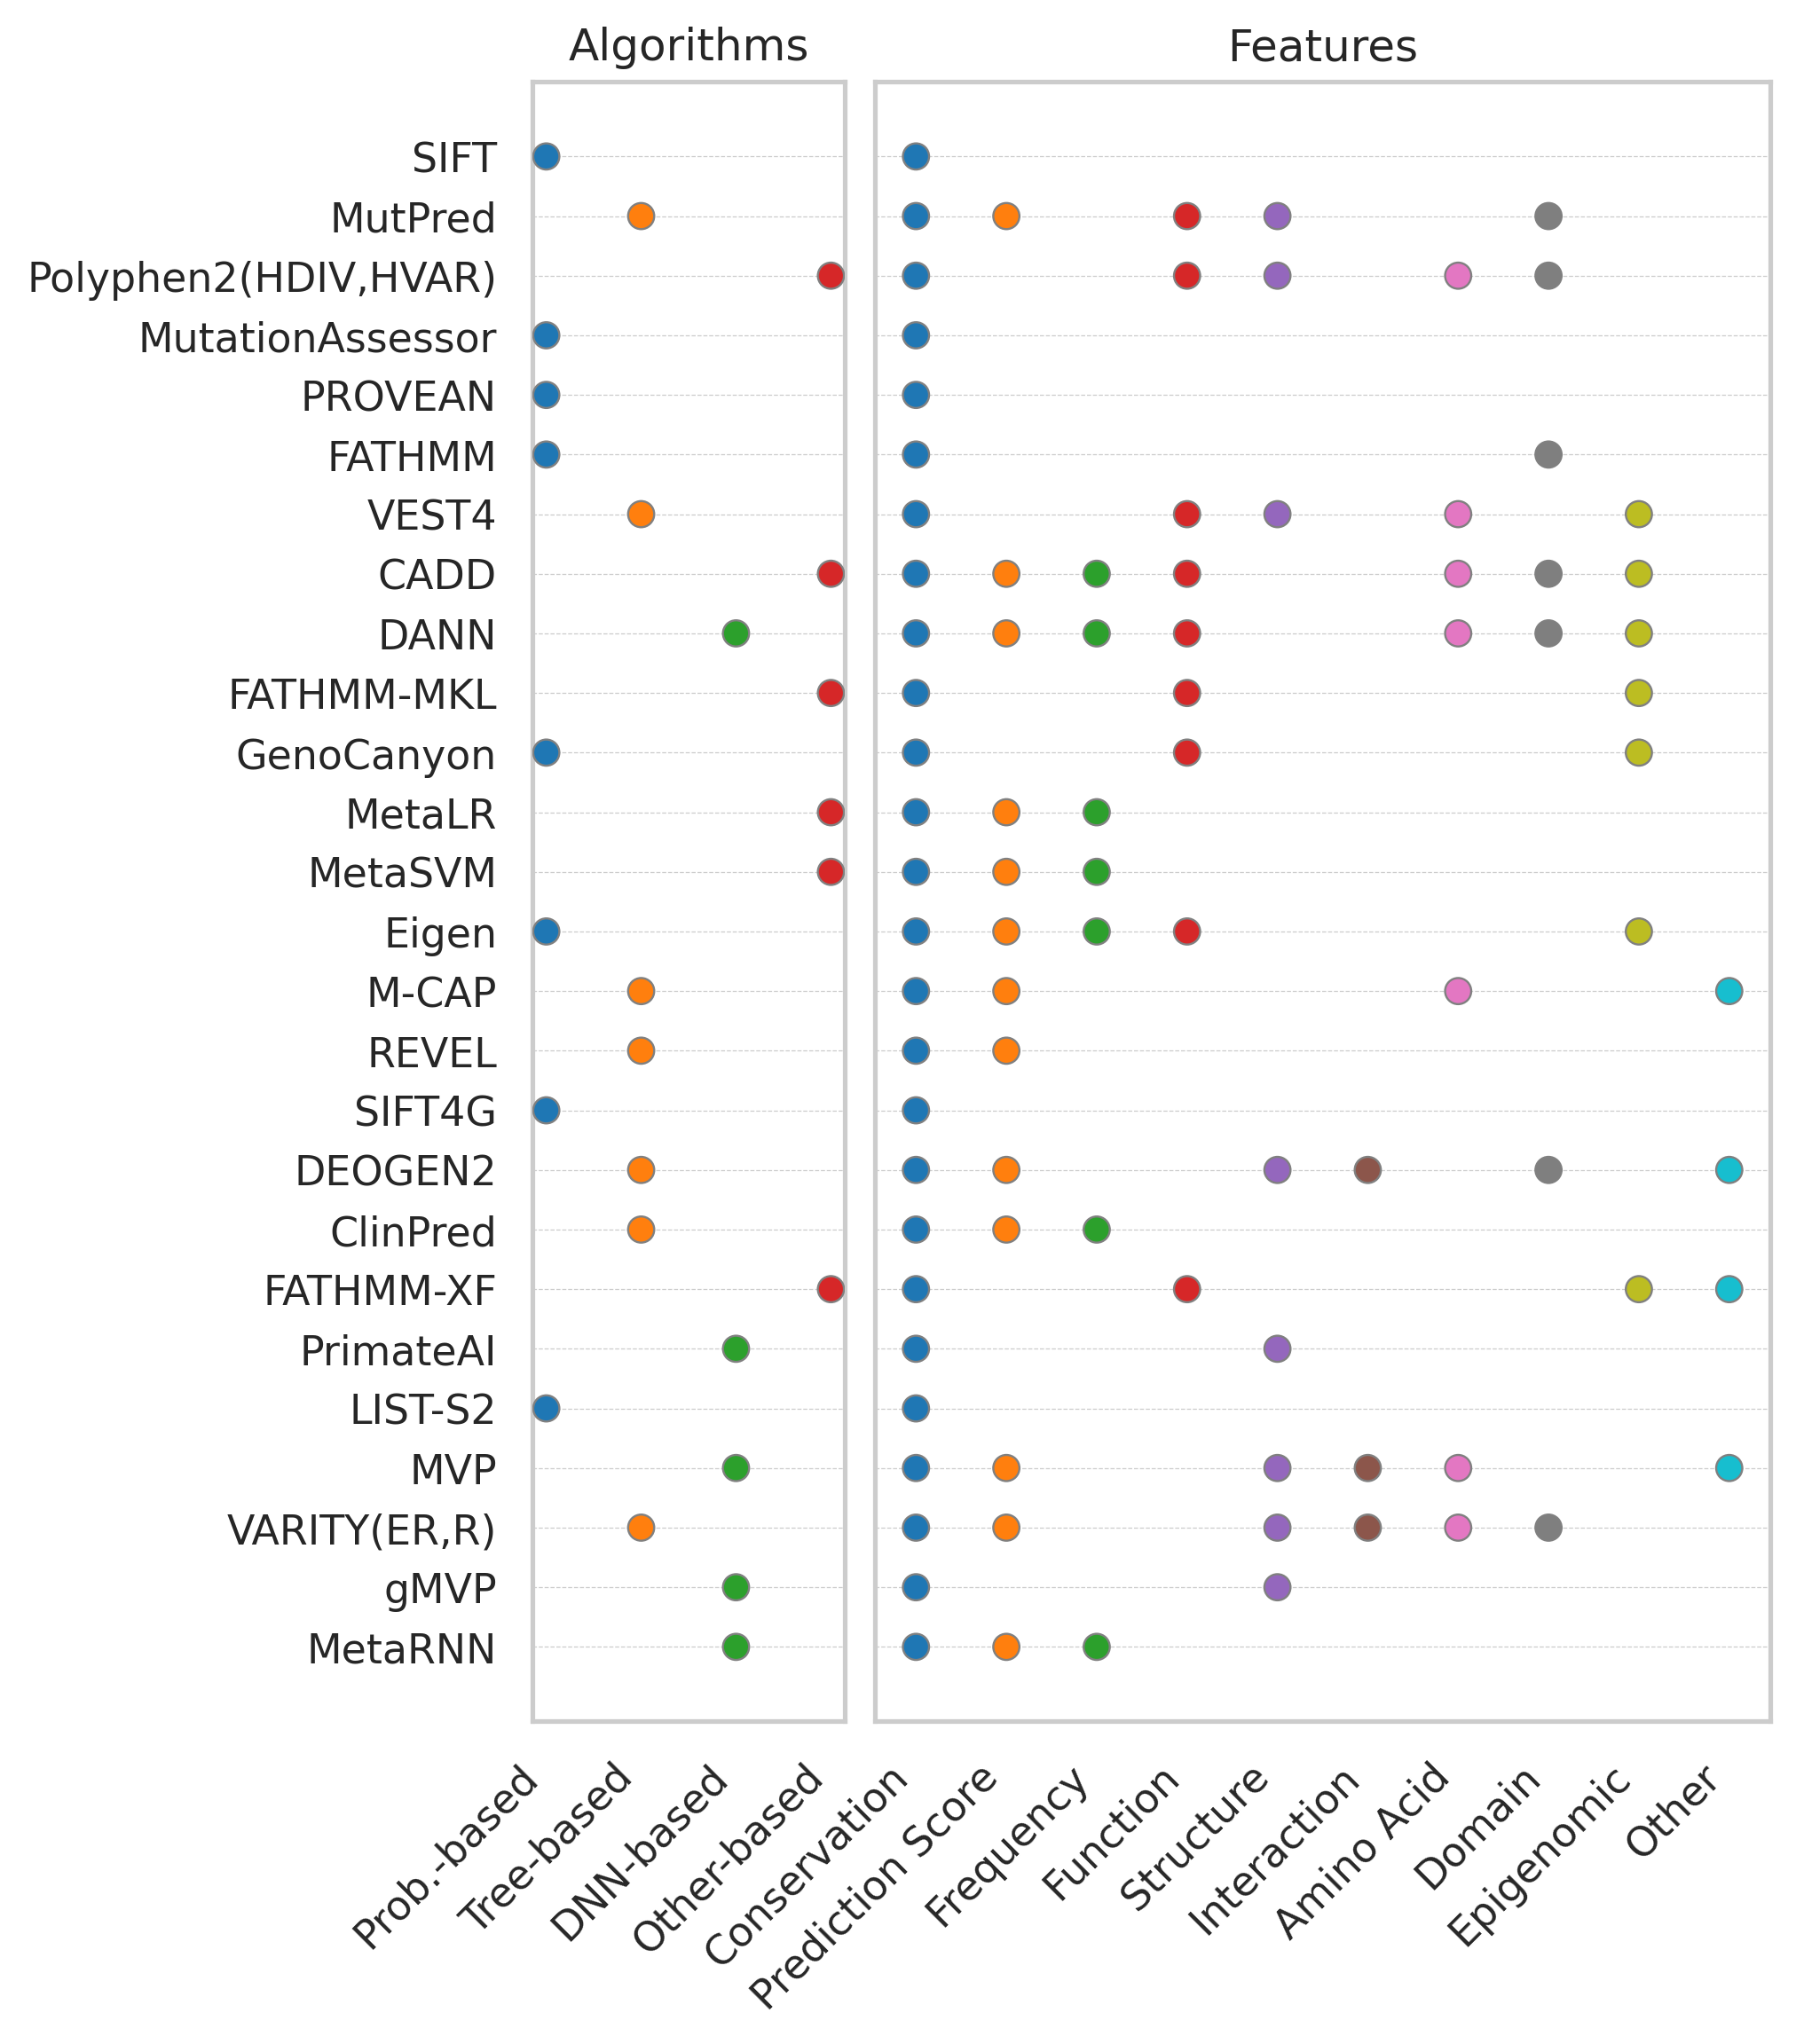

#==================================================

## Def: plot_chord_diagram(_df, _para)

In [ ]:
def plot_chord_diagram(_df, _para):
    from pycirclize import Circos

    _defName = 'plot_chord_diagram'
    _para = _para.copy()
    _df = _df.copy()

    _default = {'prefix': None, 'title':'', 'pngFold': '',
                'filterCols':{}, 'filterIdxs':{}, 'renameIdx':{}, 'renameCol':{},
                'addSum':0, 'angleSE':(-70, 290), 'addGroup':'', 'direction':-1,
                'makeBinary':False, 'dfT':False}
    _prefix, _title, _pngFold, _filterCols, _filterIdxs, _renameIdx, _renameCol, _addSum, _angleSE, _addGroup, _direction, _makeBinary, _dfT = (_para.get(_k, _v) for _k, _v in _default.items())
    _rLim = (96, 100)
    _COLOR10 = plt.colormaps['tab10']
    _COLOR20 = plt.colormaps['tab20']

    if _angleSE == ():
        _angleSE = _default['angleSE']

    if _addGroup:
        _rLim = (87, 91)

    if checkType(_df, 'df') == False: return

    print("=" * 100)
    print(f"[Def] {_defName}(_df, _para)")
    print(f"!!! df:\tN = {_df.shape}")
    if check_parameter(_para, _default) == False: return
    print("=" * 100)

    if _filterCols:
        _df = filterCols(_df, _filterCols)
        if _df.empty: return

    if _filterIdxs:
        _df = filterIndexs(_df, _filterIdxs)
        if _df.empty: return

    if _makeBinary:
        _df = _df.applymap(lambda x: 0 if x == "0" else 1)

    if _dfT:
        _df = _df.T

    for _axis in [0, 1]:
        _sum = _df.sum(axis=_axis)
        _deleted = _sum[_sum == 0].index  # deleteName

        if not _deleted.empty:  # 삭제할 것이 있을 경우 실행
            print(f"!!! Deleted:\tIndex(axis={_axis}) = {list(_deleted)}")

            if (_sum == 0).any():  # 하나라도 0이면 실행
                if _axis == 0:
                    _df = _df.loc[:, _sum != 0]  # removeCol
                else:
                    _df = _df.loc[_sum != 0, :]  # removeRow
                print(f"!!! df(sum!=0, axis={_axis}):\tN = {_df.shape}")

    if _renameIdx:
        #if set(_tmp.index) != set(_changeIdx.keys()):
        if not list(set(_df.index)) <= list(set(_renameIdx.keys())):
            print(f"!!! NoEq:\tIndex {list(_df.index)} _changeIdx {list(_renameIdx.keys())}")
            return

        _df.index = _df.index.map(lambda x: _renameIdx.get(x, x))

    if _renameCol:
        _df.rename(columns = _renameCol, inplace=True)

    if _addSum:
        _rowSum = _df.sum(axis=1)
        _df.index = [f'{idx} ({_rowSum[idx]:,})' for idx in _df.index]

    if len(_df.index) <= 10:
        _colors = {_idx: mcolors.to_hex(_COLOR10(_i)) for _i, _idx in enumerate(_df.index)}
    else:
        _colors = {_idx: mcolors.to_hex(_COLOR20(_i)) for _i, _idx in enumerate(_df.index)}

    _circos = Circos.chord_diagram(_df,
                                  start= _angleSE[0], end = _angleSE[1], #start=-250, end=110,
                                  space=2,
                                  r_lim= _rLim,
                                  cmap= _colors, #cmap="tab10,
                                  label_kws=dict(size=12, orientation='vertical'),#r=103, color="white"
                                  link_kws=dict(direction = _direction, lw=0.3, ), #direction=1,ec="black",lw=0.5,
                                  )
    if _addGroup:
        _group1 = list(_df.index)
        for _i, _g in enumerate([_group1], 1):
            _group_deg_lim = _circos.get_group_sectors_deg_lim(_g)
            _circos.rect(r_lim=(92, 100), deg_lim=_group_deg_lim, fc='black', ec="black", lw=0.5) #fc=ColorCycler()

            _group_center_deg = 0 #sum(group_deg_lim) / 2
            _circos.text(_addGroup, r=93 ,deg=_group_center_deg,adjust_rotation = True, color='white')

    fig = _circos.plotfig()


###############################################################################################################
def make_catCount_chrodDiagram(_df, _para):
    _defName = 'make_catCount_chrodDiagram'
    _para = _para.copy()
    _df = _df.copy()

    _default = {'catCol':None, 'missNa':'', 'selectCols':None, 'sortIdx':[]}
    _catCol, _missNa, _selectCols, _sortIdx = (_para.get(_k, _v) for _k, _v in _default.items())

    if checkType(_df, 'df') == False: return

    print("=" * 100)
    print(f"[Def] {_defName}(_df, _para)")
    print(f"!!! df:\tN = {_df.shape}")
    if check_parameter(_para, _default) == False: return
    print("=" * 100)

    if _missNa != '':
        _df = _df.replace(_missNa, np.nan)

    _cnt = _df.groupby(_catCol)[[_catCol] + _selectCols].count()

    if _sortIdx:
        _cnt = _cnt.reindex(_sortIdx)


    _ratio = _cnt.div(_cnt[_catCol], axis=0)
    _binary = _ratio.apply(lambda col: col.map(lambda x: 1 if x > 0.1 else 0))

    for _v in [_cnt, _ratio, _binary]:
        _v.drop(columns=[_catCol], inplace=True)

    return _cnt, _ratio, _binary

[Def] plot_chord_diagram(_df, _para)
!!! df:	N = (37, 37)
!!! Set:	prefix = tool
!!! No Set:	title =  (default)
!!! No Set:	pngFold =  (default)
!!! Set:	filterCols = {'-': ['LINSIGHT', 'AlphaMissense', 'MutFormer', 'MutScore', 'PHACTboost', 'VARITY_R_LOO', 'VARITY_ER_LOO', 'MPC', 'ESM1b', 'Eigen-PC', 'BayesDel_noAF', 'BayesDel_addAF', 'EVE', 'Polyphen2_HDIV', 'VARITY_ER']}
!!! Set:	filterIdxs = {'-': ['LINSIGHT', 'AlphaMissense', 'MutFormer', 'MutScore', 'PHACTboost', 'VARITY_R_LOO', 'VARITY_ER_LOO', 'MPC', 'ESM1b', 'Eigen-PC', 'BayesDel_noAF', 'BayesDel_addAF', 'EVE', 'Polyphen2_HDIV', 'VARITY_ER']}
!!! Set:	renameIdx = {'VARITY_R': 'VARITY'}
!!! Set:	renameCol = {'Polyphen2_HVAR': 'Polyphen2', 'VARITY_R': 'VARITY'}
!!! Set:	addSum = 0
!!! Set:	angleSE = (-105, 255)
!!! No Set:	addGroup =  (default)
!!! Set:	direction = 1
!!! No Set:	makeBinary = False (default)
!!! No Set:	dfT = False (default)
!!! df(filterCols):	N = (37, 30)
!!! df(filterIndexs):	N = (30, 30)
!!! Deleted:	Index(ax

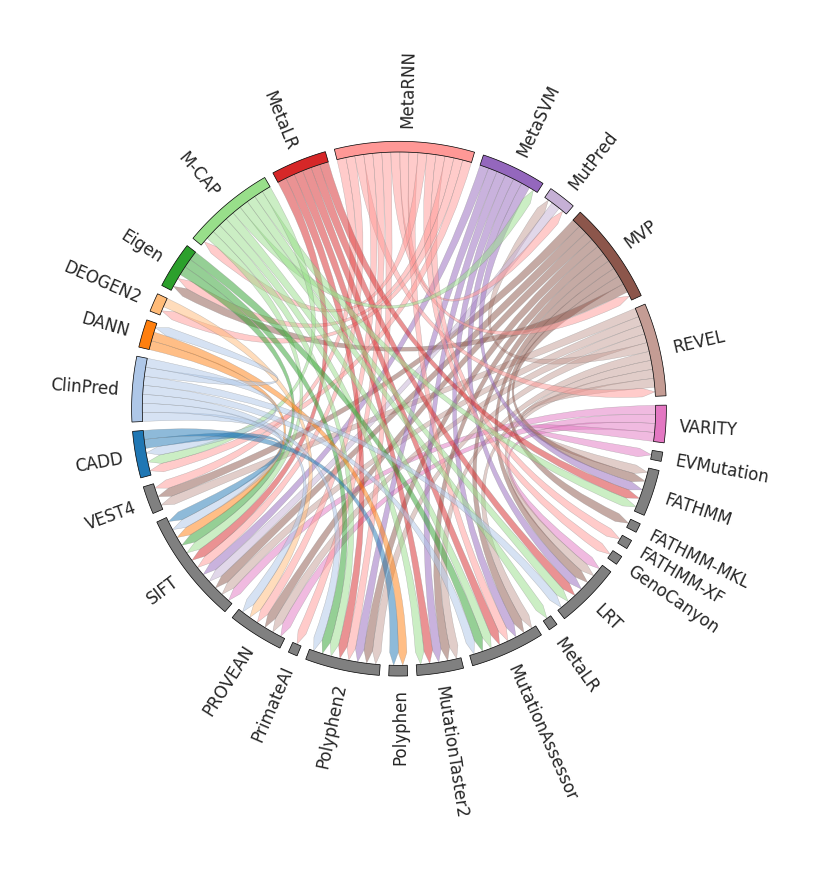

[Def] make_catCount_chrodDiagram(_df, _para)
!!! df:	N = (8508, 80)
!!! Set:	catCol = varType
!!! Set:	missNa = -1
!!! Set:	selectCols = ['CADD', 'ClinPred', 'DANN', 'DEOGEN2', 'Eigen', 'FATHMM', 'FATHMM-MKL', 'FATHMM-XF', 'GenoCanyon', 'LIST-S2', 'M-CAP', 'MVP', 'MetaLR', 'MetaRNN', 'MetaSVM', 'MutPred', 'MutationAssessor', 'PROVEAN', 'Polyphen2_HDIV', 'Polyphen2_HVAR', 'PrimateAI', 'REVEL', 'SIFT', 'SIFT4G', 'VARITY_ER', 'VARITY_R', 'VEST4', 'gMVP']
!!! Set:	sortIdx = ['m', 'i', 'n', 't']
[Def] plot_chord_diagram(_df, _para)
!!! df:	N = (4, 28)
!!! Set:	prefix = clinvar2021
!!! Set:	title = ClinVar
!!! No Set:	pngFold =  (default)
!!! No Set:	filterCols = {} (default)
!!! No Set:	filterIdxs = {} (default)
!!! Set:	renameIdx = {'m': 'Missense', 'i': 'Start Lost', 'n': 'Stop Gained', 't': 'Stop Lost'}
!!! No Set:	renameCol = {} (default)
!!! Set:	addSum = 0
!!! Set:	angleSE = (-75, 285)
!!! No Set:	addGroup =  (default)
!!! Set:	direction = -1
!!! No Set:	makeBinary = False (default)
!

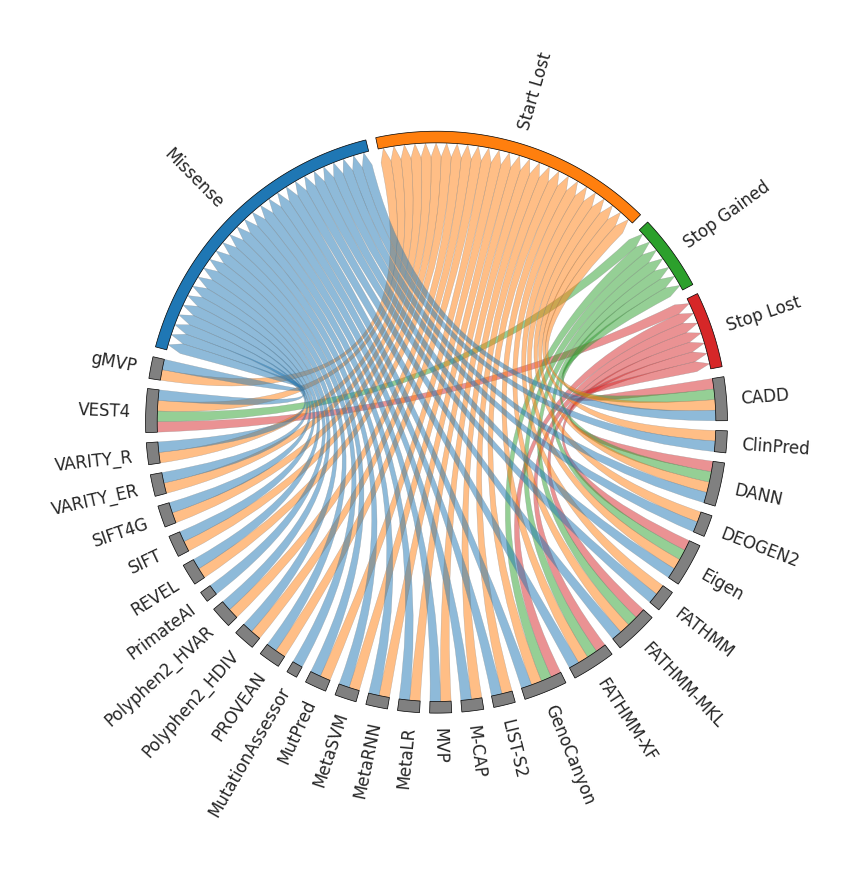

#==================================================

## Def plot_missing_rate()

In [ ]:
def plot_missing_rate(_df, _para):
    from matplotlib import gridspec

    _defName = 'plot_missing_rate'
    _df = _df.copy()
    _para = _para.copy()

    _default = {'prefix': None, 'title':None, 'pngFold': '','filterRows':{}, 'filterCols':[],'orderCat':{}, 'orderCols':[]}
    _prefix, _title, _pngFold, _filterRows, _filterCols, _orderCat, _orderCols = (_para.get(_k, _v) for _k, _v in _default.items())

    if checkType(_df, 'df') == False: return
    _n = _df.shape[0]

    print("=" * 100)
    print(f"[Def] {_defName}(_df, _para)")
    print(f"!!! Row:\tN = {_n:,}")
    if check_parameter(_para, _default) == False: return
    print("=" * 100)

    if _filterRows:
        _df = filterRows(_df, _filterRows)
        if _df.empty: return
        _n = _df.shape[0]

    if _orderCat != {}:
        _catCol, _order = next(iter(_orderCat.items()))
        _df[_catCol] = pd.Categorical(_df[_catCol], categories=_order, ordered=True)
        _catLen = {_i: _df[_df[_catCol] == _i].shape[0] for _i in _order}

    _df = _df.sort_values(by=_orderCols).reset_index(drop=True)

    if _filterCols:
        _df = filterCols(_df, _filterCols)
        if _df.empty: return

    _cnt_na = _df.isna().sum()
    _df = _df[_cnt_na.sort_values(ascending=False).index]
    _na_rate = (_cnt_na / _df.shape[0]) * 100
    _na_rate = _na_rate.apply(lambda x: f'{x:.2f}%')

    height, width = _df.shape

    z = _df.notna().values
    g = np.zeros((height, width, 3), dtype=np.float32)

    g[z < 0.5] = [1, 1, 1] #white
    g[z > 0.5] = (0.25, 0.25, 0.25)

    _cmap = plt.get_cmap("tab20")#tab10
    _colors={'m':_cmap(0)[:3], 'i':_cmap(2)[:3],'n':_cmap(4)[:3], 't':_cmap(6)[:3]}

    _s, _e = 0, 0
    for _idx, (_v, _len) in enumerate(_catLen.items()):
        #print("!!!", _idx, _v, _len)
        if _idx == 0:
            _s = _idx
            _e = _len
            #print("\t",_s, _e)
            g[_s:_e][z[_s:_e] > 0.5] = _colors[_v]
        else:
            _s = _e
            _e = _s + _len
            #print("\t",_s, _e)
            g[_s:_e][z[_s:_e] > 0.5] = _colors[_v]

    plt.rcdefaults()
    #sns.set(style="whitegrid")
    plt.figure(figsize=(25, 10), dpi=150)
    gs = gridspec.GridSpec(1, 1)
    ax0 = plt.subplot(gs[0])
    ax0.imshow(g, interpolation='none')

    ax0.set_aspect('auto')
    ax0.grid(visible=False)
    ax0.xaxis.tick_top()
    ax0.xaxis.set_ticks_position('none')
    ax0.yaxis.set_ticks_position('none')
    ax0.spines['top'].set_visible(False)
    ax0.spines['right'].set_visible(False)
    ax0.spines['bottom'].set_visible(False)
    ax0.spines['left'].set_visible(False)

    fontsize=16
    label_rotation=45
    if len(_df.columns) <= 50:
        ha = 'left'
        ax0.set_xticks(list(range(0, width)))
        ax0.set_xticklabels(
            _na_rate.values.tolist(), fontsize=fontsize, rotation=label_rotation, ha='right'
        )
        ax3 = ax0.twiny()
        ax3.set_xticks(ax0.get_xticks())
        ax3.set_xlim(ax0.get_xlim())
        ax3.set_xticklabels(list(_df.columns), rotation=label_rotation, ha=ha, fontsize=fontsize)
    else:
        ax0.set_xticks([])

    #ax0.grid(False)
    #ax0.xaxis.grid(False)

    ax0.set_yticks([0, _df.shape[0] - 1])
    ax0.set_yticklabels([1, _df.shape[0]], fontsize=int(fontsize / 16 * 20), rotation=0)

    in_between_point = [x + 0.5 for x in range(0, width - 1)]
    for in_between_point in in_between_point:
        ax0.axvline(in_between_point, linestyle='-', color='white')

    plt.show()

[Def] plot_missing_rate(_df, _para)
!!! Row:	N = 8,508
!!! Set:	prefix = clinvar2021
!!! Set:	title = ClinVar
!!! No Set:	pngFold =  (default)
!!! No Set:	filterRows = {} (default)
!!! Set:	filterCols = {'+': ['CADD', 'ClinPred', 'DANN', 'DEOGEN2', 'Eigen', 'FATHMM', 'FATHMM-MKL', 'FATHMM-XF', 'GenoCanyon', 'LIST-S2', 'M-CAP', 'MVP', 'MetaLR', 'MetaRNN', 'MetaSVM', 'MutPred', 'MutationAssessor', 'PROVEAN', 'Polyphen2_HDIV', 'Polyphen2_HVAR', 'PrimateAI', 'REVEL', 'SIFT', 'SIFT4G', 'VARITY_ER', 'VARITY_R', 'VEST4', 'gMVP']}
!!! Set:	orderCat = {'varType': ['m', 'i', 'n', 't']}
!!! Set:	orderCols = ['varType', 'chr', 'pos']
!!! df(filterCols):	N = (8508, 28)


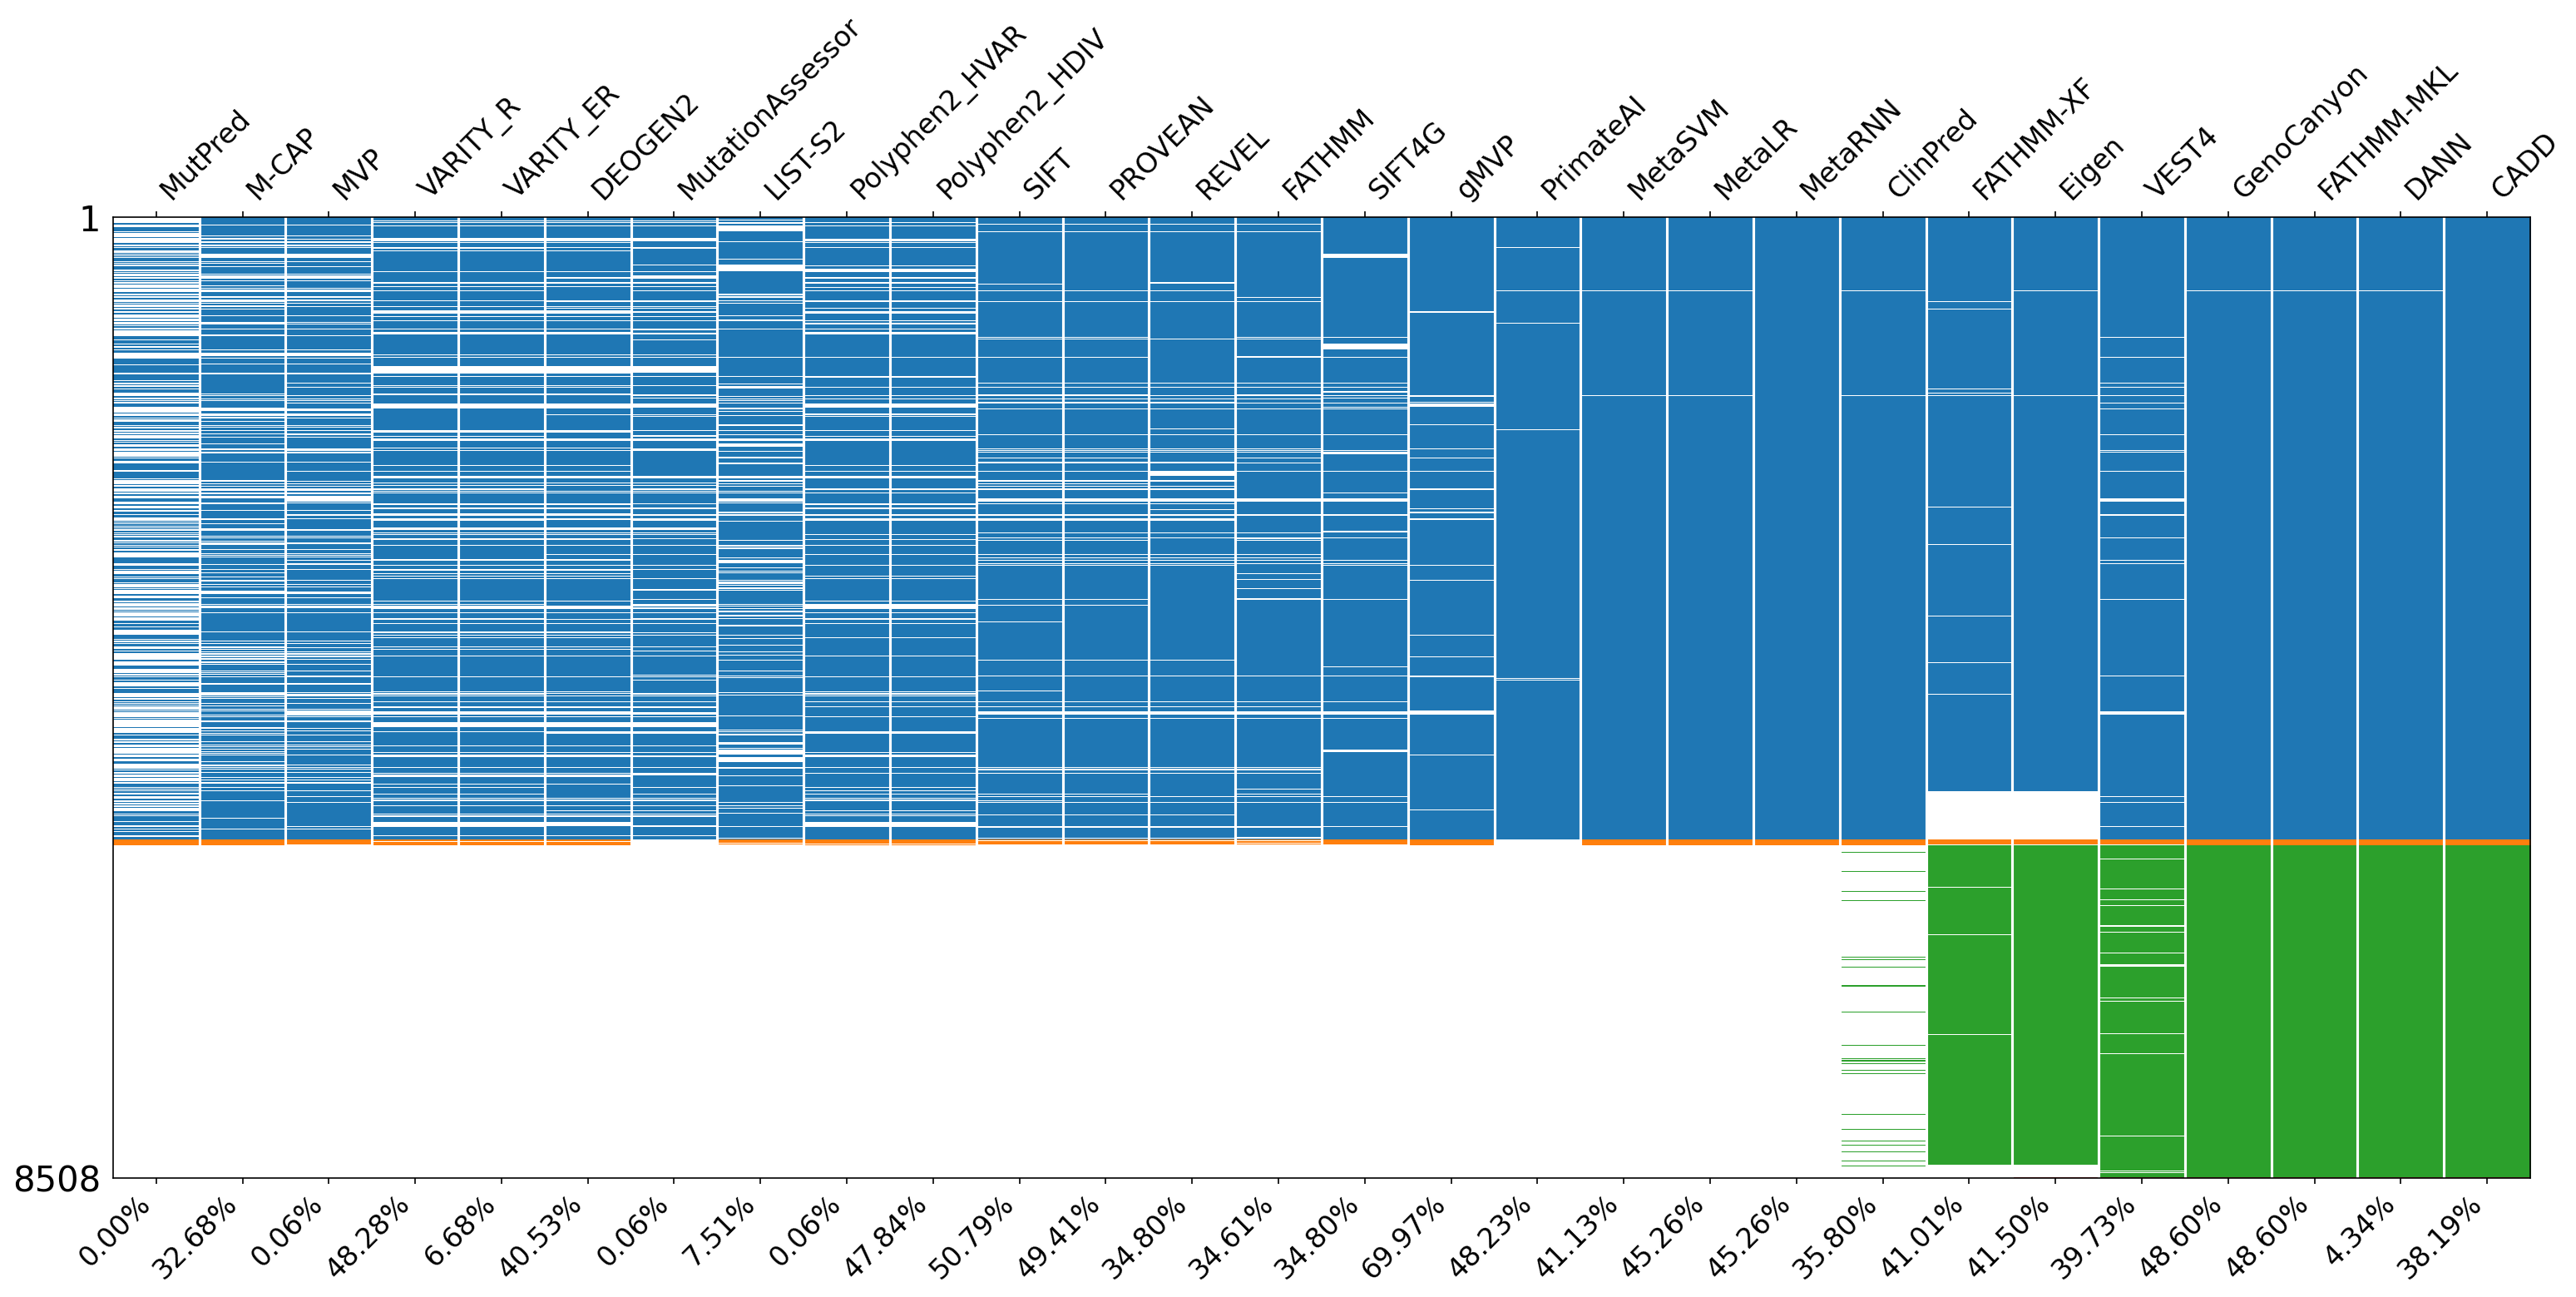

#==================================================

## Def: plot_cor_heatmap_cluster(_df, _para)

In [ ]:
def plot_cor_heatmap_cluster(_df, _para):
    from scipy.cluster.hierarchy import linkage
    from scipy.spatial.distance import pdist

    _defName = 'plot_cor_heatmap_cluster'
    _df = _df.copy()
    _para = _para.copy()

    _default = {'prefix': None, 'title':None, 'pngFold': '', 'filterCols':[],
                'method':None, 'minus':[], 'filterRows':{}, 'minmax':{}, 'outFold':''}
    _prefix, _title, _pngFold, _filterCols, _method, _minus, _filterRows, _minmax, _outFold = (_para.get(_k, _v) for _k, _v in _default.items())

    if checkType(_df, 'df') == False: return
    _n = _df.shape[0]

    print("=" * 100)
    print(f"[Def] {_defName}(_df, _para)")
    print(f"!!! Row:\tN = {_n:,}")
    if check_parameter(_para, _default) == False: return
    print("=" * 100)

    if _filterRows:
        _df = filterRows(_df, _filterRows)
        if _df.empty: return
        _n = _df.shape[0]

    if _filterCols:
        _df = filterCols(_df, _filterCols)
        if _df.empty: return

    _oorCol = {}
    if _minmax:
        _df = transform_scale_minmax(_df, _para)
        _oorCol = {_c:(_df[_c].min(), _df[_c].max()) for _c in _df.columns if round(_df[_c].min(),10) < 0 or round(_df[_c].max(), 10) > 1}

    if _oorCol:
        print(f"!!! No MinMax(0,1) :\t{_oorCol}")
        return

    if _minus:
        for _c in _minus:
            if _c in _df.columns:
                _df[_c] = 1 - _df[_c]

    _df_corr = _df.corr(method = _method)

    _cnt_na = _df_corr.isna().sum().sum()
    if _cnt_na > 0:
        print(f'!!! Cor(NA):\tN = {_cnt_na} (fillna = 0)')
        _df_corr = _df_corr.fillna(0)

    corr_linkage = linkage(pdist(_df_corr, metric='euclidean'), method='ward')
    _df_linkage = pd.DataFrame(corr_linkage, columns=["Cluster 1", "Cluster 2", "Distance", "Cluster Size"])

    _colNames = _df.columns.tolist()
    for _c in ["Cluster 1","Cluster 2"]:
        _df_linkage[_c] = _df_linkage[_c].apply(lambda x: _colNames[int(x)] if x < len(_colNames) else x)


    plt.rcdefaults()
    #sns.set(style="whitegrid")
    sns.clustermap(_df_corr, row_cluster=True, col_cluster=True, annot=True, fmt='.1f',
                cmap="coolwarm",
                figsize=(12, 12), linewidths=0.5,
                cbar_pos=(1, .2, .03, .4), vmin=0, vmax=1)

    plt.title(f"{_method.capitalize()}")

    _colSums = _df_corr.sum()
    _colMax = _colSums.idxmax()
    _colMin = _colSums.idxmin()

    print(f"Max sum column: {_colMax}, Sum: {_colSums[_colMax]}")
    print(f"Min sum column: {_colMin}, Sum: {_colSums[_colMin]}")
    print(_df_corr.min().min())
    plt.show()

############################################################################################################
def transform_scale_minmax(_df, _para):
    from sklearn.preprocessing import MinMaxScaler

    _defName = 'transform_scale_minmax'
    _df = _df.copy()
    _para = _para.copy()
    _default = {'minmax':{}}
    _minmax, = (_para.get(_k, _v) for _k, _v in _default.items())

    if checkType(_df, 'df') == False: return
    _n = _df.shape[0]

    print("=" * 100)
    print(f"[Def] {_defName}(_df, _para)")
    print(f"!!! Row:\tN = {_n:,}")
    if check_parameter(_para, _default):
        return
    print("=" * 100)

    if _minmax:
        for _c, (_min, _max) in _minmax.items():
            if _c in _df.columns:
                _df[_c] = (_df[_c] - _min) / (_max - _min)
    else:
        _scaler = MinMaxScaler(feature_range=(0, 1))
        _df = pd.DataFrame(_scaler.fit_transform(_df), columns=_df.columns)

    return _df


[Def] plot_cor_heatmap_cluster(_df, _para)
!!! Row:	N = 8,508
!!! Set:	prefix = clinvar2021
!!! Set:	title = ClinVar
!!! No Set:	pngFold =  (default)
!!! Set:	filterCols = {'+': ['CADD', 'ClinPred', 'DANN', 'DEOGEN2', 'Eigen', 'FATHMM', 'FATHMM-MKL', 'FATHMM-XF', 'GenoCanyon', 'LIST-S2', 'M-CAP', 'MVP', 'MetaLR', 'MetaRNN', 'MetaSVM', 'MutPred', 'MutationAssessor', 'PROVEAN', 'Polyphen2_HDIV', 'Polyphen2_HVAR', 'PrimateAI', 'REVEL', 'SIFT', 'SIFT4G', 'VARITY_ER', 'VARITY_R', 'VEST4', 'gMVP']}
!!! Set:	method = spearman
!!! Set:	minus = {'SIFT': 1, 'SIFT4G': 1, 'FATHMM': 1, 'PROVEAN': 1}
!!! No Set:	filterRows = {} (default)
!!! Set:	minmax = {'CADD': (-28.377575, 25.511592), 'Eigen': (-3.21872278593481, 1.31104654402471), 'FATHMM': (-16.13, 10.64), 'MetaSVM': (-2.0, 3.0), 'MutationAssessor': (-5.17, 6.49), 'PROVEAN': (-14.0, 14.0)}
!!! No Set:	outFold =  (default)
!!! df(filterCols):	N = (8508, 28)
[Def] transform_scale_minmax(_df, _para)
!!! Row:	N = 8,508
!!! Set:	minmax = {'CADD': (

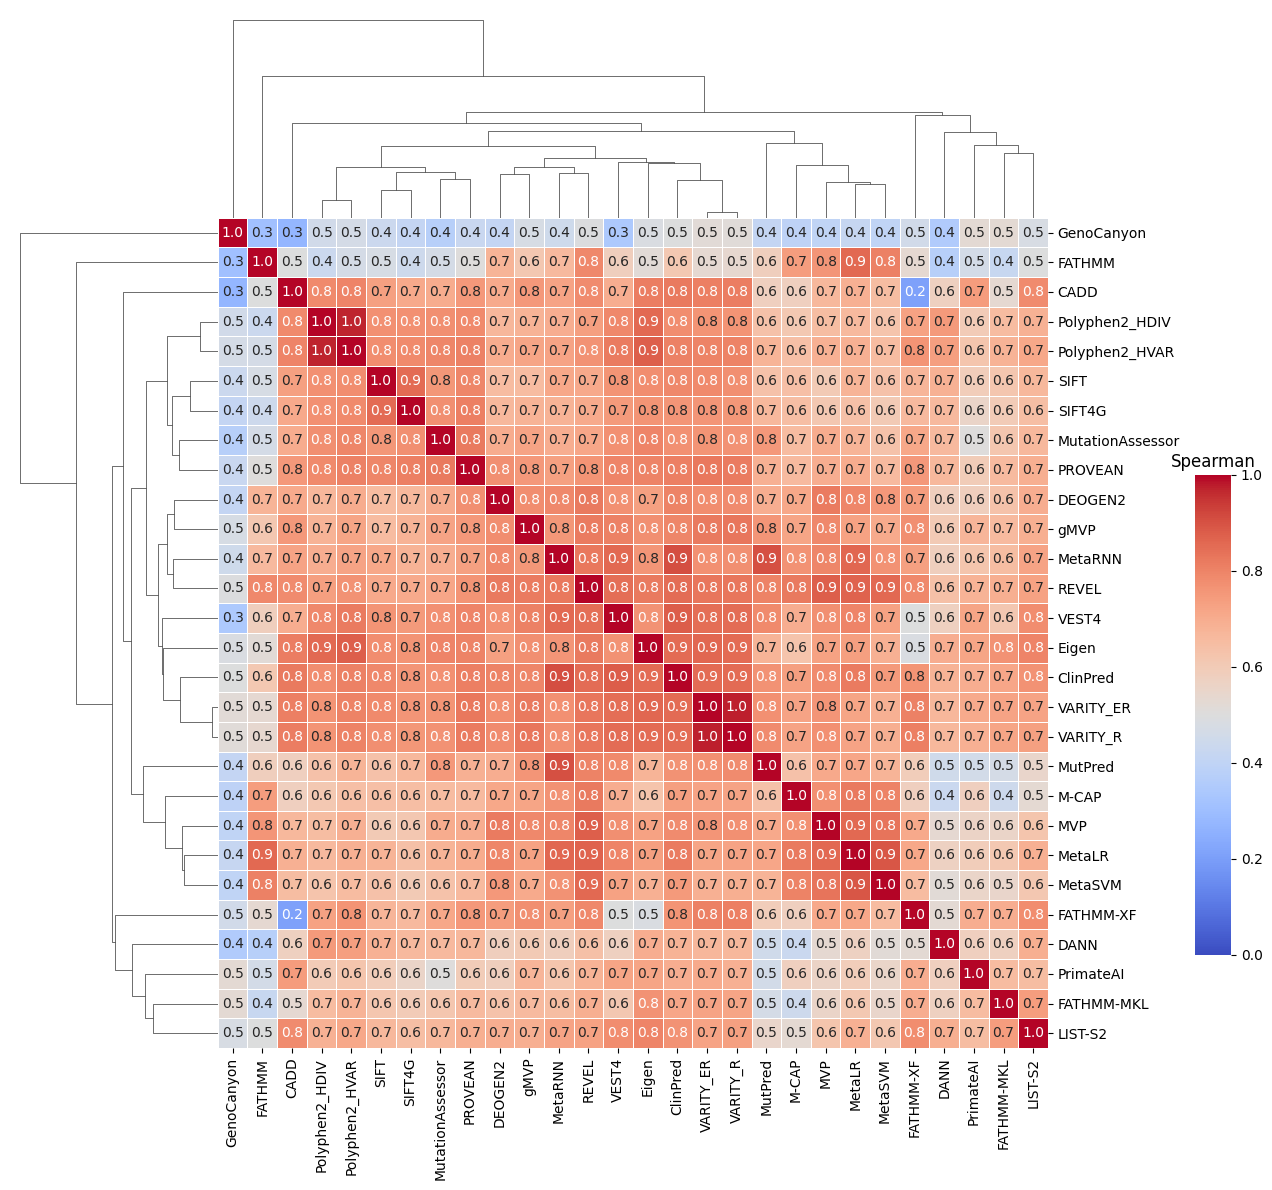

[Def] plot_cor_heatmap_cluster(_df, _para)
!!! Row:	N = 8,508
!!! Set:	prefix = clinvar2021
!!! Set:	title = ClinVar
!!! Set:	pngFold = 03.result/plot
!!! Set:	filterCols = {'+': ['CADD', 'ClinPred', 'DANN', 'DEOGEN2', 'Eigen', 'FATHMM', 'FATHMM-MKL', 'FATHMM-XF', 'GenoCanyon', 'LIST-S2', 'M-CAP', 'MVP', 'MetaLR', 'MetaRNN', 'MetaSVM', 'MutPred', 'MutationAssessor', 'PROVEAN', 'Polyphen2_HDIV', 'Polyphen2_HVAR', 'PrimateAI', 'REVEL', 'SIFT', 'SIFT4G', 'VARITY_ER', 'VARITY_R', 'VEST4', 'gMVP']}
!!! Set:	method = spearman
!!! No Set:	minus = [] (default)
!!! No Set:	filterRows = {} (default)
!!! No Set:	minmax = {} (default)
!!! Set:	outFold = 03.result
!!! df(filterCols):	N = (8508, 28)
Max sum column: REVEL, Sum: 18.17796461183661
Min sum column: CADD, Sum: 7.401572134421659
0.11074516050537703


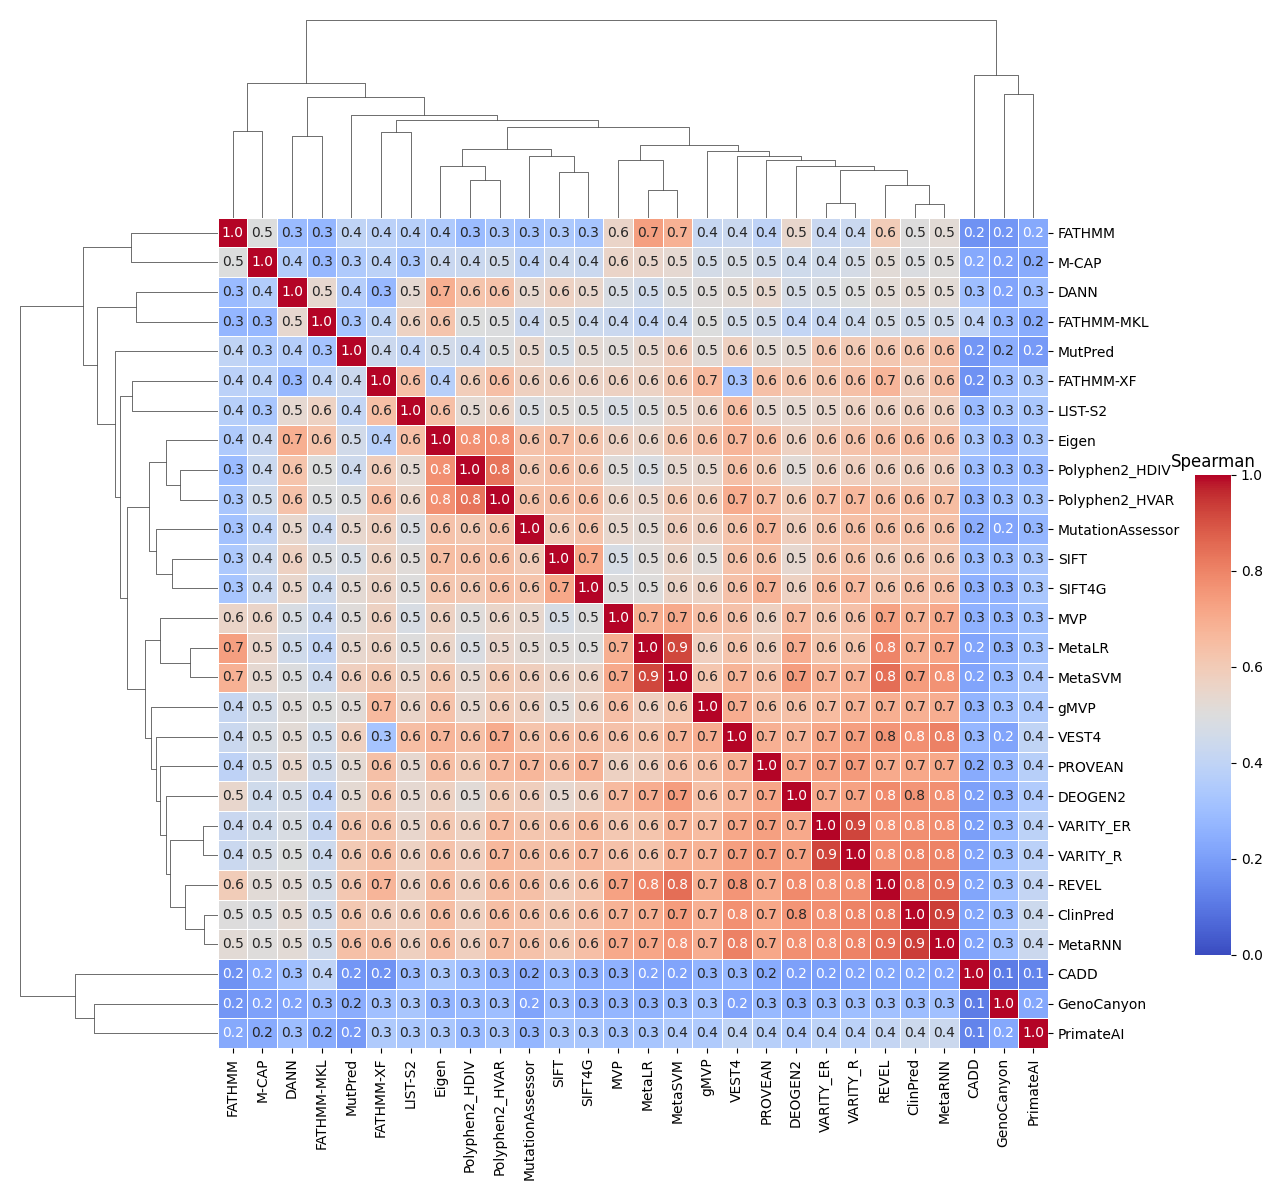

#==================================================

## Def: plot_dist_af(_df, _para)

In [ ]:
def plot_dist_af(_df, _para):
    _defName = 'plot_dist_af'
    _df = _df.copy()
    _para = _para.copy()
    _default = {'prefix': None, 'title':None, 'pngFold':'', 'x':None, 'y':None, 'hue':None}
    _prefix, _title, _pngFold, _x, _y, _hue = (_para.get(_k, _v) for _k, _v in _default.items())

    if checkType(_df, 'df') == False: return

    _n = _df['count'].sum()

    print("=" * 100)
    print(f"[Def] {_defName}(_df, _para)")
    print(f"!!! Row(df):\tN = {_df.shape}")
    print(f"!!! Row:\tN = {_n:,}")
    if check_parameter(_para, _default) == False: return
    print("=" * 100)

    #plt.rcdefaults()
    sns.set(style="whitegrid")
    plt.figure(figsize=(6,4), dpi=300) #figsize=(5, 10)
    cmap = plt.get_cmap("tab10")
    _palette = {_df[_hue].unique()[0]: cmap(1), _df[_hue].unique()[1]: cmap(0)} #gray pair (14,15)

    sns.barplot(_df ,x = _x, y = _y, hue = _hue, palette = _palette, zorder=3) #palette='tab10'

    plt.xlabel('Allele Frequency (AF)',fontsize=10)

    plt.ylabel('Count',fontsize=10)
    plt.grid(True, axis='y', linestyle='--', lw=0.4, zorder=0, alpha=0.4, color='gray')
    plt.xticks(fontsize=6.5)#rotation=45
    plt.yticks(fontsize=6.5)

    if _n > 3000:
        plt.ylim(0, 2000)
    else:
        plt.ylim(0, 3000)

    plt.legend(loc='upper right', frameon=False,)

    plt.title(f'{_title}',fontsize=12)
    plt.show()


####################################################################################################
def count_long_criteria_catCol(_df, _para):
    _defName = 'count_long_criteria_catCol'
    _df = _df.copy()
    _para = _para.copy()

    _default = {'filterRows':{}, 'catCol':None, 'criteriaCol':{}, 'renameCol':{}}
    _filterRows, _catCol, _criteriaCol, _renameCol = (_para.get(_k, _v) for _k, _v in _default.items())

    if checkType(_df, 'df') == False: return

    _n = _df.shape[0]
    print("=" * 100)
    print(f"[Def] {_defName}(_df, _para)")
    print(f"!!! Row:\tN = {_df.shape}")
    if check_parameter(_para, _default) == False: return
    print("=" * 100)
    _groupCols = _df[_catCol].unique()
    print(f'!!! Group:\t{_catCol} = {len(_groupCols)} {_groupCols}')

    if _filterRows:
        _df = filterRows(_df, _filterRows)
        if _df.empty: return
        _n = _df.shape[0]

    if _criteriaCol:
        _cCol, _cNum = next(iter(_criteriaCol.items()))

    if _renameCol != {}:
        _df = _df.rename(columns=(_renameCol))
        _cCol = _renameCol[_cCol]

    print(f'!!! {_cCol}(min):\t{_df.query(f"{_cCol} >0")[_cCol].min()}')
    print(f'!!! {_cCol}(max):\t{_df.query(f"{_cCol} >0")[_cCol].max()}')

    _results = []
    _order = []
    _signs = ['<', '<=']
    for _c in range(_cNum + 1):
        _s = 10**-_c
        _e = 10**-(_c+1)

        _query = f'{_e}{_signs[0]}{_cCol}{_signs[1]}{_s}'
        _bins = f'{_e:.0e}-{_s:.0e}'

        if _c == 0:
            _bins = f'{_e:.0e}{_signs[0]}'
        elif _c == _cNum:
            _e = 0
            _query = f'{_e}{_signs[1]}{_cCol}{_signs[1]}{_s}'
            _bins = f'{_signs[1]}{_s:.0e}'

        _order.append(_bins)

        _tmp = _df.query(_query).copy().reset_index(drop=True)

        group_counts = {_g: _tmp[_tmp[_catCol] == _g].shape[0] for _g in _groupCols}

        _results.append({'query': _query, 'bins':_bins, **group_counts})

    _tmp = pd.DataFrame(_results)
    _tmp = _tmp.melt(id_vars=['query','bins'], var_name=_catCol, value_name='count')
    _tmp[_catCol] = _tmp[_catCol].replace({1:'Pathogenic', 0:'Benign'})
    _tmp['sum1'] = _n
    _tmp['ratio1'] = _tmp['count'] / _tmp['sum1']

    _order = _order[::-1]
    _tmp['bins'] = pd.Categorical(_tmp['bins'], categories=_order, ordered=True)
    _tmp = _tmp.sort_values(by=[_catCol, 'bins'], ascending=[False,False]).reset_index(drop=True)

    return _tmp


[Def] count_long_criteria_catCol(_df, _para)
!!! Row:	N = (8508, 80)
!!! Set:	filterRows = {'+': {'varType': ['m', 'i']}}
!!! Set:	catCol = clnSig23
!!! Set:	criteriaCol = {'ESP6500_AA_AF': 6}
!!! No Set:	renameCol = {} (default)
!!! Group:	clnSig23 = 2 [0 1]
!!! df(filterRows):	N = (5563, 80)
!!! ESP6500_AA_AF(min):	0.0002269632319564
!!! ESP6500_AA_AF(max):	0.9997730367680436
[Def] plot_dist_af(_df, _para)
!!! Row(df):	N = (14, 6)
!!! Row:	N = 5,563
!!! Set:	prefix = clinvar2021
!!! Set:	title = ESP_AA
!!! No Set:	pngFold =  (default)
!!! Set:	x = bins
!!! Set:	y = count
!!! Set:	hue = clnSig23


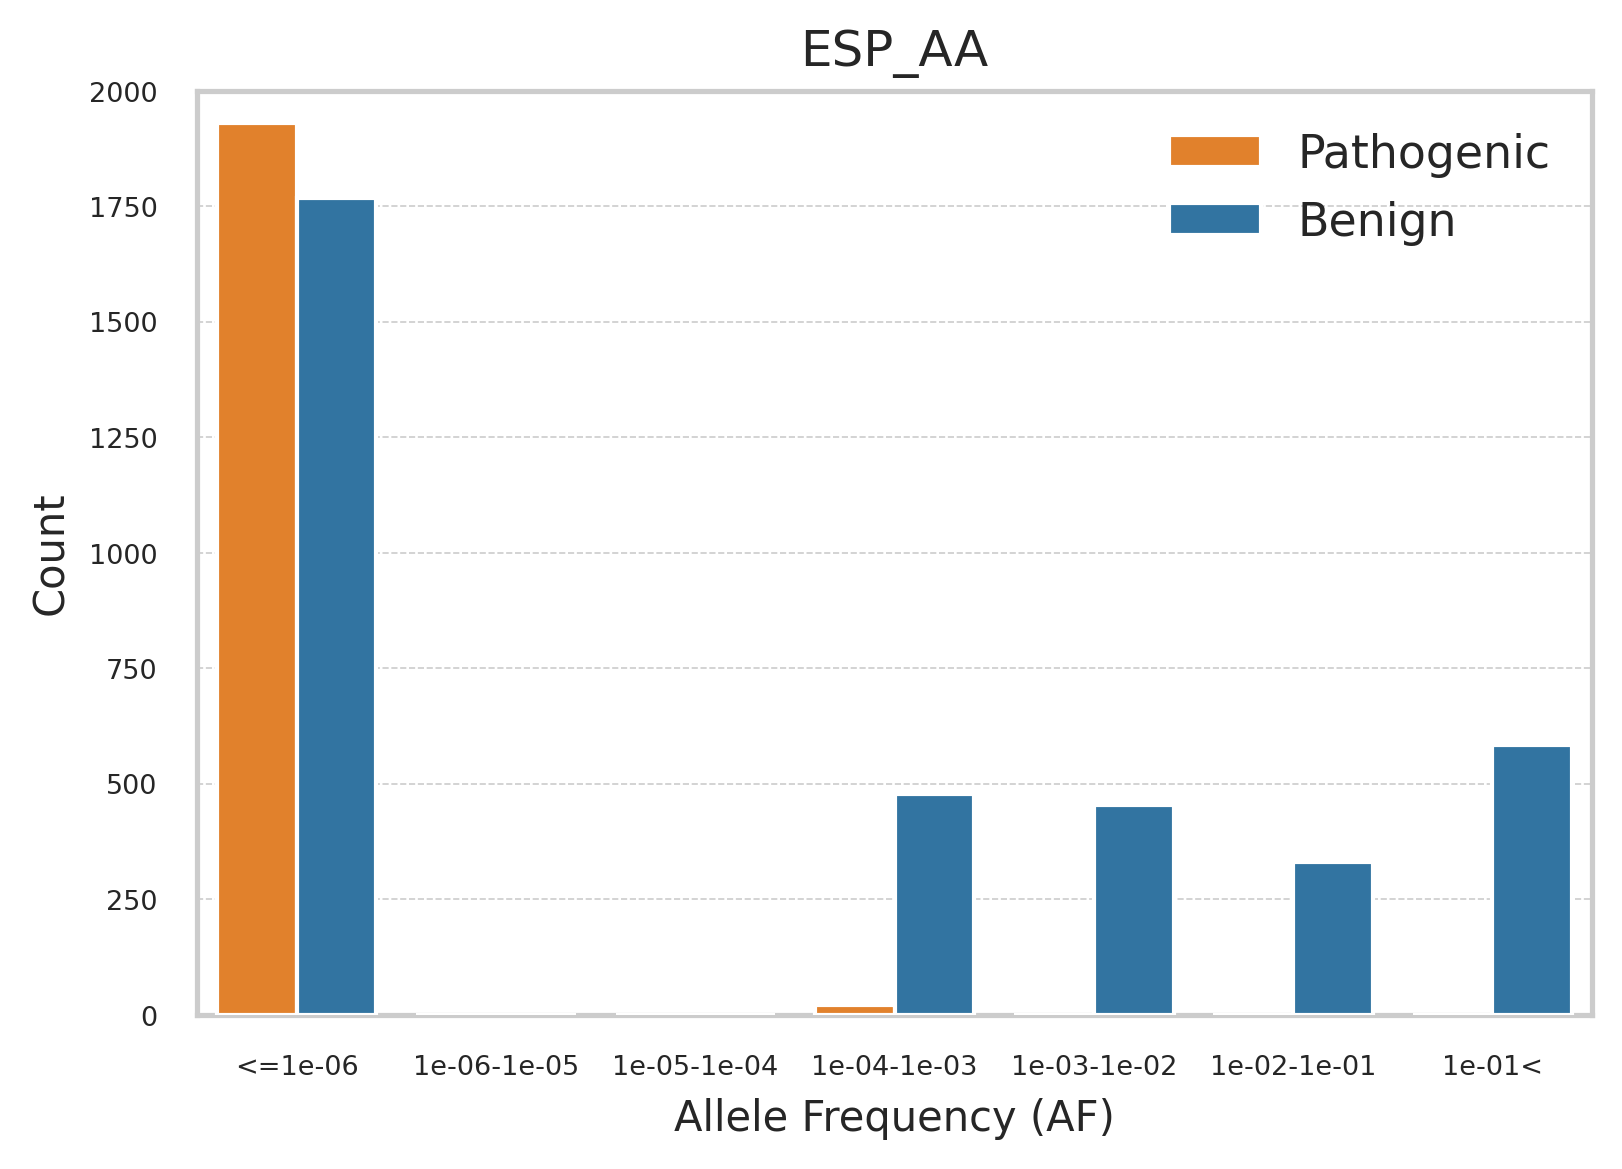

[Def] count_long_criteria_catCol(_df, _para)
!!! Row:	N = (8508, 80)
!!! Set:	filterRows = {'+': {'varType': ['m', 'i']}}
!!! Set:	catCol = clnSig23
!!! Set:	criteriaCol = {'ESP6500_EA_AF': 6}
!!! No Set:	renameCol = {} (default)
!!! Group:	clnSig23 = 2 [0 1]
!!! df(filterRows):	N = (5563, 80)
!!! ESP6500_EA_AF(min):	0.0001162790697674
!!! ESP6500_EA_AF(max):	1.0
[Def] plot_dist_af(_df, _para)
!!! Row(df):	N = (14, 6)
!!! Row:	N = 5,563
!!! Set:	prefix = clinvar2021
!!! Set:	title = ESP_EA
!!! No Set:	pngFold =  (default)
!!! Set:	x = bins
!!! Set:	y = count
!!! Set:	hue = clnSig23


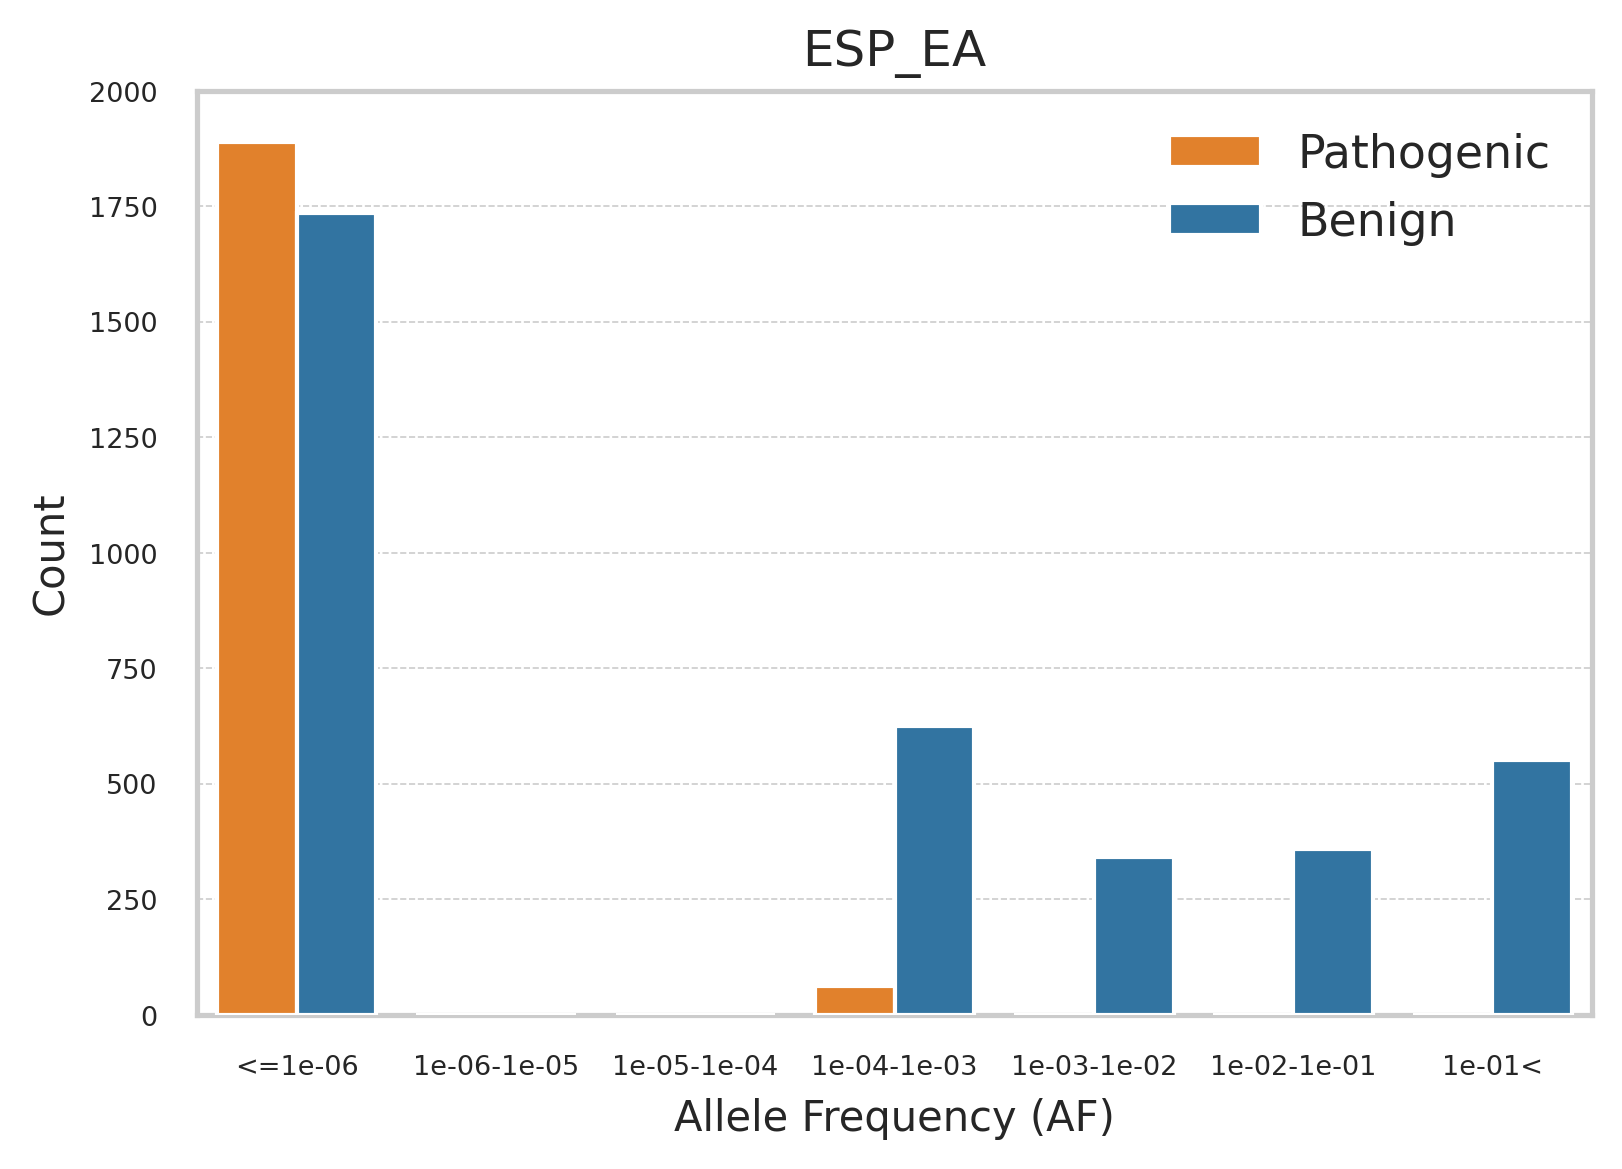

[Def] count_long_criteria_catCol(_df, _para)
!!! Row:	N = (8508, 80)
!!! Set:	filterRows = {'+': {'varType': ['m', 'i']}}
!!! Set:	catCol = clnSig23
!!! Set:	criteriaCol = {'1000Gp3_AF': 6}
!!! Set:	renameCol = {'1000Gp3_AF': 'AF_1000Gp3'}
!!! Group:	clnSig23 = 2 [0 1]
!!! df(filterRows):	N = (5563, 80)
!!! AF_1000Gp3(min):	0.0001996805111821
!!! AF_1000Gp3(max):	1.0
[Def] plot_dist_af(_df, _para)
!!! Row(df):	N = (14, 6)
!!! Row:	N = 5,563
!!! Set:	prefix = clinvar2021
!!! Set:	title = 1000GP
!!! No Set:	pngFold =  (default)
!!! Set:	x = bins
!!! Set:	y = count
!!! Set:	hue = clnSig23


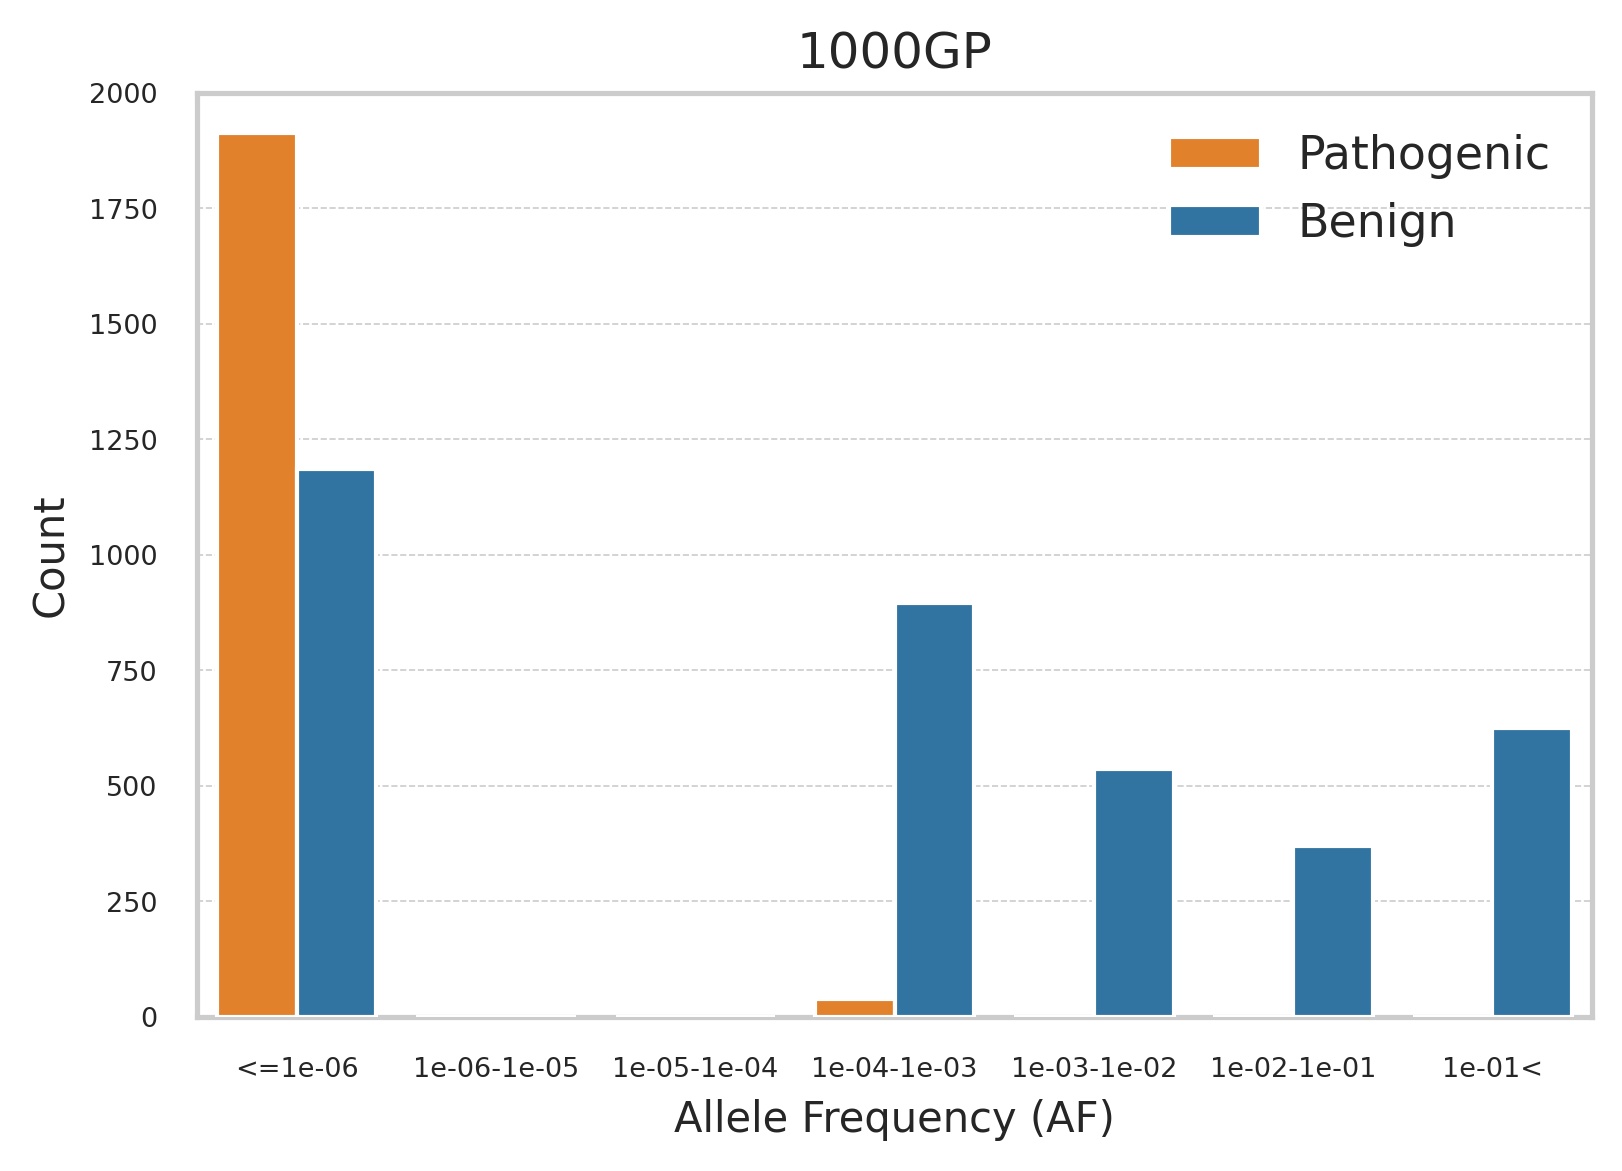

[Def] count_long_criteria_catCol(_df, _para)
!!! Row:	N = (8508, 80)
!!! Set:	filterRows = {'+': {'varType': ['m', 'i']}}
!!! Set:	catCol = clnSig23
!!! Set:	criteriaCol = {'ExAC_AF': 6}
!!! No Set:	renameCol = {} (default)
!!! Group:	clnSig23 = 2 [0 1]
!!! df(filterRows):	N = (5563, 80)
!!! ExAC_AF(min):	8.236e-06
!!! ExAC_AF(max):	1.0
[Def] plot_dist_af(_df, _para)
!!! Row(df):	N = (14, 6)
!!! Row:	N = 5,563
!!! Set:	prefix = clinvar2021
!!! Set:	title = ExAC
!!! No Set:	pngFold =  (default)
!!! Set:	x = bins
!!! Set:	y = count
!!! Set:	hue = clnSig23


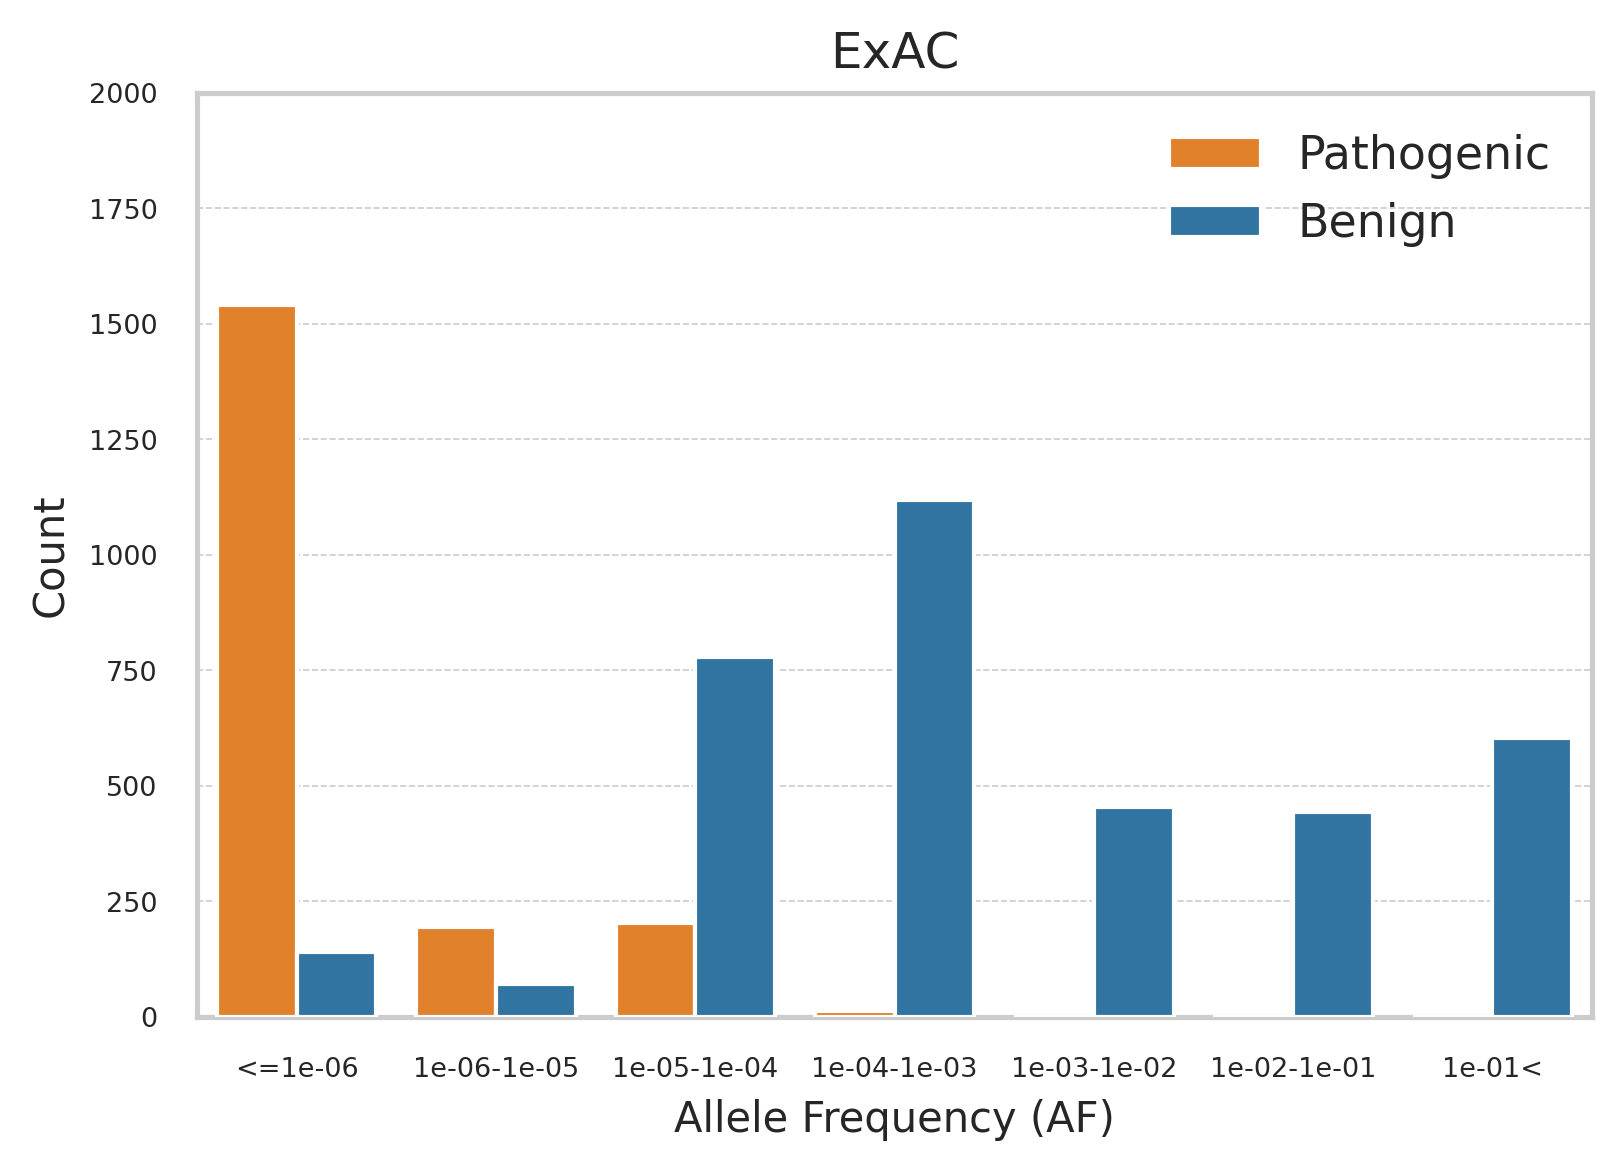

[Def] count_long_criteria_catCol(_df, _para)
!!! Row:	N = (8508, 80)
!!! Set:	filterRows = {'+': {'varType': ['m', 'i']}}
!!! Set:	catCol = clnSig23
!!! Set:	criteriaCol = {'gnomAD_genomes_AF': 6}
!!! No Set:	renameCol = {} (default)
!!! Group:	clnSig23 = 2 [0 1]
!!! df(filterRows):	N = (5563, 80)
!!! gnomAD_genomes_AF(min):	6.5622e-06
!!! gnomAD_genomes_AF(max):	1.0
[Def] plot_dist_af(_df, _para)
!!! Row(df):	N = (14, 6)
!!! Row:	N = 5,563
!!! Set:	prefix = clinvar2021
!!! Set:	title = gnomAD_G
!!! No Set:	pngFold =  (default)
!!! Set:	x = bins
!!! Set:	y = count
!!! Set:	hue = clnSig23


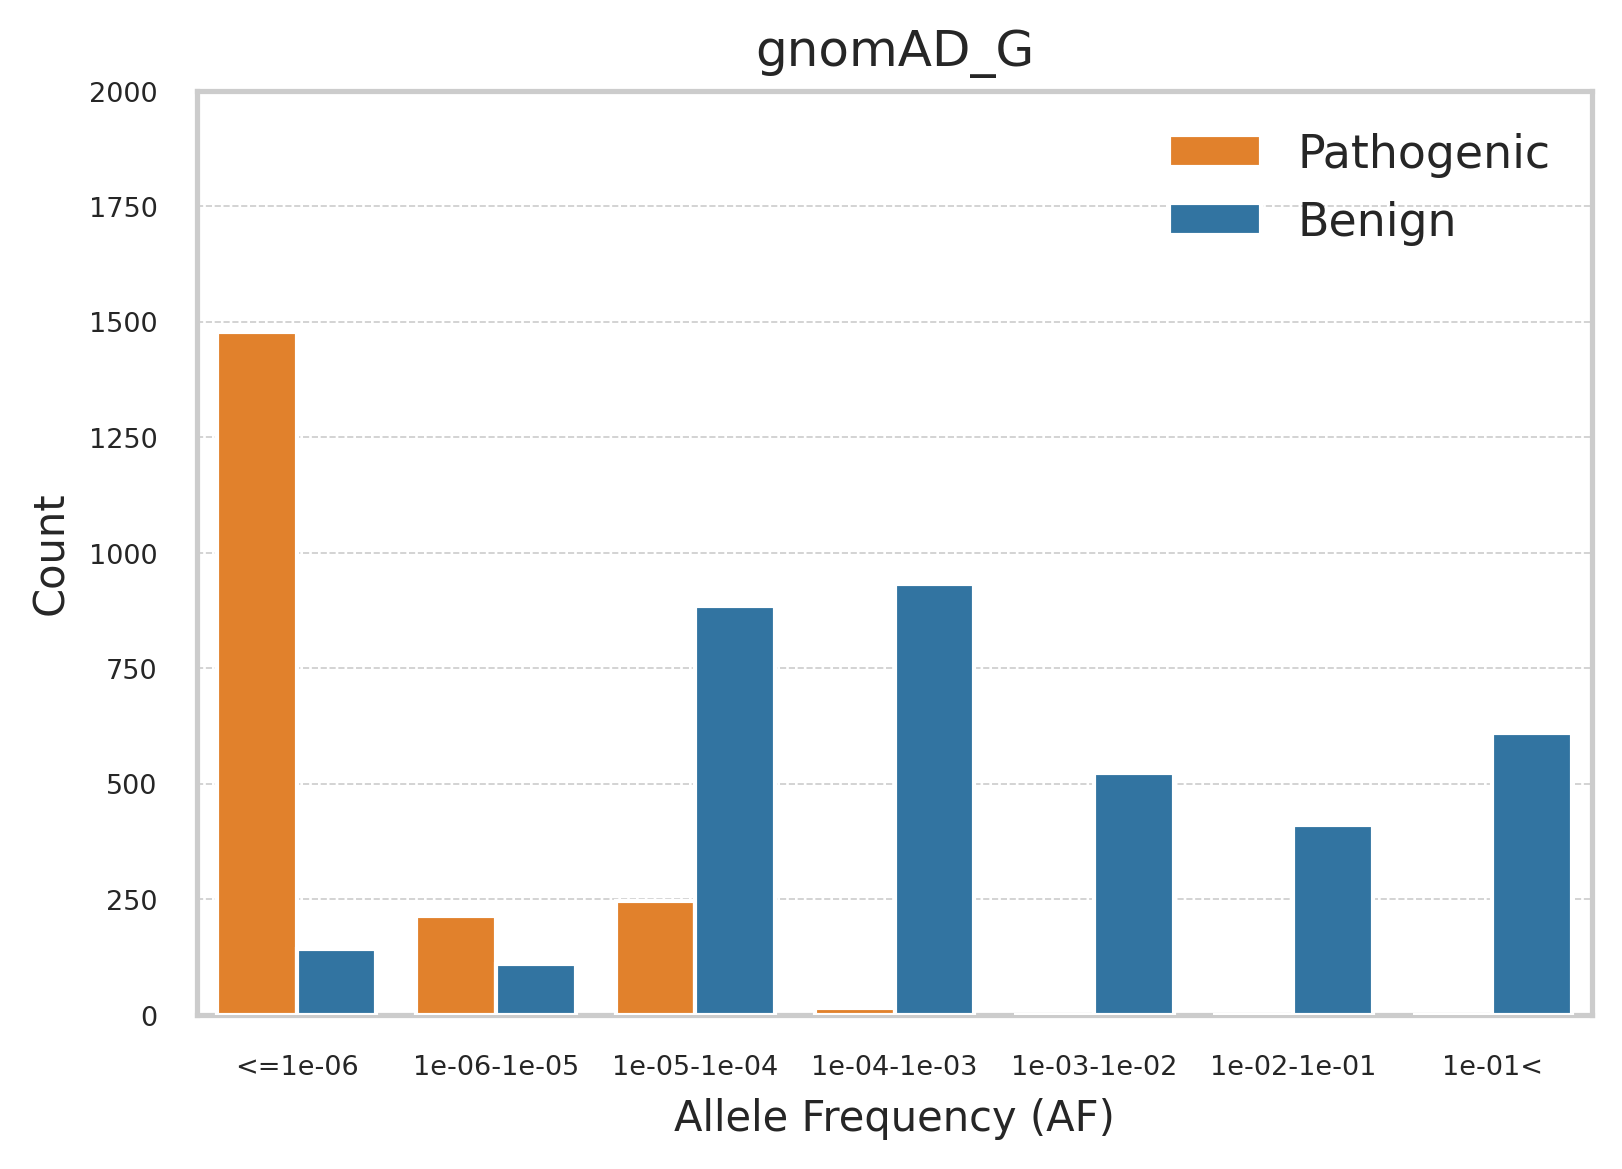

[Def] count_long_criteria_catCol(_df, _para)
!!! Row:	N = (8508, 80)
!!! Set:	filterRows = {'+': {'varType': ['m', 'i']}}
!!! Set:	catCol = clnSig23
!!! Set:	criteriaCol = {'gnomAD_exomes_AF': 6}
!!! No Set:	renameCol = {} (default)
!!! Group:	clnSig23 = 2 [0 1]
!!! df(filterRows):	N = (5563, 80)
!!! gnomAD_exomes_AF(min):	6.84045e-07
!!! gnomAD_exomes_AF(max):	0.999999
[Def] plot_dist_af(_df, _para)
!!! Row(df):	N = (14, 6)
!!! Row:	N = 5,563
!!! Set:	prefix = clinvar2021
!!! Set:	title = gnomAD_E
!!! No Set:	pngFold =  (default)
!!! Set:	x = bins
!!! Set:	y = count
!!! Set:	hue = clnSig23


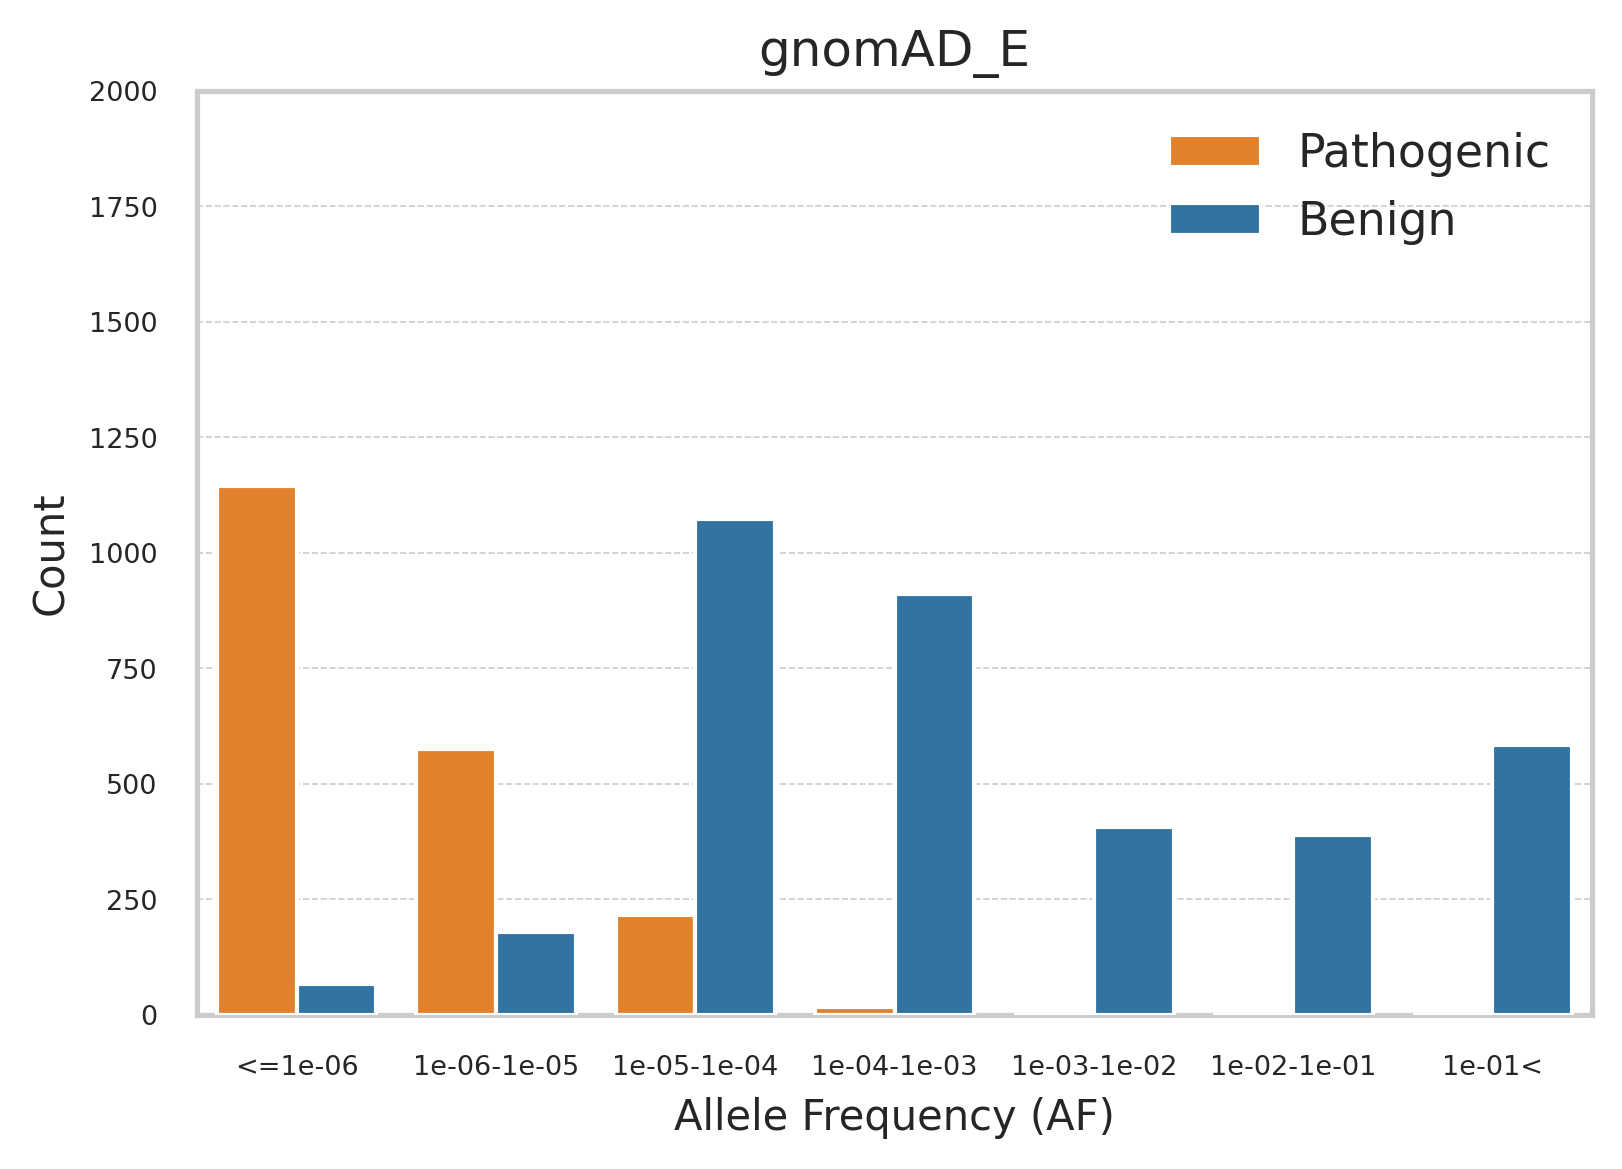

[Def] count_long_criteria_catCol(_df, _para)
!!! Row:	N = (8508, 80)
!!! Set:	filterRows = {'+': {'varType': ['n', 't']}}
!!! Set:	catCol = clnSig23
!!! Set:	criteriaCol = {'ESP6500_AA_AF': 6}
!!! No Set:	renameCol = {} (default)
!!! Group:	clnSig23 = 2 [0 1]
!!! df(filterRows):	N = (2945, 80)
!!! ESP6500_AA_AF(min):	0.0002269632319564
!!! ESP6500_AA_AF(max):	0.0009078529278256
[Def] plot_dist_af(_df, _para)
!!! Row(df):	N = (14, 6)
!!! Row:	N = 2,945
!!! Set:	prefix = clinvar2021
!!! Set:	title = ESP_AA
!!! No Set:	pngFold =  (default)
!!! Set:	x = bins
!!! Set:	y = count
!!! Set:	hue = clnSig23


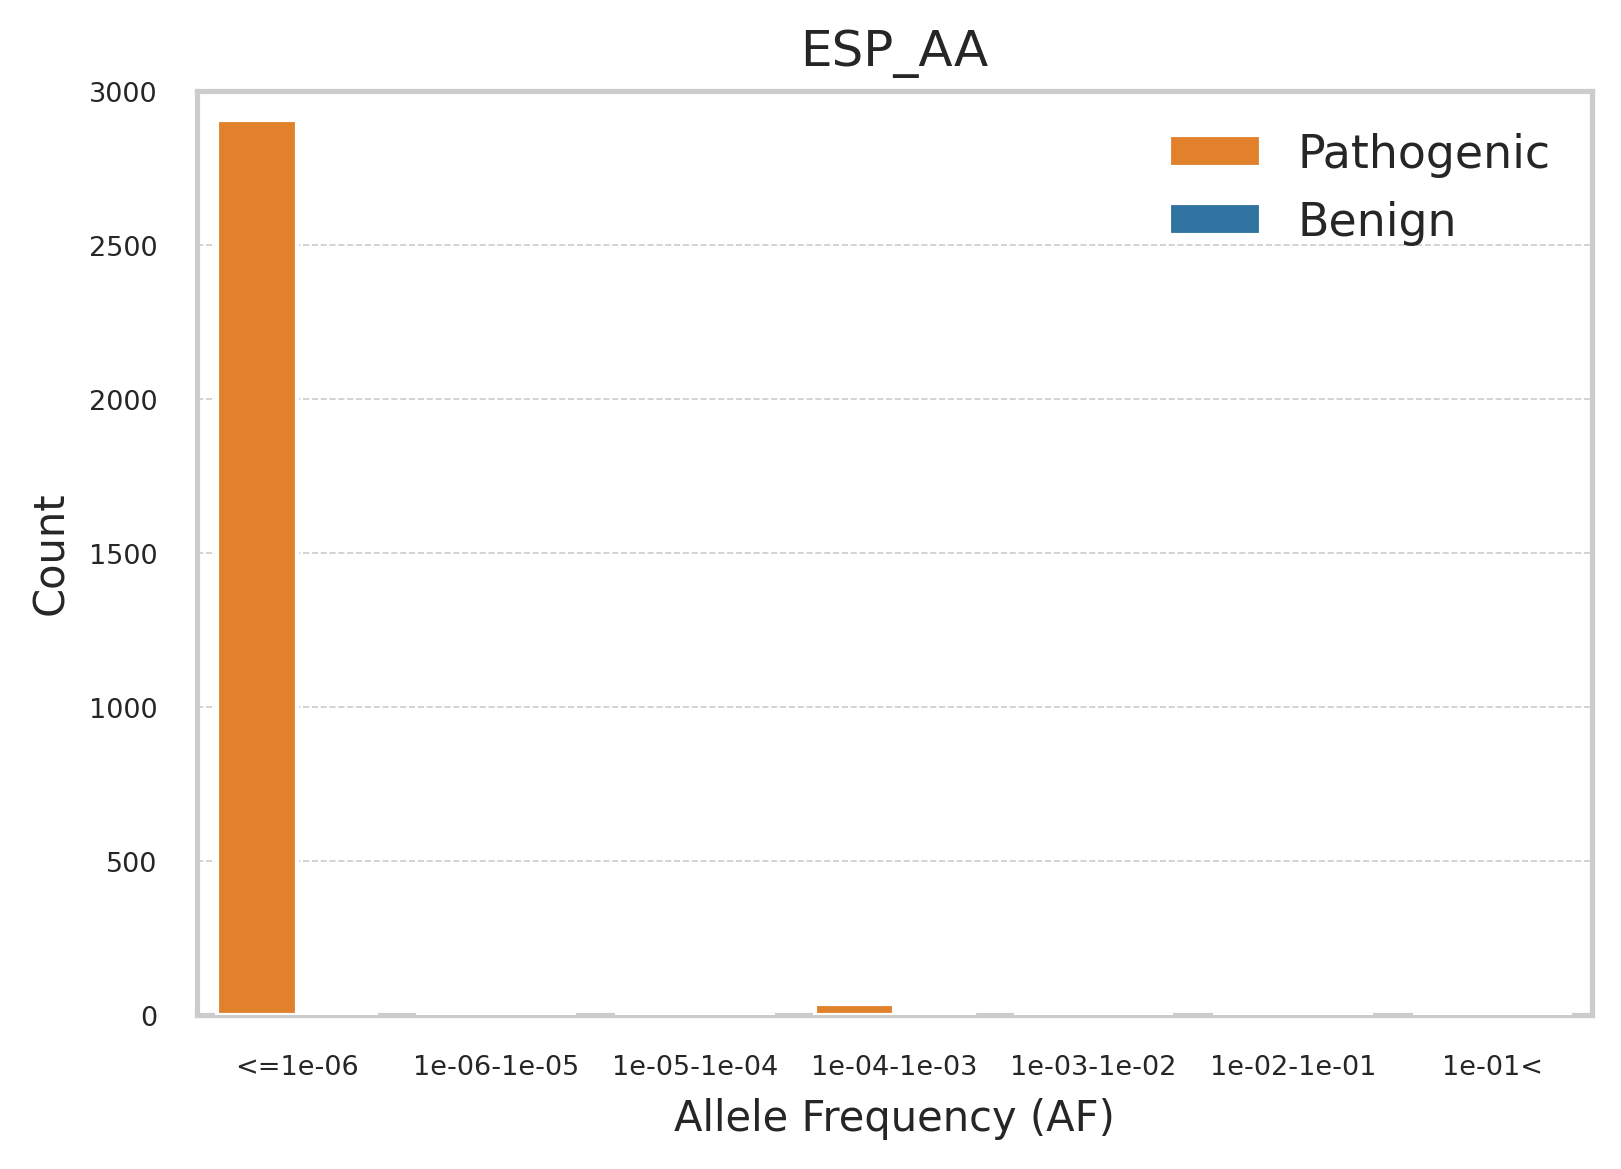

[Def] count_long_criteria_catCol(_df, _para)
!!! Row:	N = (8508, 80)
!!! Set:	filterRows = {'+': {'varType': ['n', 't']}}
!!! Set:	catCol = clnSig23
!!! Set:	criteriaCol = {'ESP6500_EA_AF': 6}
!!! No Set:	renameCol = {} (default)
!!! Group:	clnSig23 = 2 [0 1]
!!! df(filterRows):	N = (2945, 80)
!!! ESP6500_EA_AF(min):	0.0001162790697674
!!! ESP6500_EA_AF(max):	0.0005539143279172
[Def] plot_dist_af(_df, _para)
!!! Row(df):	N = (14, 6)
!!! Row:	N = 2,945
!!! Set:	prefix = clinvar2021
!!! Set:	title = ESP_EA
!!! No Set:	pngFold =  (default)
!!! Set:	x = bins
!!! Set:	y = count
!!! Set:	hue = clnSig23


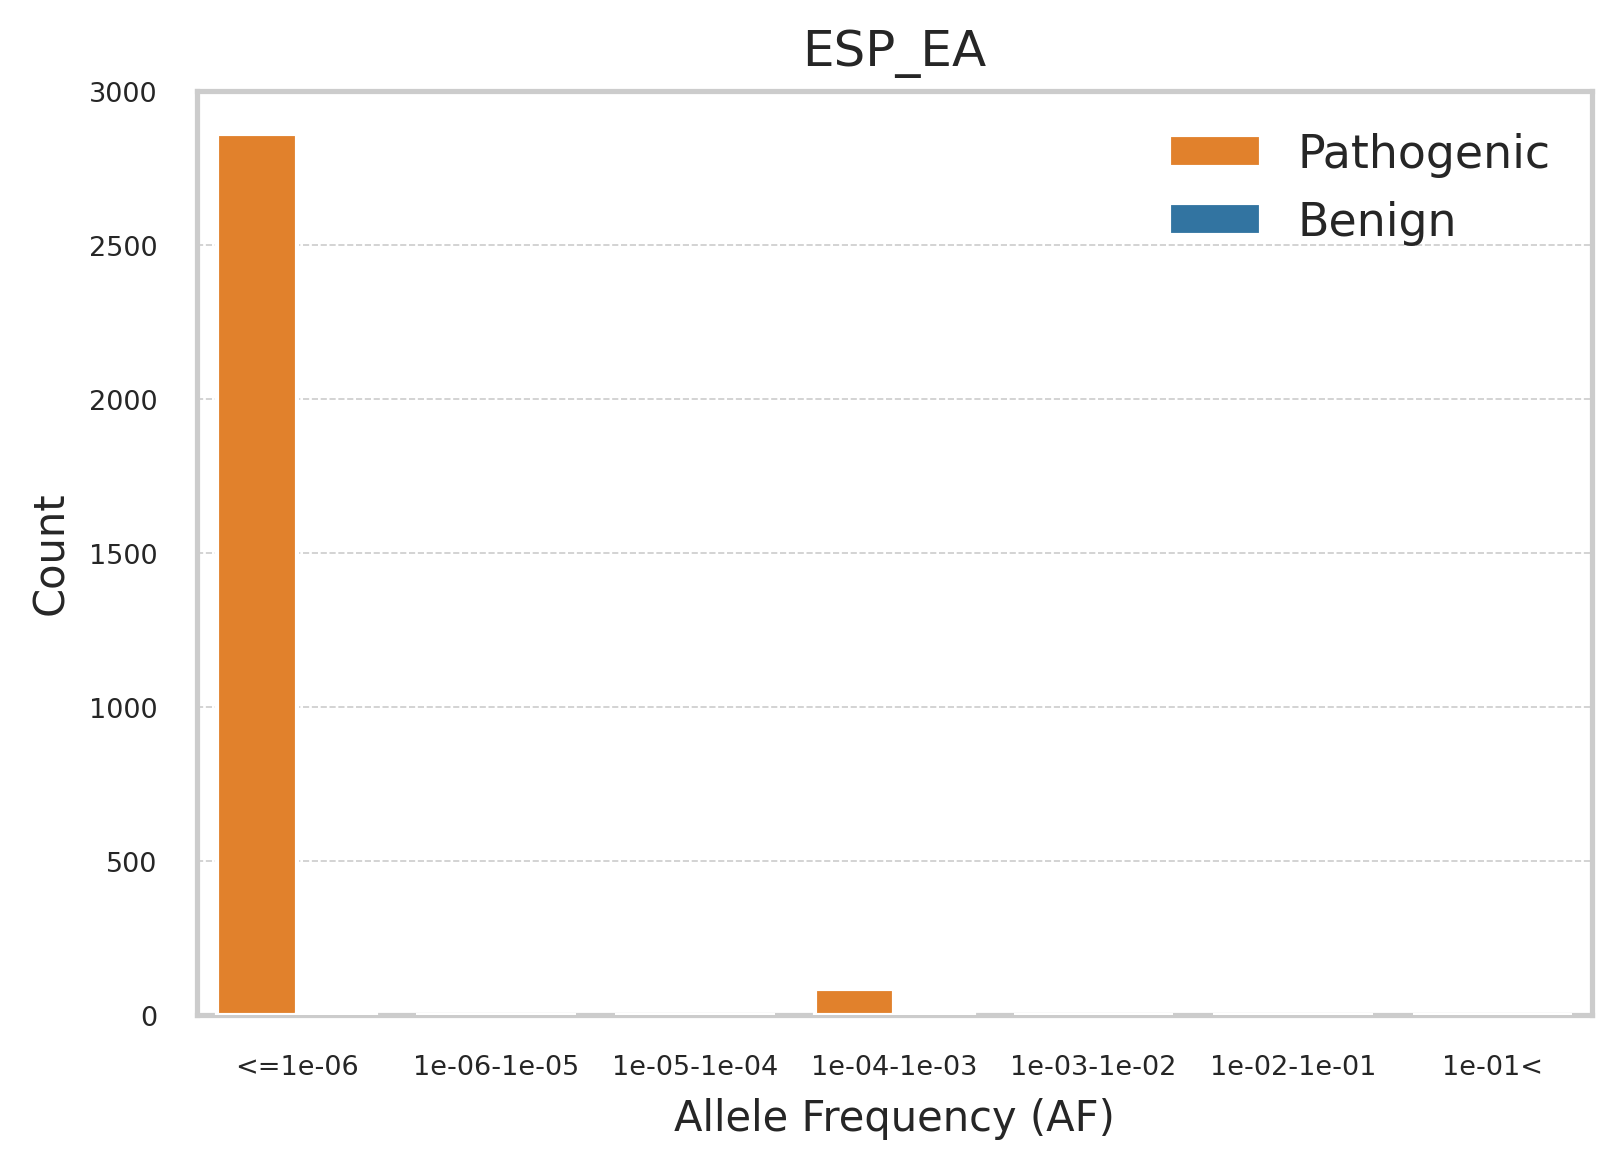

[Def] count_long_criteria_catCol(_df, _para)
!!! Row:	N = (8508, 80)
!!! Set:	filterRows = {'+': {'varType': ['n', 't']}}
!!! Set:	catCol = clnSig23
!!! Set:	criteriaCol = {'1000Gp3_AF': 6}
!!! Set:	renameCol = {'1000Gp3_AF': 'AF_1000Gp3'}
!!! Group:	clnSig23 = 2 [0 1]
!!! df(filterRows):	N = (2945, 80)
!!! AF_1000Gp3(min):	0.0001996805111821
!!! AF_1000Gp3(max):	0.0007987220447284
[Def] plot_dist_af(_df, _para)
!!! Row(df):	N = (14, 6)
!!! Row:	N = 2,945
!!! Set:	prefix = clinvar2021
!!! Set:	title = 1000GP
!!! No Set:	pngFold =  (default)
!!! Set:	x = bins
!!! Set:	y = count
!!! Set:	hue = clnSig23


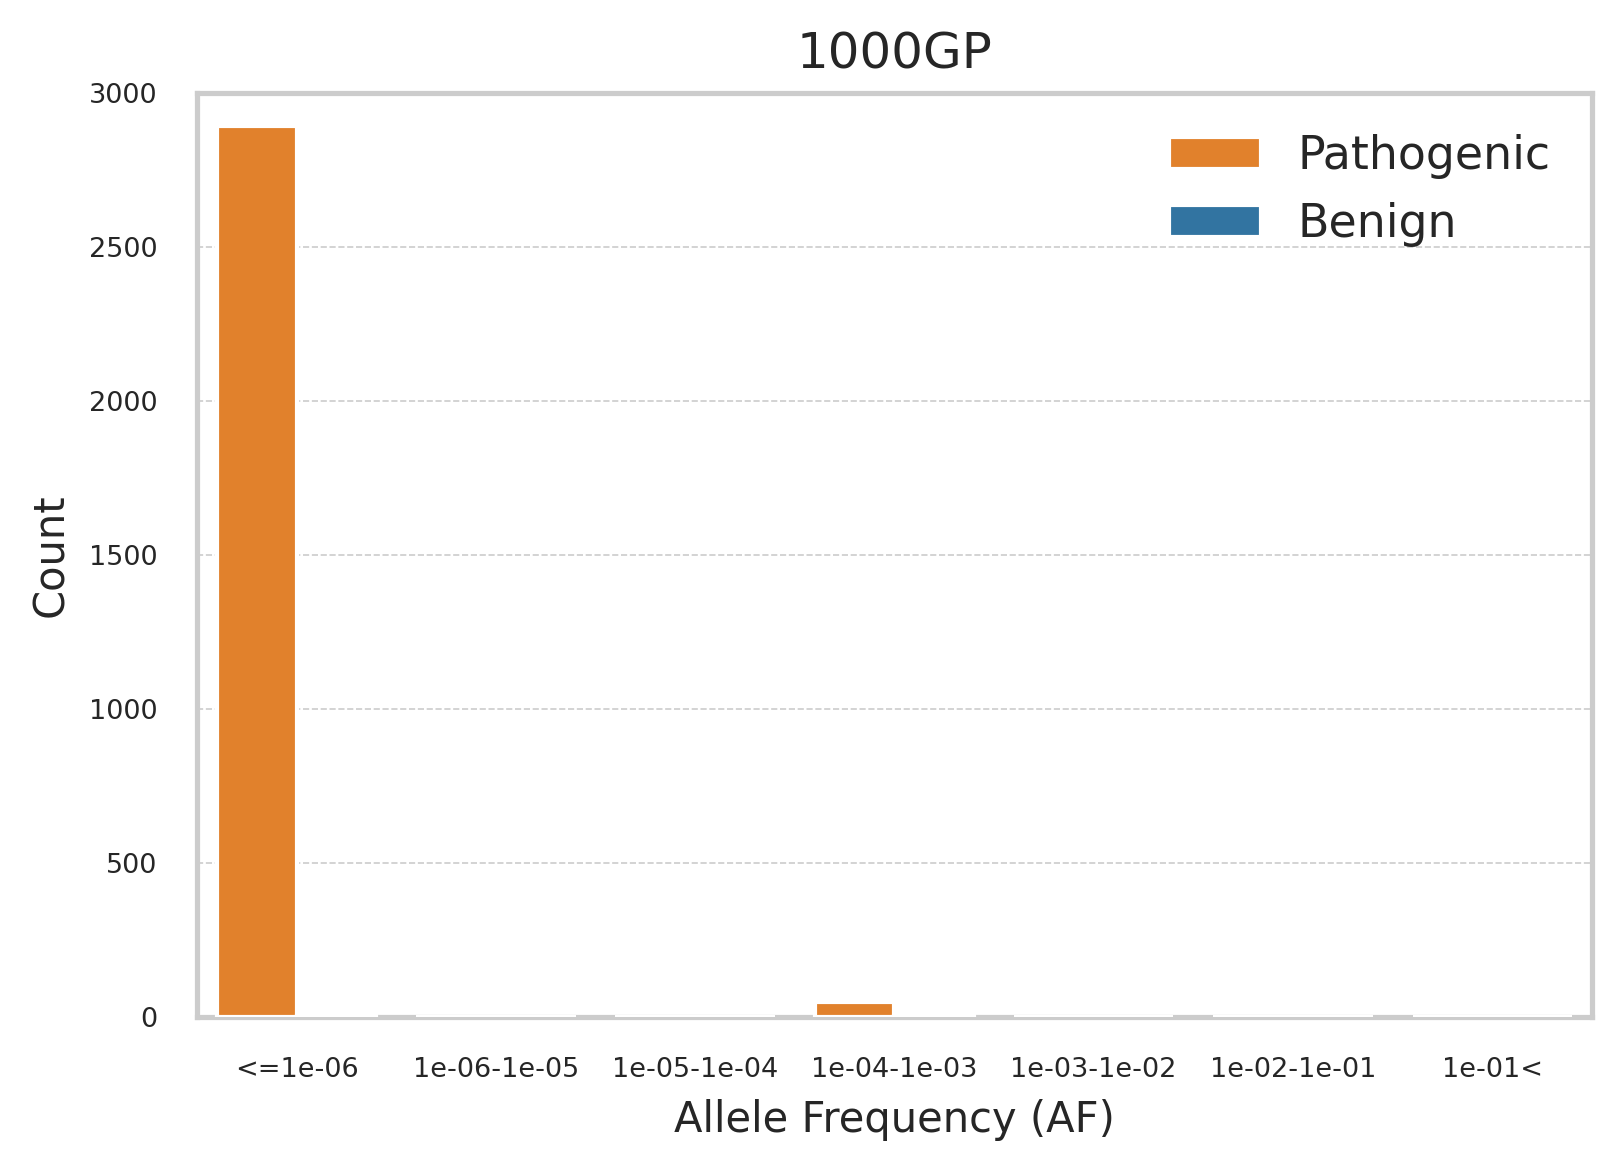

[Def] count_long_criteria_catCol(_df, _para)
!!! Row:	N = (8508, 80)
!!! Set:	filterRows = {'+': {'varType': ['n', 't']}}
!!! Set:	catCol = clnSig23
!!! Set:	criteriaCol = {'ExAC_AF': 6}
!!! No Set:	renameCol = {} (default)
!!! Group:	clnSig23 = 2 [0 1]
!!! df(filterRows):	N = (2945, 80)
!!! ExAC_AF(min):	8.236e-06
!!! ExAC_AF(max):	0.0005683
[Def] plot_dist_af(_df, _para)
!!! Row(df):	N = (14, 6)
!!! Row:	N = 2,945
!!! Set:	prefix = clinvar2021
!!! Set:	title = ExAC
!!! No Set:	pngFold =  (default)
!!! Set:	x = bins
!!! Set:	y = count
!!! Set:	hue = clnSig23


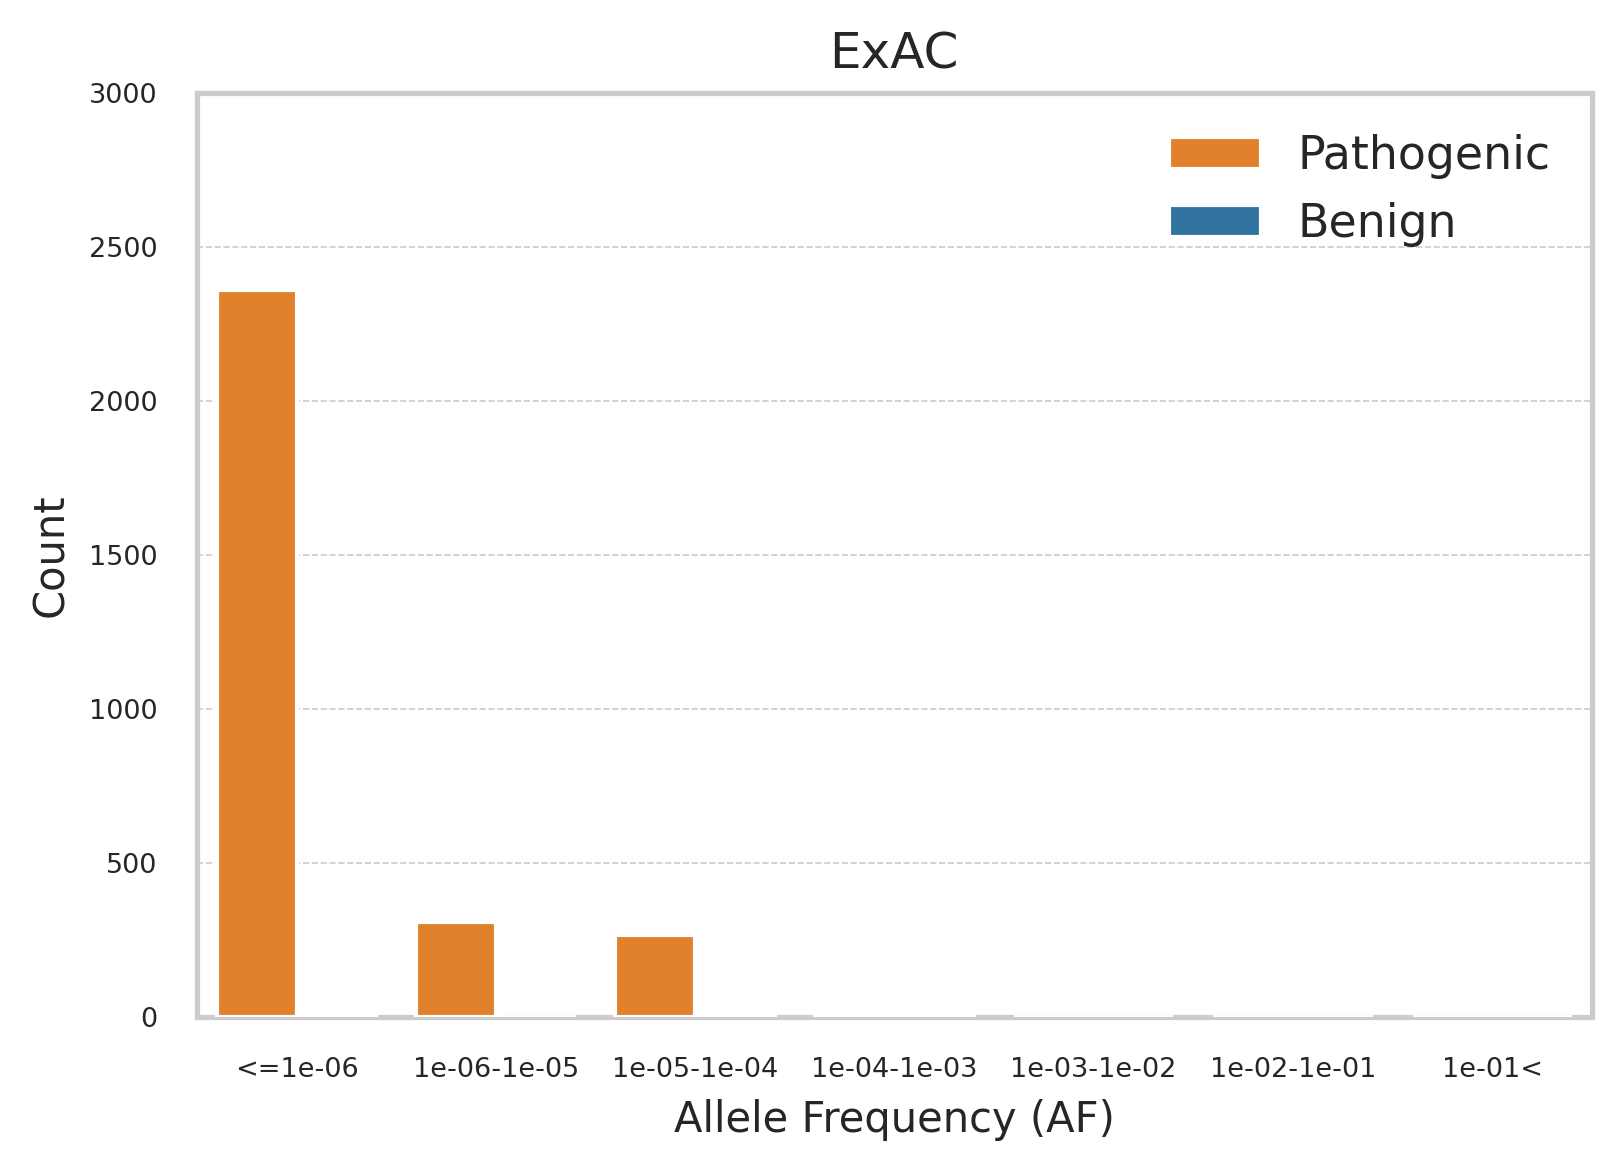

[Def] count_long_criteria_catCol(_df, _para)
!!! Row:	N = (8508, 80)
!!! Set:	filterRows = {'+': {'varType': ['n', 't']}}
!!! Set:	catCol = clnSig23
!!! Set:	criteriaCol = {'gnomAD_genomes_AF': 6}
!!! No Set:	renameCol = {} (default)
!!! Group:	clnSig23 = 2 [0 1]
!!! df(filterRows):	N = (2945, 80)
!!! gnomAD_genomes_AF(min):	6.56366e-06
!!! gnomAD_genomes_AF(max):	0.245156
[Def] plot_dist_af(_df, _para)
!!! Row(df):	N = (14, 6)
!!! Row:	N = 2,945
!!! Set:	prefix = clinvar2021
!!! Set:	title = gnomAD_G
!!! No Set:	pngFold =  (default)
!!! Set:	x = bins
!!! Set:	y = count
!!! Set:	hue = clnSig23


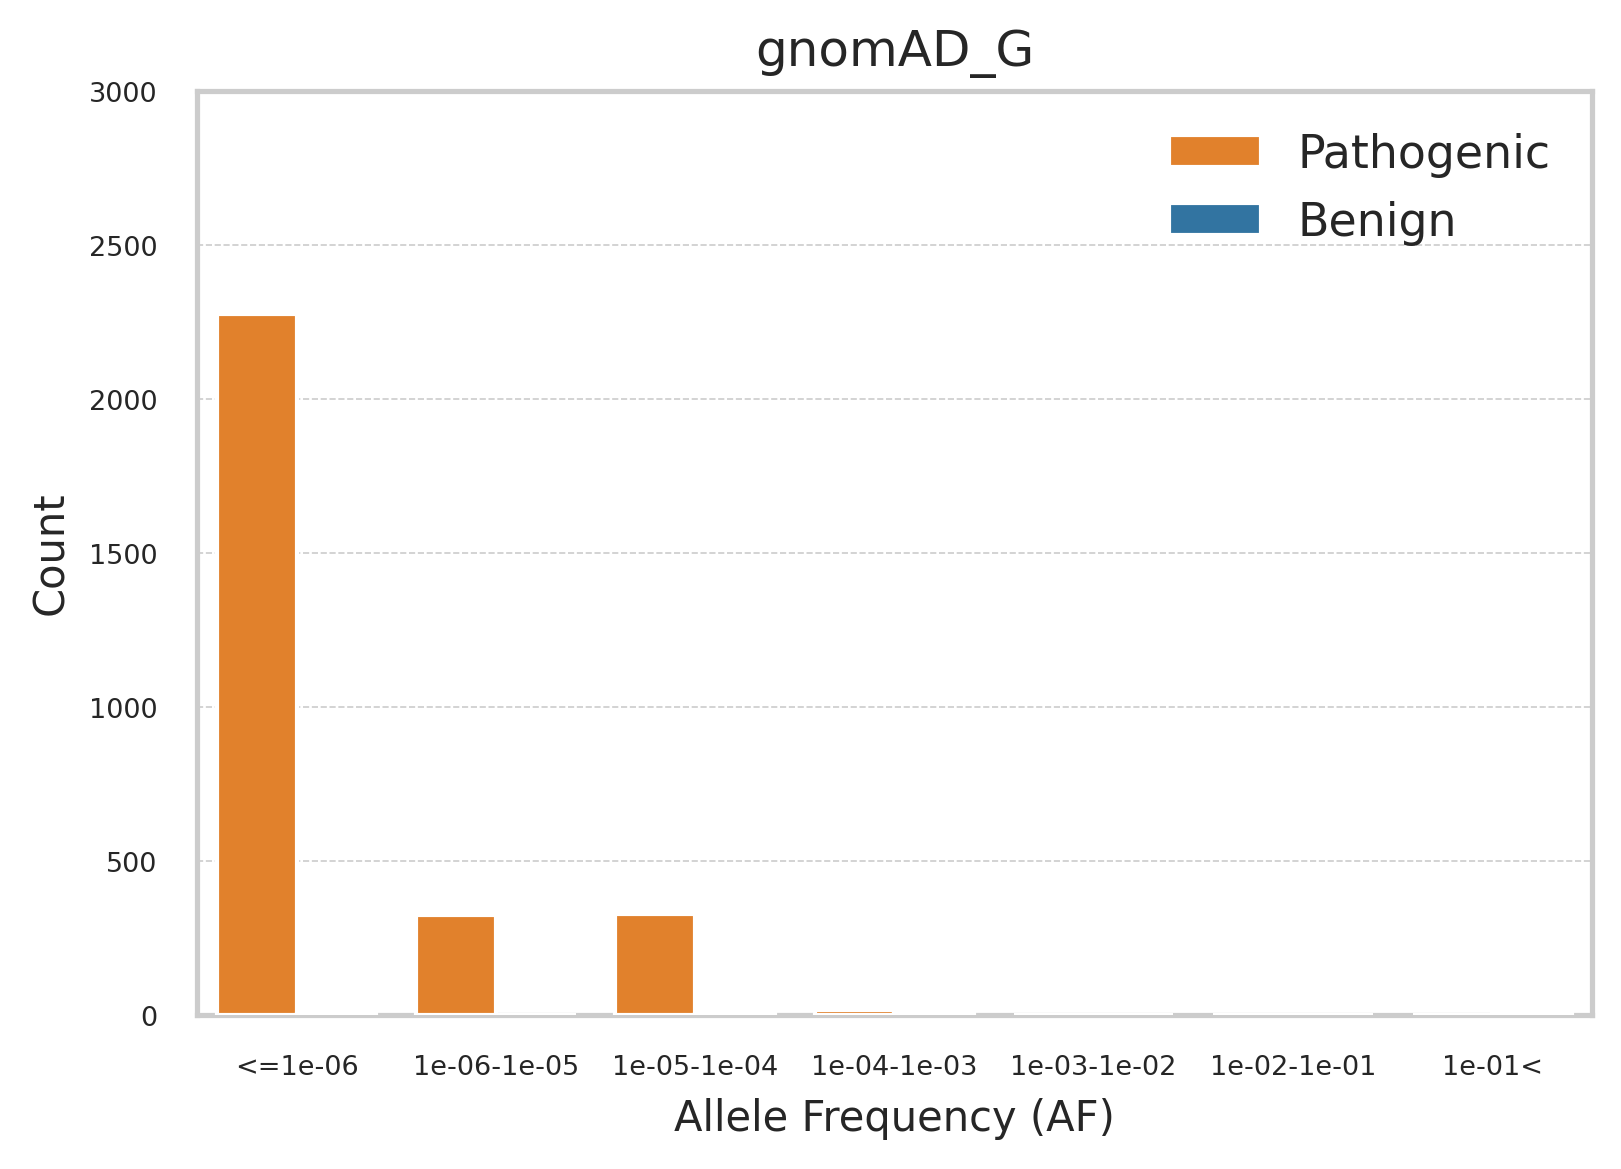

[Def] count_long_criteria_catCol(_df, _para)
!!! Row:	N = (8508, 80)
!!! Set:	filterRows = {'+': {'varType': ['n', 't']}}
!!! Set:	catCol = clnSig23
!!! Set:	criteriaCol = {'gnomAD_exomes_AF': 6}
!!! No Set:	renameCol = {} (default)
!!! Group:	clnSig23 = 2 [0 1]
!!! df(filterRows):	N = (2945, 80)
!!! gnomAD_exomes_AF(min):	6.84044e-07
!!! gnomAD_exomes_AF(max):	0.206474
[Def] plot_dist_af(_df, _para)
!!! Row(df):	N = (14, 6)
!!! Row:	N = 2,945
!!! Set:	prefix = clinvar2021
!!! Set:	title = gnomAD_E
!!! No Set:	pngFold =  (default)
!!! Set:	x = bins
!!! Set:	y = count
!!! Set:	hue = clnSig23


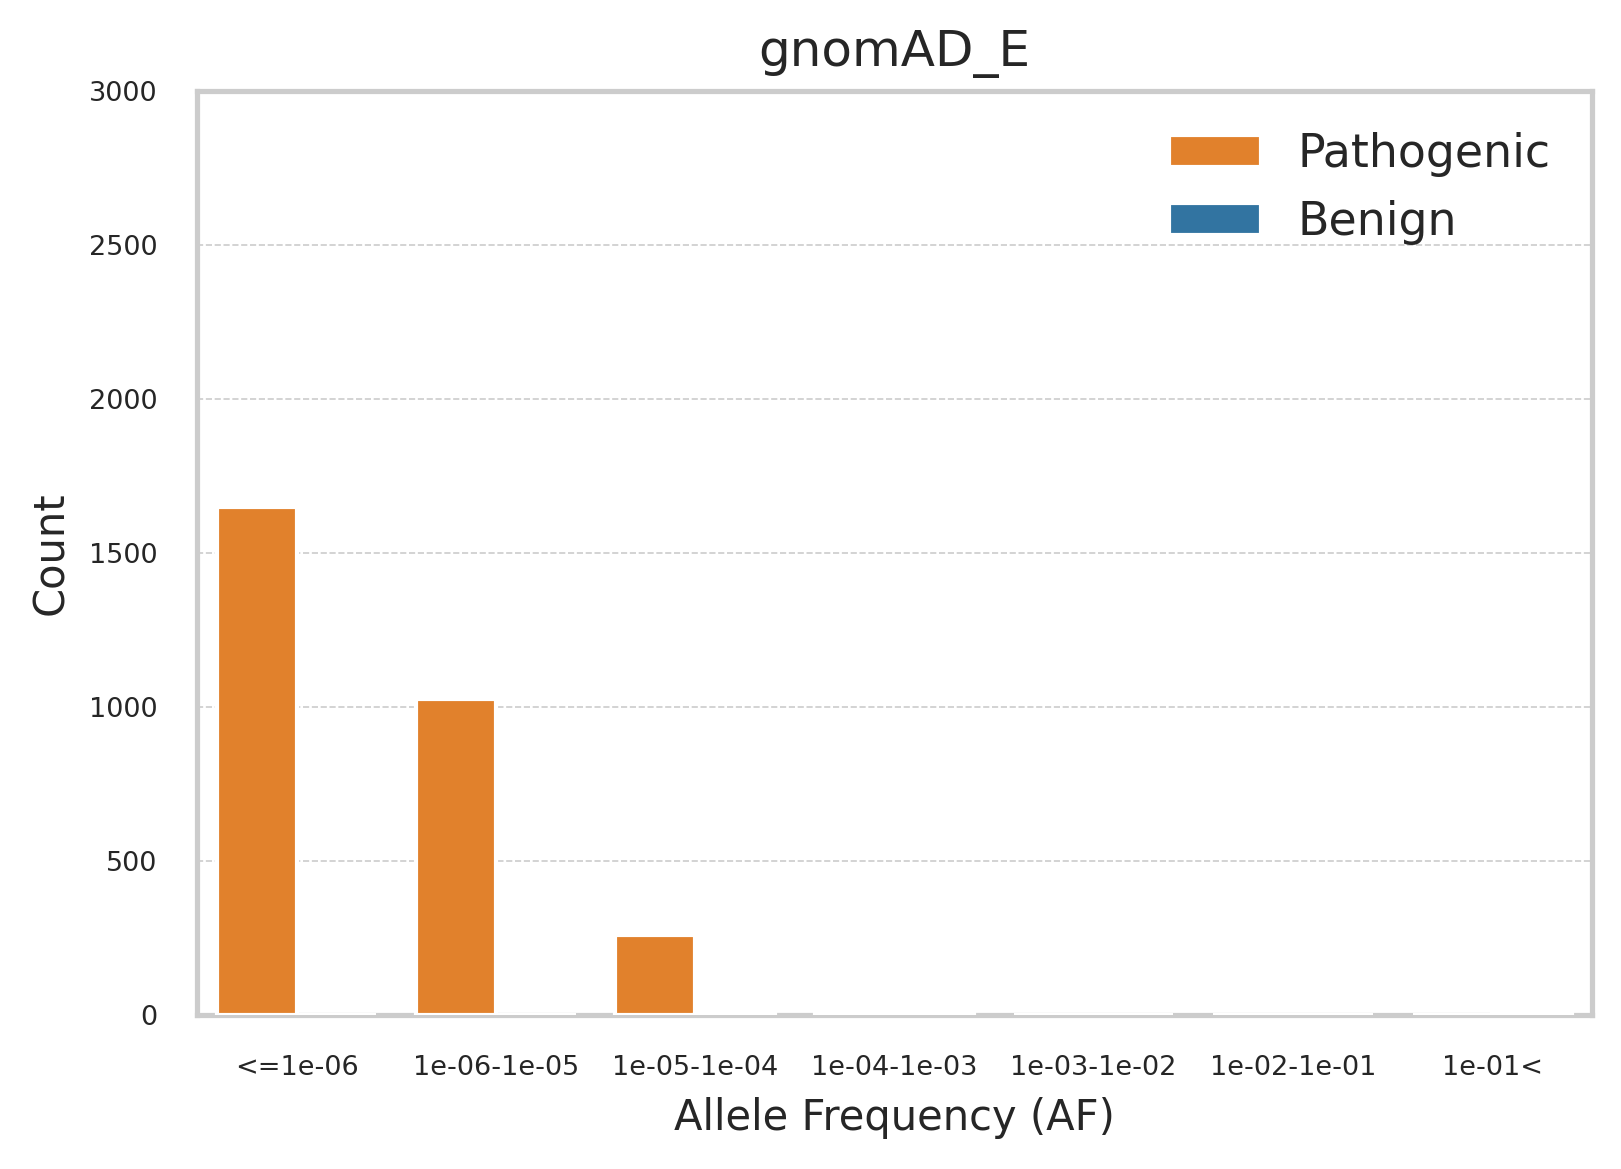

#==================================================

## Def: plot_af_parallel_cat_diagram(_df, _para)

In [ ]:
def plot_af_parallel_cat_diagram(_df, _para):
    import plotly.graph_objects as go

    _defName = 'plot_af_parallel_cat_diagram'
    _df = _df.copy()
    _para = _para.copy()

    _default = {'prefix':None, 'title':'', 'renameCols':{}, 'filterRows':{}, 'filterCols':{}, 'binsign':{}, 'colorCol':None}
    _prefix, _title, _renameCols, _filterRows, _filterCols, _binsign, _colorCol = (_para.get(_k, _v) for _k, _v in _default.items())
    _cNum, _signs, = next(iter(_binsign.items()))

    if checkType(_df, 'df') == False: return

    _n = {'N': _df.shape[0]}
    print("=" * 100)
    print(f"[Def] {_defName}(_df, _para)")
    print(f"!!! Row:\tN = {_n['N']:,}")
    if check_parameter(_para, _default) == False : return None
    print("=" * 100)

    if _filterRows:
        _df = filterRows(_df, _filterRows)
        if _df.empty: return

    if _filterCols:
        _df = filterCols(_df, _filterCols)
        if _df.empty: return

    if _renameCols != {}:
        _df = _df.rename(columns=(_renameCols))

    _dimensions = []
    for _cCol in list(_df.columns):
        _order = []
        _newCol = f'bin_{_cCol}'
        _df = _df.rename(columns={_cCol:_newCol})

        for _c in range(_cNum + 1):
            _s = 10**-_c
            _e = 10**-(_c+1)

            _query = f'{_e}{_signs[0]}{_newCol}{_signs[1]}{_s}'
            _bins = f'{_e:.0e}-{_s:.0e}'

            if _c == 0:
                _bins = f'{_e}{_signs[0]}'
            elif _c == _cNum:
                _e = 0
                _query = f'{_e}{_signs[1]}{_newCol}{_signs[1]}{_s}'
                _bins = f'{_signs[1]}{_s:.0e}'

            _index = _df.query(_query).index
            if len(_index)>0:
                _df.loc[_index, _cCol] = _bins
                _order.append(_bins)

        _dim = go.parcats.Dimension(values = _df[_cCol],
                                    categoryarray=_order,
                                    label=_cCol)
        _dimensions.append(_dim)

    # cat -> num
    category_map = {val: i / (len(_order) - 1) for i, val in enumerate(_order)}
    _df['color_code'] = _df[_renameCols.get(_colorCol)].map(category_map)  # ESP(AA) 컬럼 사용

    _colorNum = _cNum - len(_order) + 1

    tab10 = plt.get_cmap("tab10")
    colorscale = []
    for _i, _v in enumerate(list(category_map.values())):
        _c = [_v, mcolors.to_hex(tab10(_i+_colorNum))] #tab10
        colorscale.append(_c)

    fig = go.Figure(data = [go.Parcats(dimensions= _dimensions,
            line={'shape': 'hspline','color': _df['color_code'], 'colorscale': colorscale, },
            labelfont={'size': 20, },
            tickfont={'size': 12, },
            arrangement='freeform')])

    fig.update_layout(
        width=1000,   # 가로 크기
        height=600   # 세로 크기
    )
    fig.show()

[Def] plot_af_parallel_cat_diagram(_df, _para)
!!! Row:	N = 8,508
!!! Set:	prefix = clinvar2021
!!! No Set:	title =  (default)
!!! Set:	renameCols = {'ESP6500_AA_AF': 'ESP_AA', 'ESP6500_EA_AF': 'ESP_EA', '1000Gp3_AF': '1000GP', 'ExAC_AF': 'ExAC', 'gnomAD_genomes_AF': 'gnomAD_G', 'gnomAD_exomes_AF': 'gnomAD_E'}
!!! Set:	filterRows = {'+': {'clnSig23': [0]}}
!!! Set:	filterCols = {'+': ['ESP6500_AA_AF', 'ESP6500_EA_AF', '1000Gp3_AF', 'ExAC_AF', 'gnomAD_genomes_AF', 'gnomAD_exomes_AF']}
!!! Set:	binsign = {6: ['<', '<=']}
!!! Set:	colorCol = gnomAD_exomes_AF
!!! df(filterRows):	N = (3617, 80)
!!! df(filterCols):	N = (3617, 6)


[Def] plot_af_parallel_cat_diagram(_df, _para)
!!! Row:	N = 8,508
!!! Set:	prefix = clinvar2021
!!! No Set:	title =  (default)
!!! Set:	renameCols = {'ESP6500_AA_AF': 'ESP_AA', 'ESP6500_EA_AF': 'ESP_EA', '1000Gp3_AF': '1000GP', 'ExAC_AF': 'ExAC', 'gnomAD_genomes_AF': 'gnomAD_G', 'gnomAD_exomes_AF': 'gnomAD_E'}
!!! Set:	filterRows = {'+': {'clnSig23': [1]}}
!!! Set:	filterCols = {'+': ['ESP6500_AA_AF', 'ESP6500_EA_AF', '1000Gp3_AF', 'ExAC_AF', 'gnomAD_genomes_AF', 'gnomAD_exomes_AF']}
!!! Set:	binsign = {6: ['<', '<=']}
!!! Set:	colorCol = gnomAD_exomes_AF
!!! df(filterRows):	N = (4891, 80)
!!! df(filterCols):	N = (4891, 6)


#==================================================

## Def: plot_roc_pr_curve_multi(_df, _para)

In [ ]:
def plot_roc_pr_curve_multi(_df, _para):
    from sklearn.metrics import roc_auc_score,precision_recall_curve, average_precision_score, roc_curve, auc

    _defName = 'plot_roc_pr_curve_multi'
    _df = _df.copy()
    _para = _para.copy()

    _default = {'prefix': None, 'clnsig':None, 'title':None, 'type':'AUC','pngFold': '','minuss':{},
                'filterRows':{}, 'selectCols':None, 'criteriaRows':{}, 'cutValue':0}

    _prefix, _clnsig, _title, _type, _pngFold, _minuss, _filterRows, _selectCols, _criteriaRows, _cutValue = (_para.get(_k, _v) for _k, _v in _default.items())
    _xLim0, _xLim1 = -0.01, 1.01
    _yLim0, _yLim1 = -0.01, 1.01

    if checkType(_df, 'df') == False: return

    print("=" * 100)
    print(f"[Def] {_defName}(_df, _para)")
    print(f"!!! Row(df):\tN = {_df.shape}")
    if check_parameter(_para, _default) == False: return
    print("=" * 100)

    if _filterRows:
        _df = filterRows(_df, _filterRows)
        if _df.empty: return

    if _criteriaRows:
        _k,_v = next(iter(_criteriaRows.items()))
        _df = _df.query(f"{_k} {_v}")
        if _df.empty: return
        _n = _df.shape[0]
        print(f"!!! Row:\tN = {_n:,}")


    _n = _df.shape[0]
    _info = {'AUPRC_x':'Recall', 'AUPRC_y':'Precision', 'AUPRC_title':'Precision-Recall Curve','AUPRC_loc':'lower left',
             'AUC_x':'False Positive Rate', 'AUC_y':'True Positive Rate', 'AUC_title':'ROC Curve','AUC_loc':'lower right',
             }

    #plt.rcdefaults()
    sns.set(style="whitegrid")
    fig, ax = plt.subplots( dpi=150)

    for _col in _selectCols:
        _tmp = _df[[_clnsig, _col]].copy().dropna(subset=[_col]).reset_index(drop=True)

        y_true = _tmp[_clnsig].values.reshape(-1,1)
        y_prob = _tmp[_col].values.reshape(-1,1)

        if _minuss.get(_col) == 1:
            y_prob = -y_prob

        _x, _y, _value2 = None, None, None
        if _type == 'AUPRC':
            precision, recall, cut = precision_recall_curve(y_true, y_prob)
            _x = recall
            _y = precision
            _value2= f'{average_precision_score(y_true, y_prob):.4f}'
        elif _type == 'AUC':
            fpr, tpr, cut = roc_curve(y_true, y_prob)
            _x = fpr
            _y = tpr
            _value2 = f'{roc_auc_score(y_true, y_prob):.4f}'
            #_value2 = f'{auc(fpr, tpr):.4f}'

            if _cutValue:
                #_yLim0 = _cutValue - 0.01
                _value3, _value4 = 0, 0
                _cutRange = tpr >= _cutValue
                if _cutRange.sum() > 1:
                    _value3 = f'{auc(fpr[_cutRange], tpr[_cutRange]):.4f}'

                _cutRange = 1 - fpr >= _cutValue
                if np.sum(_cutRange) > 1:
                    _value4 = f'{auc(fpr[_cutRange],tpr[_cutRange]):.4f}'

                print(_col,'\t', _value2,'\t', _value3,'\t', _value4)

        ax.plot(_x, _y, label=f'{_col} ({_value2})', linewidth = 1)

    if _type == 'AUC':
        ax.plot([0, 1], [0, 1], linestyle='--', lw=0.5, color='gray', alpha=0.5 ) #color=cmap(i / len(_selectCols))

        if _cutValue:
           ax.axhline(y= _cutValue, xmin=0, xmax=1, color='red', linestyle='--', linewidth=0.5)
           ax.axvline(x= (1-_cutValue), ymin=0, ymax=1, color='red', linestyle='--', linewidth=0.5)

    ax.set_xlabel(_info[f'{_type}_x'], fontsize=8)
    ax.set_ylabel(_info[f'{_type}_y'], fontsize=8)
    #ax.set_title(f'{_title} (N = {_n:,})', fontsize=12)
    ax.tick_params(labelsize=6)
    ax.grid(linestyle='--', lw=0.5, color='gray', alpha=0.5)#axis='y', )
    ax.legend(fontsize=6, loc=_info[f'{_type}_loc'], frameon=False, ncol=2,)

    # 축 범위 설정
    ax.set_xlim(_xLim0, _xLim1)  # x축 범위: 0~1
    ax.set_ylim(_yLim0, _yLim1)  # y축 범위: 0~1
    ax.set_aspect('equal', adjustable='box')  # 축 비율을 정사각형으로 맞춤
    plt.tight_layout()

    plt.show()

[Def] plot_roc_pr_curve_multi(_df, _para)
!!! Row(df):	N = (8508, 80)
!!! Set:	prefix = clinvar2021
!!! Set:	clnsig = clnSig23
!!! Set:	title = gnomAD_E
!!! Set:	type = AUC
!!! Set:	pngFold = 03.result/plot
!!! Set:	minuss = {'SIFT': 1, 'SIFT4G': 1, 'FATHMM': 1, 'PROVEAN': 1}
!!! Set:	filterRows = {'+': {'varType': ['m', 'i']}}
!!! Set:	selectCols = ['MetaRNN', 'ClinPred', 'REVEL', 'gMVP', 'VEST4', 'VARITY_R', 'VARITY_ER', 'MutPred', 'MVP', 'DEOGEN2', 'MetaSVM', 'MetaLR', 'PROVEAN', 'MutationAssessor', 'M-CAP', 'Eigen', 'CADD', 'Polyphen2_HVAR', 'FATHMM-XF', 'SIFT4G', 'SIFT', 'Polyphen2_HDIV', 'LIST-S2', 'FATHMM', 'PrimateAI', 'FATHMM-MKL', 'DANN', 'GenoCanyon']
!!! Set:	criteriaRows = {'gnomAD_exomes_AF': '<0.01'}
!!! Set:	cutValue = 0
!!! df(filterRows):	N = (5563, 80)
!!! Row:	N = 4,589


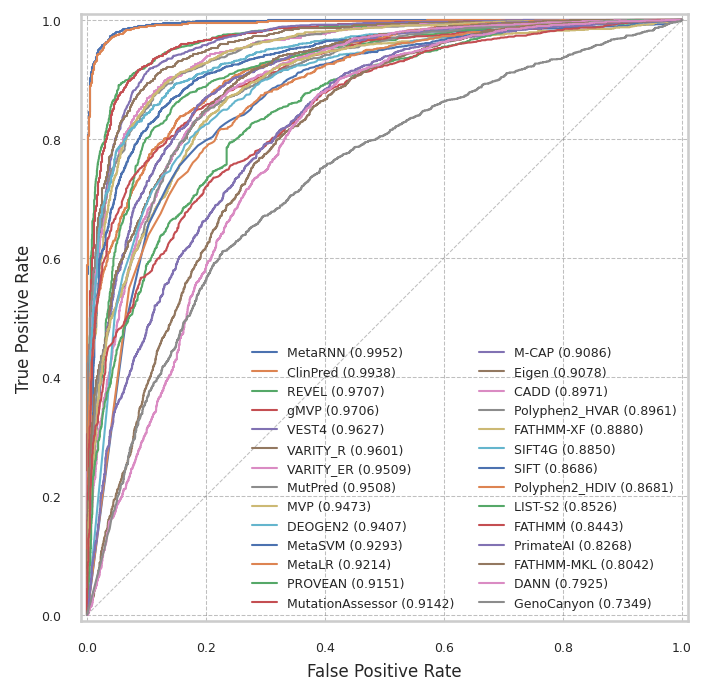

[Def] plot_roc_pr_curve_multi(_df, _para)
!!! Row(df):	N = (8508, 80)
!!! Set:	prefix = clinvar2021
!!! Set:	clnsig = clnSig23
!!! Set:	title = gnomAD_E
!!! Set:	type = AUC
!!! Set:	pngFold = 03.result/plot
!!! Set:	minuss = {'SIFT': 1, 'SIFT4G': 1, 'FATHMM': 1, 'PROVEAN': 1}
!!! Set:	filterRows = {'+': {'varType': ['m', 'i']}}
!!! Set:	selectCols = ['MetaRNN', 'ClinPred', 'REVEL', 'gMVP', 'VEST4', 'VARITY_R', 'VARITY_ER', 'MutPred', 'DEOGEN2', 'MVP', 'MetaSVM', 'MetaLR', 'Eigen', 'PROVEAN', 'MutationAssessor', 'CADD', 'Polyphen2_HVAR', 'M-CAP', 'FATHMM-XF', 'SIFT4G', 'SIFT', 'Polyphen2_HDIV', 'LIST-S2', 'FATHMM', 'PrimateAI', 'FATHMM-MKL', 'DANN', 'GenoCanyon']
!!! Set:	criteriaRows = {'gnomAD_exomes_AF': '<=1'}
!!! Set:	cutValue = 0
!!! df(filterRows):	N = (5563, 80)
!!! Row:	N = 5,563


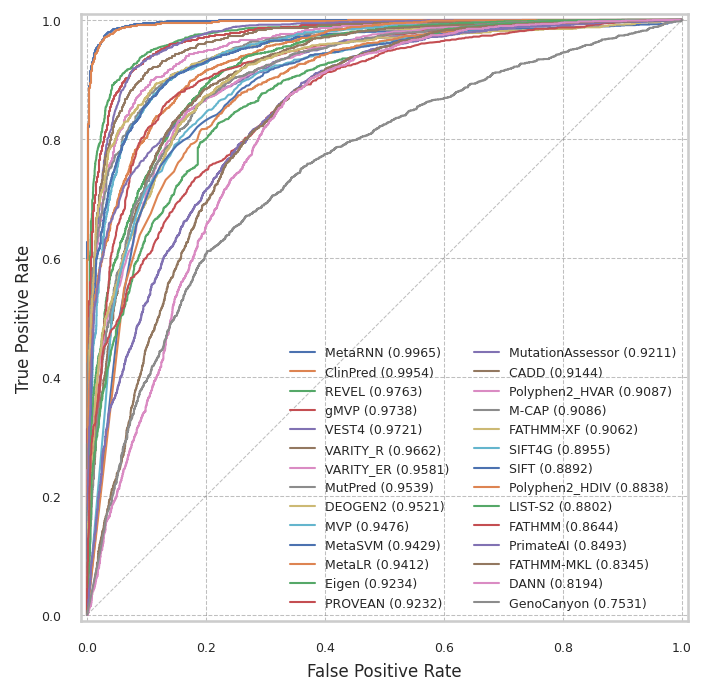

#==================================================

### Def : plot_scatter_sens_spec(_df, _para)

In [ ]:
def plot_scatter_sens_spec(_df, _para):
    _defName = 'plot_scatter_sens_spec'
    _df = _df.copy()
    _para = _para.copy()
    _default = {'prefix': None, 'title':'', 'pngFold':'', 'filterRows':{}}
    _prefix, _title, _pngFold, _filterRows = (_para.get(_k, _v) for _k, _v in _default.items())

    if checkType(_df, 'df') == False: return

    print("=" * 100)
    print(f"[Def] {_defName}(_df, _para)")
    print(f"!!! Row:\tN = {_df.shape[0]:,}")
    if check_parameter(_para, _default) == False: return
    print("=" * 100)

    if _filterRows:
        _df = filterRows(_df, _filterRows)
        if _df.empty: return

    _n = _df['N'][0]
    print(f"!!! Row:\tN = {_n:,}")

    _df = _df.sort_values(by=['cat', 'AUC','Name'], ascending=[True, False, True]).reset_index(drop=True)

    #plt.rcdefaults()
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(dpi=150)
    _s = 30
    sns.scatterplot(data=_df[_df['cat']==0], x="Recall", y="Specificity", style="Name", color='red', s=_s)
    sns.scatterplot(data=_df[_df['cat']==1], x="Recall", y="Specificity", style="Name", s=_s)
    sns.scatterplot(data=_df[_df['cat']==2], x="Recall", y="Specificity", style="Name", s=_s)

    plt.xlim(-0.01, 1.01)
    plt.ylim(-0.01, 1.01)
    legend = plt.legend(ncol=3, loc='lower left',frameon=False, fontsize=5.5)

    if _title: plt.title(f"{_title} (N={_n:,})", fontsize=12)
    plt.grid(linestyle='--',lw=0.4, color='gray', alpha=0.4)
    plt.axvline(x=0.8, color='red', linestyle='--', lw=0.5, alpha=0.5)
    plt.axhline(y=0.8, color='red', linestyle='--', lw=0.5, alpha=0.5)
    plt.xlabel('Sensitivity', fontsize=8)
    plt.ylabel('Specificity', fontsize=8)
    plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],fontsize=6)
    plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],fontsize=6)
    ax.set_aspect('equal', adjustable='box')  # 축 비율을 정사각형으로 맞춤

    plt.show()
    plt.close('all')

[Def] plot_scatter_sens_spec(_df, _para)
!!! Row:	N = 368
!!! Set:	prefix = clinvar2021
!!! No Set:	title =  (default)
!!! No Set:	pngFold =  (default)
!!! Set:	filterRows = {'+': {'criteria': ['AF<0.01'], 'Name': ['CADD', 'ClinPred', 'DANN', 'DEOGEN2', 'Eigen', 'FATHMM', 'FATHMM-MKL', 'FATHMM-XF', 'GenoCanyon', 'LIST-S2', 'M-CAP', 'MVP', 'MetaLR', 'MetaRNN', 'MetaSVM', 'MutPred', 'MutationAssessor', 'PROVEAN', 'Polyphen2_HDIV', 'Polyphen2_HVAR', 'PrimateAI', 'REVEL', 'SIFT', 'SIFT4G', 'VARITY_ER', 'VARITY_R', 'VEST4', 'gMVP']}}
!!! df(filterRows):	N = (28, 34)
!!! Row:	N = 4,589


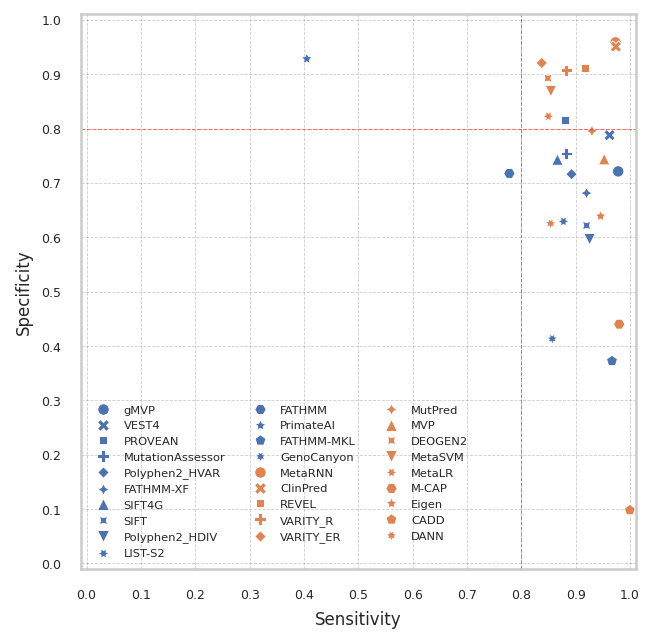

[Def] plot_scatter_sens_spec(_df, _para)
!!! Row:	N = 368
!!! Set:	prefix = clinvar2021
!!! Set:	title = gnomAD_E
!!! No Set:	pngFold =  (default)
!!! Set:	filterRows = {'+': {'Name': ['CADD', 'ClinPred', 'DANN', 'DEOGEN2', 'Eigen', 'FATHMM', 'FATHMM-MKL', 'FATHMM-XF', 'GenoCanyon', 'LIST-S2', 'M-CAP', 'MVP', 'MetaLR', 'MetaRNN', 'MetaSVM', 'MutPred', 'MutationAssessor', 'PROVEAN', 'Polyphen2_HDIV', 'Polyphen2_HVAR', 'PrimateAI', 'REVEL', 'SIFT', 'SIFT4G', 'VARITY_ER', 'VARITY_R', 'VEST4', 'gMVP'], 'criteria': ['All']}}
!!! df(filterRows):	N = (28, 34)
!!! Row:	N = 5,563


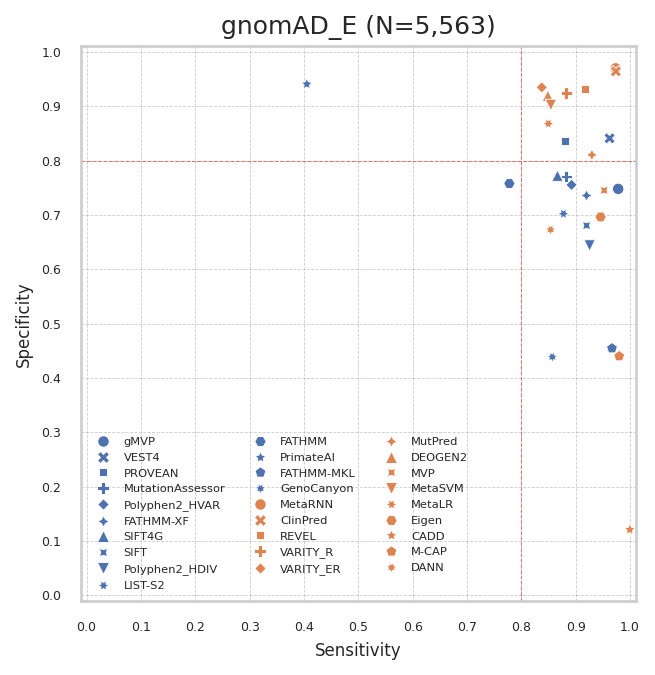

#==================================================




## Def: plot_dist_score(_df, _para, _ax)

In [ ]:
def plot_dist_score(_df, _para, _ax):
    _defName = 'plot_dist_score'
    _para = _para.copy()
    _default = {'cutoff': None, 'title':None, 'pngFold':'','prefix':None}
    _cutoff, _title, _pngFold, _prefix = (_para.get(_k, _v) or _v for _k, _v in _default.items())

    if _para['cutoff'] == 0:
        _cutoff = _para['cutoff']

    if checkType(_df, 'df') == False: return

    _df = _df.dropna().reset_index(drop=True)
    _n = _df.shape[0]

    _y_true = _df.columns[0]
    _y_prob = _df.columns[1]

    print("=" * 100)
    print(f"[Def] {_defName}(_df, _para, _ax)")
    print(f"!!! Row:\tN = {_n:,}")
    print(f"!!! Col:\ty_true = {_y_true}")
    print(f"!!! Col:\ty_prob = {_y_prob}")
    if check_parameter(_para, _default): return
    print("=" * 100)

    #plt.rcdefaults()
    sns.set(style="whitegrid")
    if _ax == '':
        fig, _ax = plt.subplots(1,1, figsize=(4,3), dpi=150)

    _cmap = plt.get_cmap("tab10")
    _palette = {1: _cmap(1), 0:_cmap(0)}

    sns.kdeplot(data = _df, x = _y_prob,  hue = _y_true,lw=1,
                fill = False, legend = False, ax = _ax, #palette = _palette
                )

    _ax.axvline(x=_cutoff, color='r', linestyle='--',lw=1, alpha=0.8)
    _ax.set_xlabel('Score', fontsize=8)
    _ax.set_ylabel('Density', fontsize=8)
    _ax.tick_params(axis='both', labelsize=8)
    _ax.set_title(f'{_title} (N={_n:,})', fontsize = 12)
    _ax.legend(labels=['Pathogenic','Benign'], fontsize=8, frameon=False)
    _ax.grid(linestyle='--', lw=0.5, color='gray', alpha=0.5)
    plt.tight_layout()

    plt.show()
    plt.close('all')


def loop_plot_dist_score(_df, _para):
    _defName = 'loop_plot_dist_score'
    _df = _df.copy()
    _para = _para.copy()
    _default = {'prefix': None, 'title':'', 'pngFold': '', 'filterRows':{}, 'catCol':None, 'selectCols':{}, 'cutoffs':{}, 'criteriaCol':{}}
    _prefix, _title, _pngFold, _filterRows, _catCol, _selectCols, _cutoffs, _criteriaCol = (_para.get(_k, _v) for _k, _v in _default.items())

    if checkType(_df, 'df') == False: return

    _n = _df.shape[0]

    print("=" * 100)
    print(f"[Def] {_defName}(_df, _para)")
    print(f"!!! Row:\tN = {_n:,}")
    if check_parameter(_para, _default) == False: return
    print("=" * 100)

    if _filterRows:
        _df = filterRows(_df, _filterRows)
        if _df.empty: return
        _n = _df.shape[0]

    if _criteriaCol != {}:
        _cCol, _cNum = next(iter(_criteriaCol.items()))
        _query = f'{_cCol} {_cNum}'
        _df = _df.query(_query).reset_index(drop=True)
        _n = _df.shape[0]
        print(f"!!! Row({_query}):\tN = {_n:,}")

    for _col in _selectCols:
        if _col in _df.columns:
            _tmp = _df[[_catCol, _col]]
        else:
            print(f"!!! No Exist:\t{_col}")
            continue

        _para.update({'title':_col, 'cutoff':_cutoffs.get(_col)})
        plot_dist_score(_tmp, _para, '')


[Def] loop_plot_dist_score(_df, _para)
!!! Row:	N = 8,508
!!! Set:	prefix = clinvar2021
!!! No Set:	title =  (default)
!!! No Set:	pngFold =  (default)
!!! Set:	filterRows = {'+': {'varType': ['m', 'i']}}
!!! Set:	catCol = clnSig23
!!! Set:	selectCols = ['CADD', 'ClinPred', 'DANN', 'DEOGEN2', 'Eigen', 'FATHMM', 'FATHMM-MKL', 'FATHMM-XF', 'GenoCanyon', 'LIST-S2', 'M-CAP', 'MVP', 'MetaLR', 'MetaRNN', 'MetaSVM', 'MutPred', 'MutationAssessor', 'PROVEAN', 'Polyphen2_HDIV', 'Polyphen2_HVAR', 'PrimateAI', 'REVEL', 'SIFT', 'SIFT4G', 'VARITY_ER', 'VARITY_R', 'VEST4', 'gMVP']
!!! Set:	cutoffs = {'CADD': 0, 'DANN': 0.99, 'ClinPred': 0.5, 'DEOGEN2': 0.5, 'Eigen': 0, 'FATHMM-MKL': 0.5, 'FATHMM-XF': 0.5, 'FATHMM': -1.5, 'GenoCanyon': 0.999, 'gMVP': 0.5, 'LIST-S2': 0.85, 'M-CAP': 0.025, 'MetaLR': 0.4999, 'MetaRNN': 0.5, 'MetaSVM': 0, 'MutationAssessor': 1.935, 'MutPred': 0.5, 'MVP': 0.7, 'Polyphen2_HDIV': 0.452, 'Polyphen2_HVAR': 0.446, 'PrimateAI': 0.803, 'PROVEAN': -2.5, 'SIFT': 0.05, 'SIFT4G': 0.0

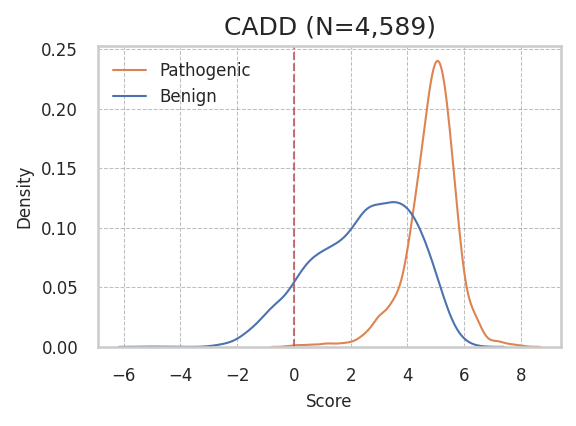

[Def] plot_dist_score(_df, _para, _ax)
!!! Row:	N = 4,578
!!! Col:	y_true = clnSig23
!!! Col:	y_prob = ClinPred
!!! Set:	cutoff = 0.5
!!! Set:	title = ClinPred
!!! No Set:	pngFold =  (default)
!!! Set:	prefix = clinvar2021


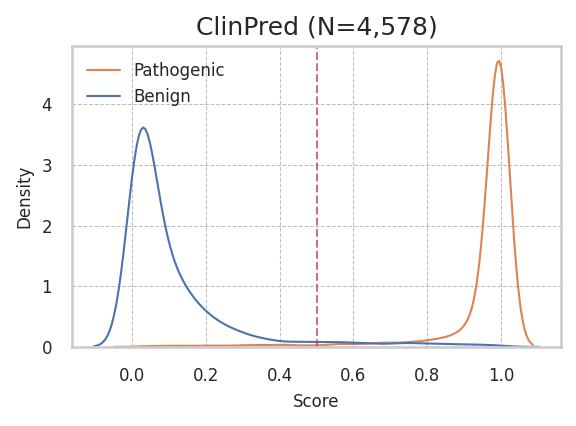

[Def] plot_dist_score(_df, _para, _ax)
!!! Row:	N = 4,586
!!! Col:	y_true = clnSig23
!!! Col:	y_prob = DANN
!!! Set:	cutoff = 0.99
!!! Set:	title = DANN
!!! No Set:	pngFold =  (default)
!!! Set:	prefix = clinvar2021


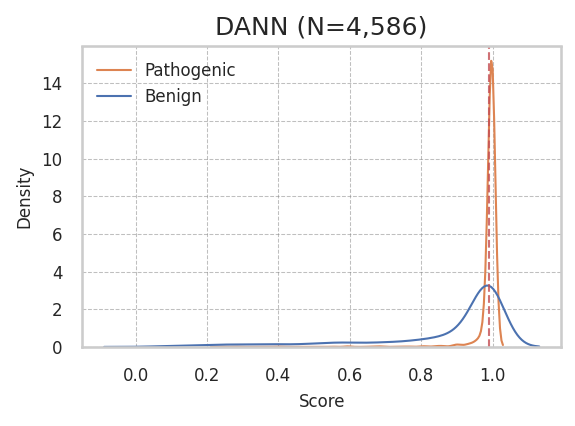

[Def] plot_dist_score(_df, _para, _ax)
!!! Row:	N = 3,576
!!! Col:	y_true = clnSig23
!!! Col:	y_prob = DEOGEN2
!!! Set:	cutoff = 0.5
!!! Set:	title = DEOGEN2
!!! No Set:	pngFold =  (default)
!!! Set:	prefix = clinvar2021


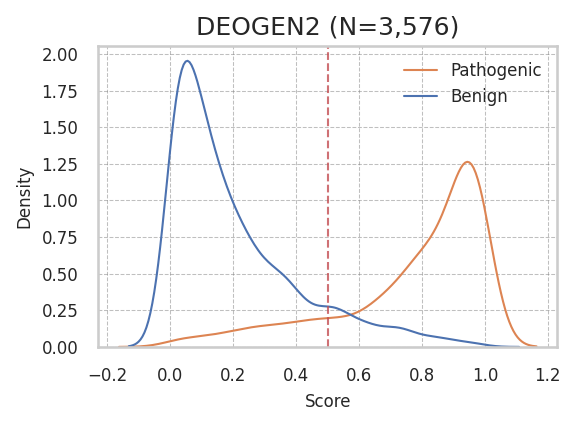

[Def] plot_dist_score(_df, _para, _ax)
!!! Row:	N = 4,150
!!! Col:	y_true = clnSig23
!!! Col:	y_prob = Eigen
!!! Set:	cutoff = 0
!!! Set:	title = Eigen
!!! No Set:	pngFold =  (default)
!!! Set:	prefix = clinvar2021


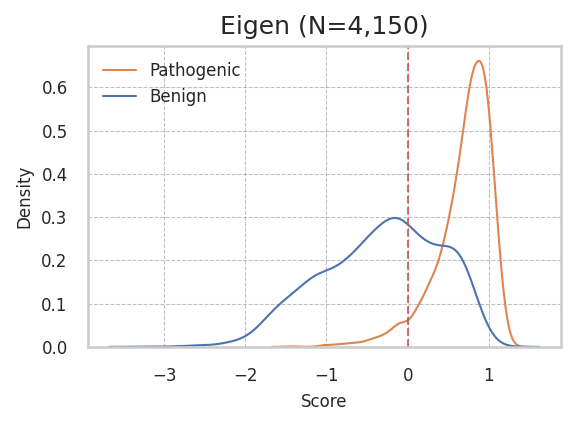

[Def] plot_dist_score(_df, _para, _ax)
!!! Row:	N = 4,173
!!! Col:	y_true = clnSig23
!!! Col:	y_prob = FATHMM
!!! Set:	cutoff = -1.5
!!! Set:	title = FATHMM
!!! No Set:	pngFold =  (default)
!!! Set:	prefix = clinvar2021


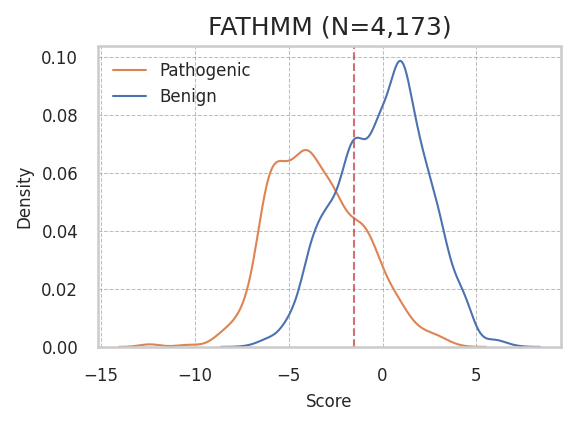

[Def] plot_dist_score(_df, _para, _ax)
!!! Row:	N = 4,586
!!! Col:	y_true = clnSig23
!!! Col:	y_prob = FATHMM-MKL
!!! Set:	cutoff = 0.5
!!! Set:	title = FATHMM-MKL
!!! No Set:	pngFold =  (default)
!!! Set:	prefix = clinvar2021


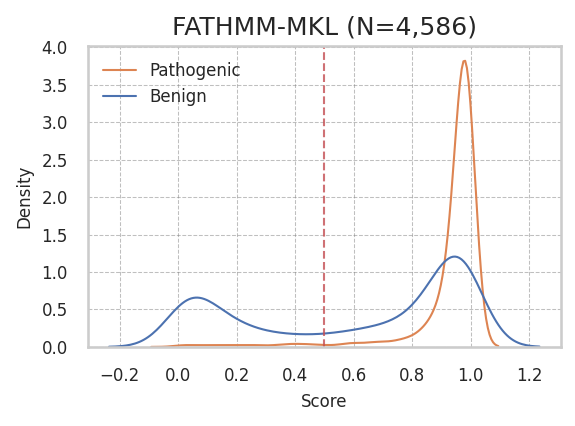

[Def] plot_dist_score(_df, _para, _ax)
!!! Row:	N = 4,108
!!! Col:	y_true = clnSig23
!!! Col:	y_prob = FATHMM-XF
!!! Set:	cutoff = 0.5
!!! Set:	title = FATHMM-XF
!!! No Set:	pngFold =  (default)
!!! Set:	prefix = clinvar2021


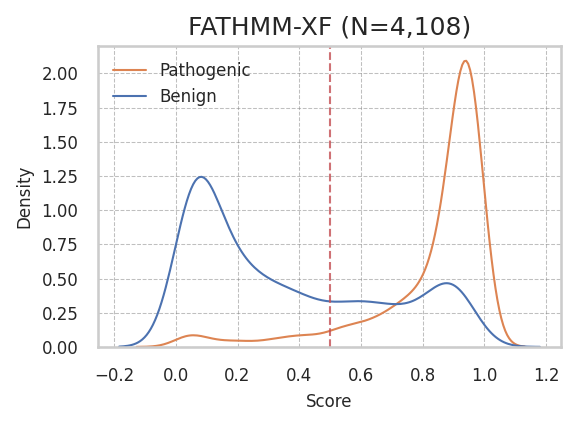

[Def] plot_dist_score(_df, _para, _ax)
!!! Row:	N = 4,586
!!! Col:	y_true = clnSig23
!!! Col:	y_prob = GenoCanyon
!!! Set:	cutoff = 0.999
!!! Set:	title = GenoCanyon
!!! No Set:	pngFold =  (default)
!!! Set:	prefix = clinvar2021


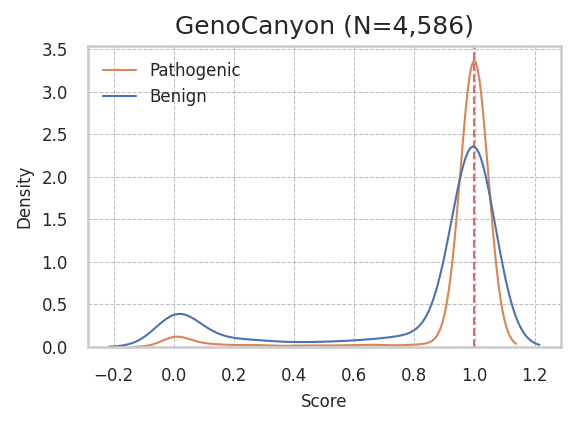

[Def] plot_dist_score(_df, _para, _ax)
!!! Row:	N = 3,632
!!! Col:	y_true = clnSig23
!!! Col:	y_prob = LIST-S2
!!! Set:	cutoff = 0.85
!!! Set:	title = LIST-S2
!!! No Set:	pngFold =  (default)
!!! Set:	prefix = clinvar2021


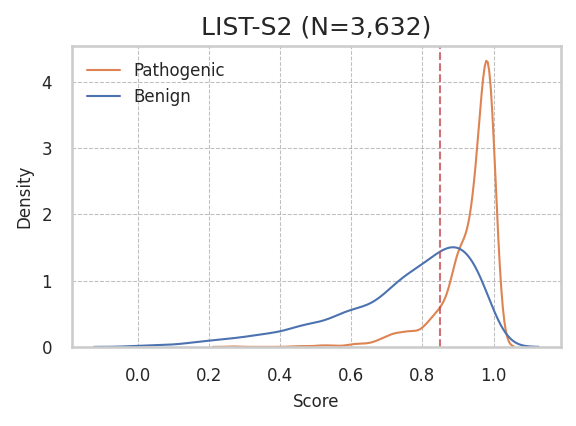

[Def] plot_dist_score(_df, _para, _ax)
!!! Row:	N = 4,178
!!! Col:	y_true = clnSig23
!!! Col:	y_prob = M-CAP
!!! Set:	cutoff = 0.025
!!! Set:	title = M-CAP
!!! No Set:	pngFold =  (default)
!!! Set:	prefix = clinvar2021


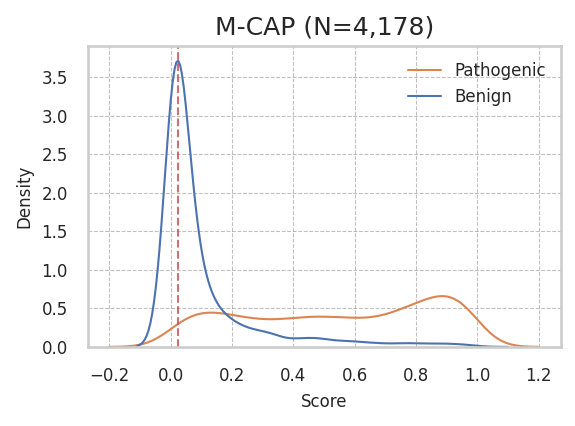

[Def] plot_dist_score(_df, _para, _ax)
!!! Row:	N = 4,285
!!! Col:	y_true = clnSig23
!!! Col:	y_prob = MVP
!!! Set:	cutoff = 0.7
!!! Set:	title = MVP
!!! No Set:	pngFold =  (default)
!!! Set:	prefix = clinvar2021


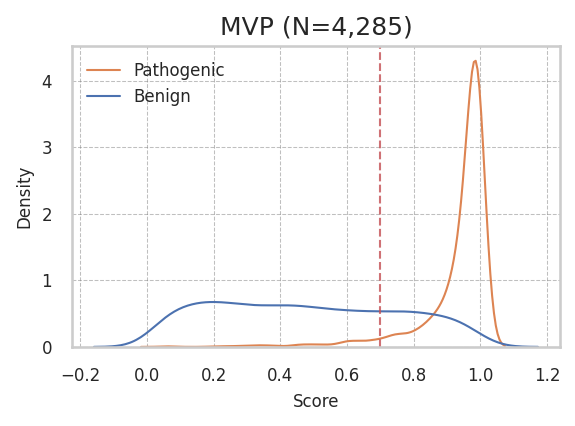

[Def] plot_dist_score(_df, _para, _ax)
!!! Row:	N = 4,576
!!! Col:	y_true = clnSig23
!!! Col:	y_prob = MetaLR
!!! Set:	cutoff = 0.4999
!!! Set:	title = MetaLR
!!! No Set:	pngFold =  (default)
!!! Set:	prefix = clinvar2021


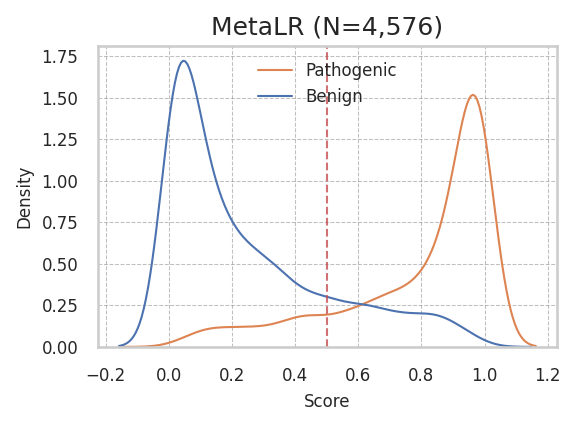

[Def] plot_dist_score(_df, _para, _ax)
!!! Row:	N = 4,589
!!! Col:	y_true = clnSig23
!!! Col:	y_prob = MetaRNN
!!! Set:	cutoff = 0.5
!!! Set:	title = MetaRNN
!!! No Set:	pngFold =  (default)
!!! Set:	prefix = clinvar2021


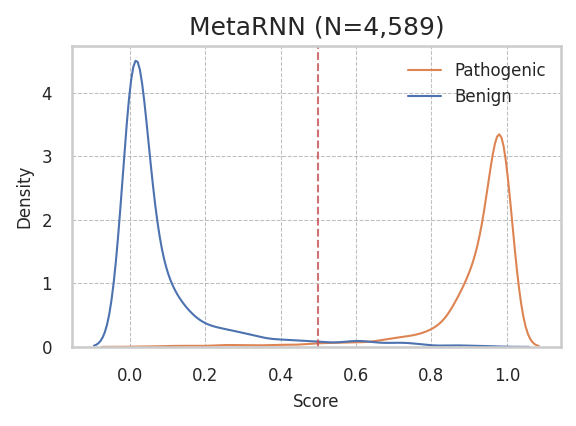

[Def] plot_dist_score(_df, _para, _ax)
!!! Row:	N = 4,576
!!! Col:	y_true = clnSig23
!!! Col:	y_prob = MetaSVM
!!! Set:	cutoff = 0
!!! Set:	title = MetaSVM
!!! No Set:	pngFold =  (default)
!!! Set:	prefix = clinvar2021


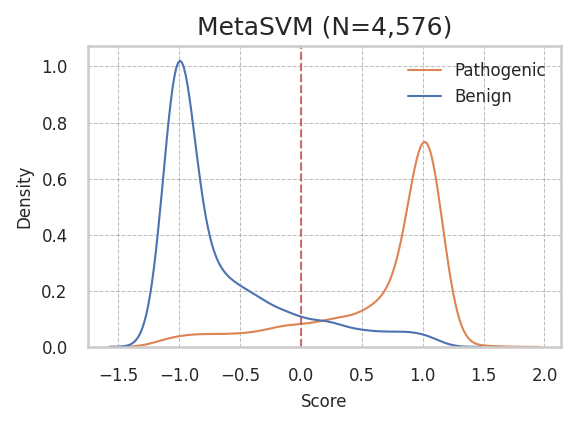

[Def] plot_dist_score(_df, _para, _ax)
!!! Row:	N = 2,451
!!! Col:	y_true = clnSig23
!!! Col:	y_prob = MutPred
!!! Set:	cutoff = 0.5
!!! Set:	title = MutPred
!!! No Set:	pngFold =  (default)
!!! Set:	prefix = clinvar2021


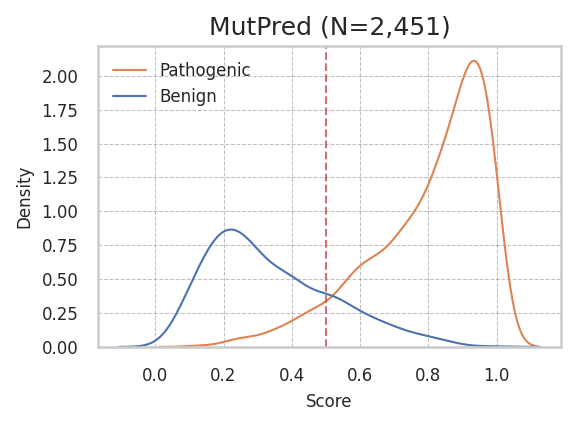

[Def] plot_dist_score(_df, _para, _ax)
!!! Row:	N = 3,615
!!! Col:	y_true = clnSig23
!!! Col:	y_prob = MutationAssessor
!!! Set:	cutoff = 1.935
!!! Set:	title = MutationAssessor
!!! No Set:	pngFold =  (default)
!!! Set:	prefix = clinvar2021


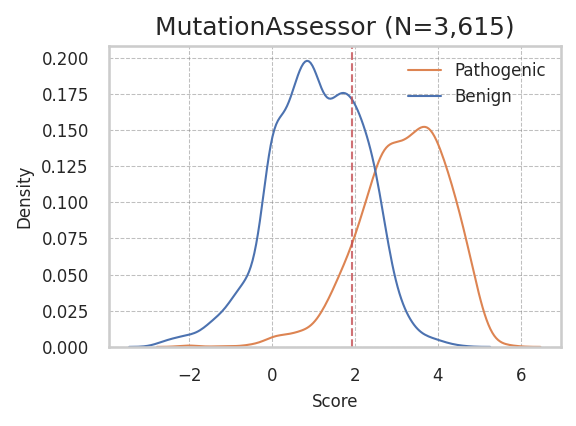

[Def] plot_dist_score(_df, _para, _ax)
!!! Row:	N = 4,150
!!! Col:	y_true = clnSig23
!!! Col:	y_prob = PROVEAN
!!! Set:	cutoff = -2.5
!!! Set:	title = PROVEAN
!!! No Set:	pngFold =  (default)
!!! Set:	prefix = clinvar2021


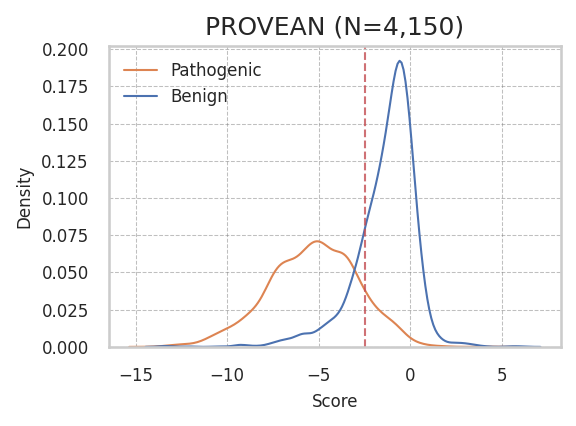

[Def] plot_dist_score(_df, _para, _ax)
!!! Row:	N = 3,833
!!! Col:	y_true = clnSig23
!!! Col:	y_prob = Polyphen2_HDIV
!!! Set:	cutoff = 0.452
!!! Set:	title = Polyphen2_HDIV
!!! No Set:	pngFold =  (default)
!!! Set:	prefix = clinvar2021


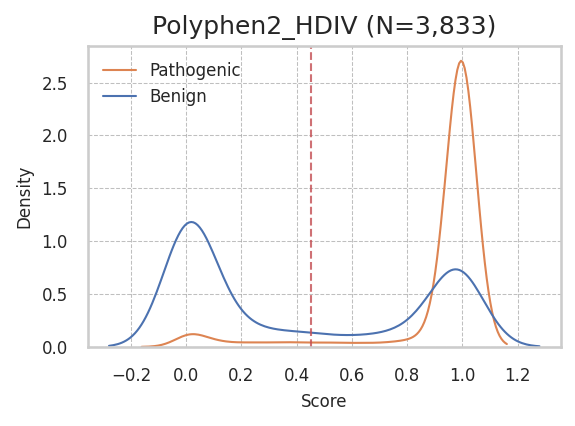

[Def] plot_dist_score(_df, _para, _ax)
!!! Row:	N = 3,833
!!! Col:	y_true = clnSig23
!!! Col:	y_prob = Polyphen2_HVAR
!!! Set:	cutoff = 0.446
!!! Set:	title = Polyphen2_HVAR
!!! No Set:	pngFold =  (default)
!!! Set:	prefix = clinvar2021


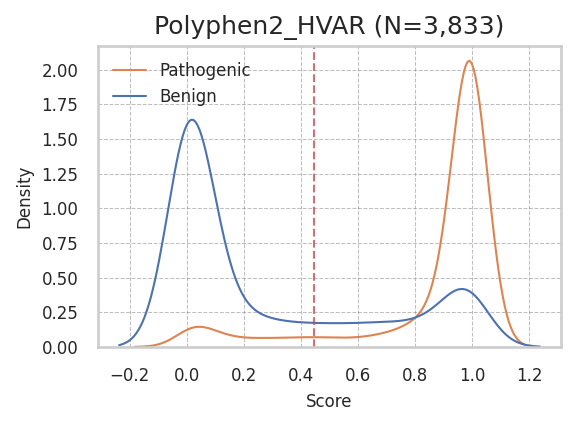

[Def] plot_dist_score(_df, _para, _ax)
!!! Row:	N = 4,495
!!! Col:	y_true = clnSig23
!!! Col:	y_prob = PrimateAI
!!! Set:	cutoff = 0.803
!!! Set:	title = PrimateAI
!!! No Set:	pngFold =  (default)
!!! Set:	prefix = clinvar2021


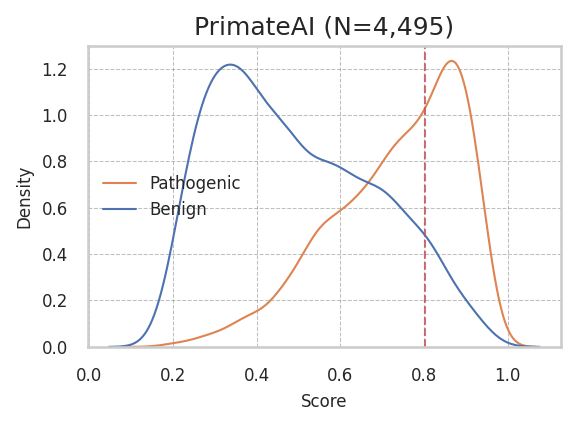

[Def] plot_dist_score(_df, _para, _ax)
!!! Row:	N = 4,146
!!! Col:	y_true = clnSig23
!!! Col:	y_prob = REVEL
!!! Set:	cutoff = 0.5
!!! Set:	title = REVEL
!!! No Set:	pngFold =  (default)
!!! Set:	prefix = clinvar2021


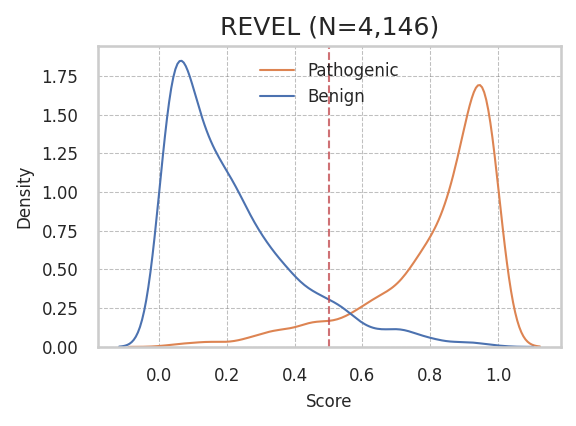

[Def] plot_dist_score(_df, _para, _ax)
!!! Row:	N = 4,119
!!! Col:	y_true = clnSig23
!!! Col:	y_prob = SIFT
!!! Set:	cutoff = 0.05
!!! Set:	title = SIFT
!!! No Set:	pngFold =  (default)
!!! Set:	prefix = clinvar2021


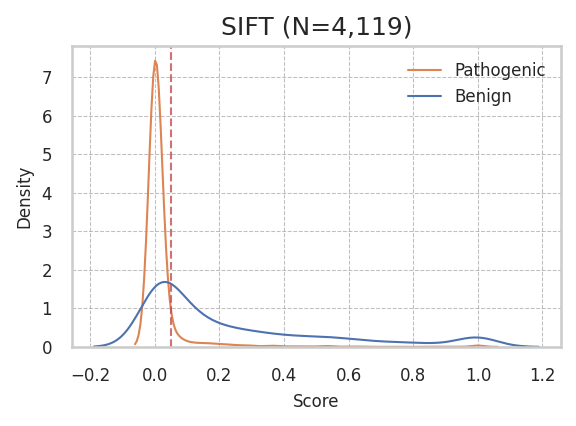

[Def] plot_dist_score(_df, _para, _ax)
!!! Row:	N = 4,223
!!! Col:	y_true = clnSig23
!!! Col:	y_prob = SIFT4G
!!! Set:	cutoff = 0.049
!!! Set:	title = SIFT4G
!!! No Set:	pngFold =  (default)
!!! Set:	prefix = clinvar2021


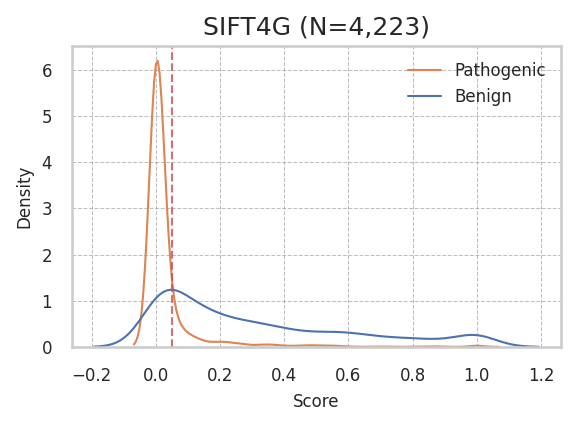

[Def] plot_dist_score(_df, _para, _ax)
!!! Row:	N = 3,547
!!! Col:	y_true = clnSig23
!!! Col:	y_prob = VARITY_ER
!!! Set:	cutoff = 0.5
!!! Set:	title = VARITY_ER
!!! No Set:	pngFold =  (default)
!!! Set:	prefix = clinvar2021


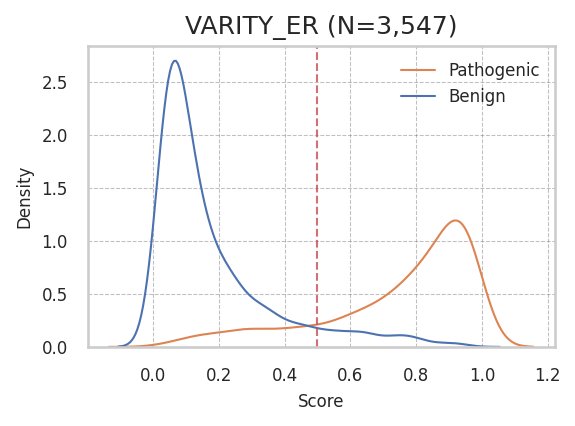

[Def] plot_dist_score(_df, _para, _ax)
!!! Row:	N = 3,547
!!! Col:	y_true = clnSig23
!!! Col:	y_prob = VARITY_R
!!! Set:	cutoff = 0.5
!!! Set:	title = VARITY_R
!!! No Set:	pngFold =  (default)
!!! Set:	prefix = clinvar2021


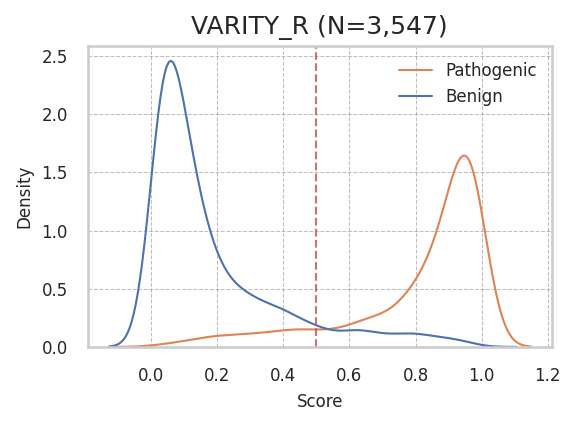

[Def] plot_dist_score(_df, _para, _ax)
!!! Row:	N = 4,385
!!! Col:	y_true = clnSig23
!!! Col:	y_prob = VEST4
!!! Set:	cutoff = 0.5
!!! Set:	title = VEST4
!!! No Set:	pngFold =  (default)
!!! Set:	prefix = clinvar2021


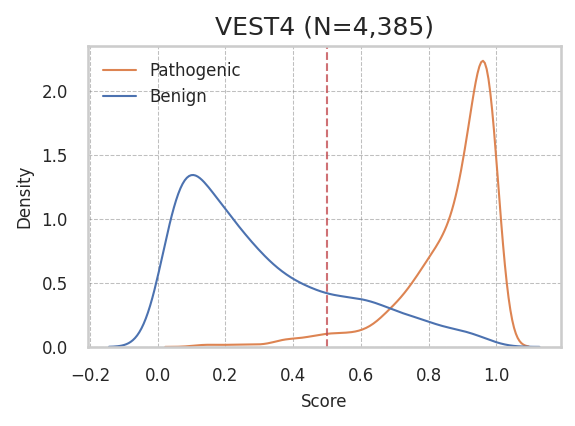

[Def] plot_dist_score(_df, _para, _ax)
!!! Row:	N = 4,345
!!! Col:	y_true = clnSig23
!!! Col:	y_prob = gMVP
!!! Set:	cutoff = 0.5
!!! Set:	title = gMVP
!!! No Set:	pngFold =  (default)
!!! Set:	prefix = clinvar2021


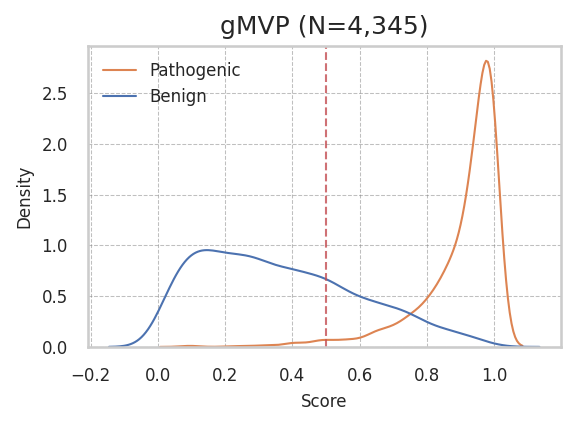

#==================================================


## Def: plot_diff_af_bin(_df, _para)

In [ ]:
def plot_diff_af_bin(_df, _para):
    _defName = 'plot_diff_af_bin'
    _df = _df.copy()
    _para = _para.copy()

    _default = {'measureCol':None, 'filterRows':{},}
    _measureCol, _filterRows, = (_para.get(_k, _v) for _k, _v in _default.items())

    if checkType(_df, 'df') == False: return

    print("=" * 100)
    print(f"[Def] {_defName}(_df, _para)")
    print(f"!!! df:\tN = {_df.shape}")
    if check_parameter(_para, _default) == False: return
    print("=" * 100)

    if _filterRows:
        _df = filterRows(_df, _filterRows)
        if _df.empty: return

    _list = []
    for _c in _df['Name'].unique():
        _max = _df.query(f"Name == '{_c}'")[_measureCol].max()
        _min = _df.query(f"Name == '{_c}'")[_measureCol][_df[_measureCol] != 0].min()
        _diff = _max - _min
        _list.append([_c, _max, _min, _diff])
    _tmp = pd.DataFrame(_list, columns=['Name', 'Max', 'Min', 'Diff'])

    _tmp = _tmp.sort_values(by=['Diff'], ascending=[False]).reset_index(drop=True)

    #plt.rcdefaults()
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 4),dpi=150)
    tab10 = plt.get_cmap("tab10")

    plt.vlines(x=_tmp['Name'], ymin=_tmp['Min'], ymax=_tmp['Max'], colors='#505050', lw=0.5)
    plt.scatter(_tmp['Name'], _tmp['Max'], color = tab10(1), label="Max", marker='o', s=10)
    plt.scatter(_tmp['Name'], _tmp['Min'], color = tab10(0), label="Min", marker='o', s=10)

    if _measureCol == 'Recall':
        _measureCol = 'Sensitivity'

    plt.xlabel("")
    plt.ylabel(_measureCol, fontsize=12)
    plt.ylim(-0.01, 1.01)
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.yticks(fontsize=8)

    plt.legend(loc='lower right', fontsize=8, frameon=False)
    plt.grid(True, linestyle='--', lw=0.4, alpha=0.4, color='gray')
    plt.show()

    return _tmp

[Def] plot_diff_af_bin(_df, _para)
!!! df:	N = (363, 34)
!!! Set:	measureCol = AUC
!!! Set:	filterRows = {'-': {'criteria': ['1e-06>AF>=0e+00', '0', 'All'], 'Name': ['LINSIGHT', 'AlphaMissense', 'MutFormer', 'MutScore', 'PHACTboost', 'VARITY_R_LOO', 'VARITY_ER_LOO', 'MPC', 'ESM1b', 'Eigen-PC', 'BayesDel_noAF', 'BayesDel_addAF', 'EVE']}}
!!! df(filterRows):	N = (165, 34)


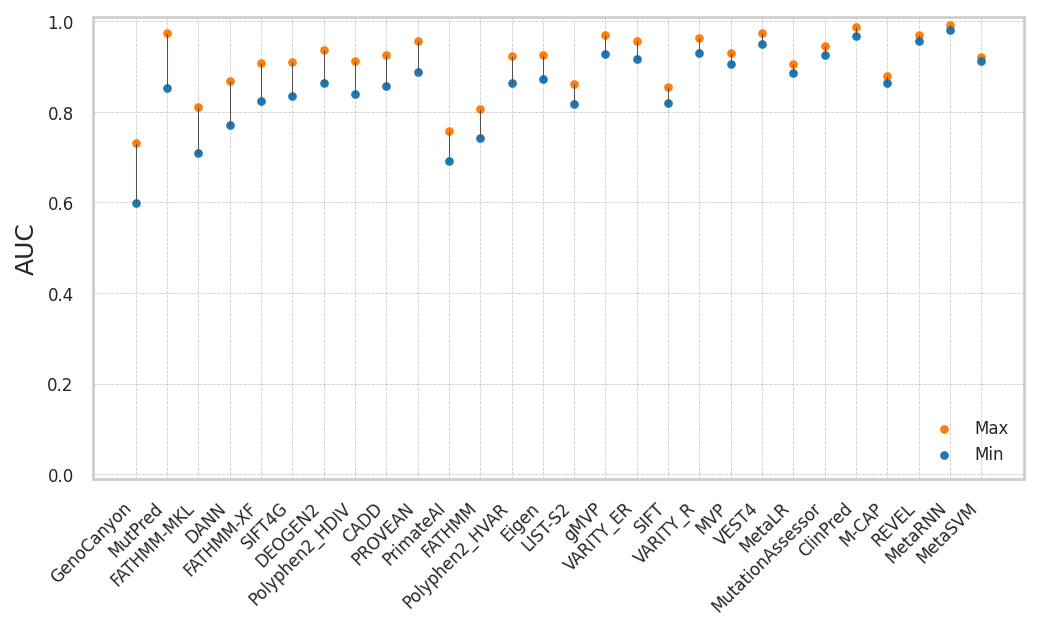

AUC	min:0.0087	max:0.1308	median:0.0482	mean:0.0532
[Def] plot_diff_af_bin(_df, _para)
!!! df:	N = (363, 34)
!!! Set:	measureCol = Recall
!!! Set:	filterRows = {'-': {'criteria': ['1e-06>AF>=0e+00', '0', 'All'], 'Name': ['LINSIGHT', 'AlphaMissense', 'MutFormer', 'MutScore', 'PHACTboost', 'VARITY_R_LOO', 'VARITY_ER_LOO', 'MPC', 'ESM1b', 'Eigen-PC', 'BayesDel_noAF', 'BayesDel_addAF', 'EVE']}}
!!! df(filterRows):	N = (165, 34)


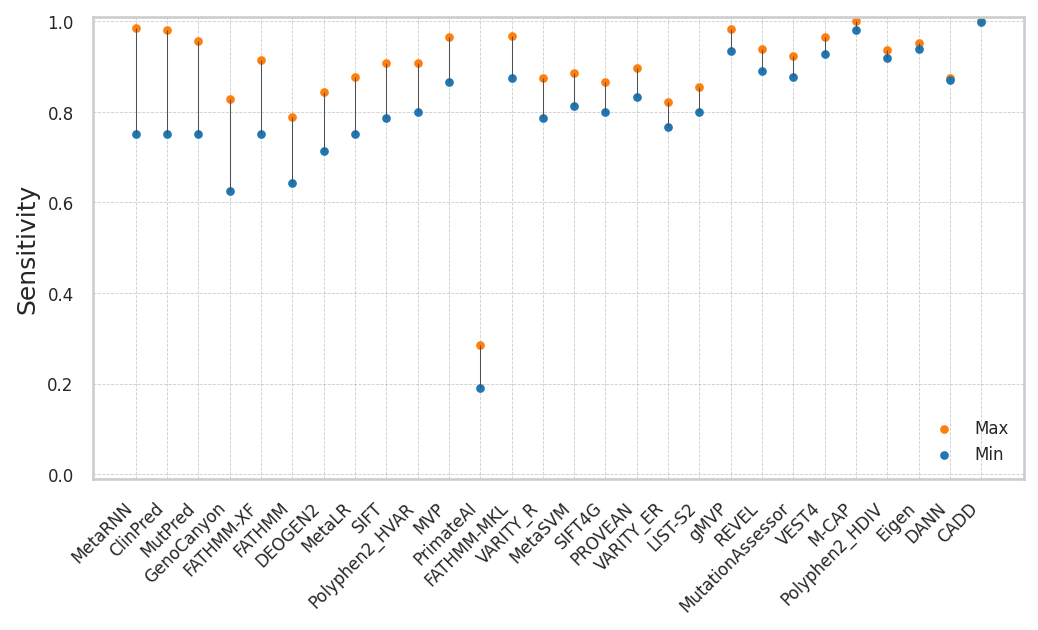

Recall	min:0.0017	max:0.2343	median:0.0803	mean:0.0926
[Def] plot_diff_af_bin(_df, _para)
!!! df:	N = (363, 34)
!!! Set:	measureCol = Specificity
!!! Set:	filterRows = {'-': {'criteria': ['1e-06>AF>=0e+00', '0', 'All'], 'Name': ['LINSIGHT', 'AlphaMissense', 'MutFormer', 'MutScore', 'PHACTboost', 'VARITY_R_LOO', 'VARITY_ER_LOO', 'MPC', 'ESM1b', 'Eigen-PC', 'BayesDel_noAF', 'BayesDel_addAF', 'EVE']}}
!!! df(filterRows):	N = (165, 34)


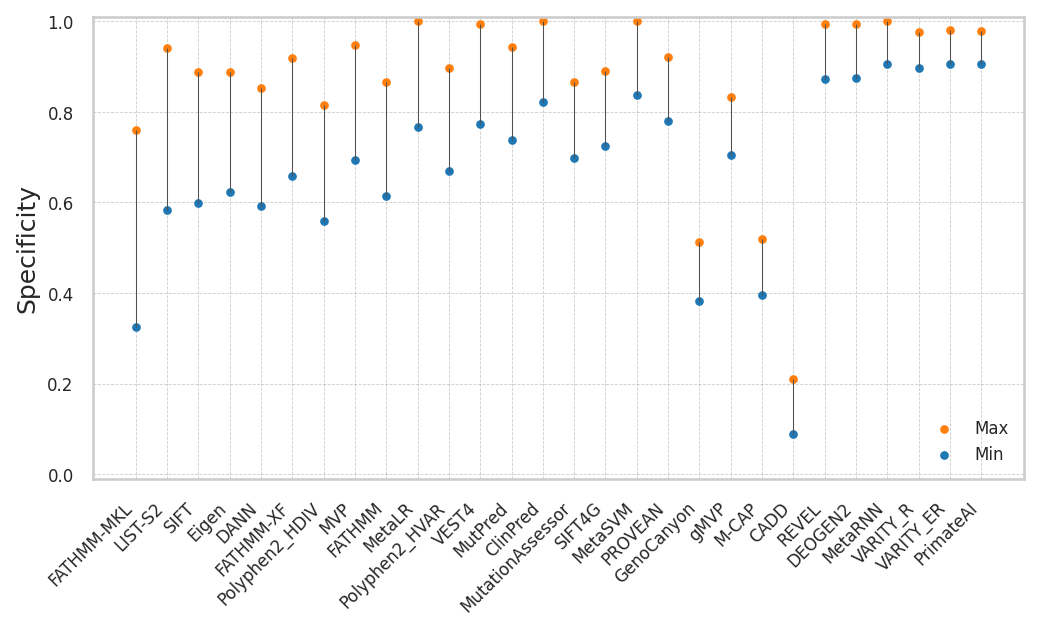

Specificity	min:0.0737	max:0.4333	median:0.1723	mean:0.1925


#==================================================

## Def: plot_scatter_grid(_df, _para)

In [ ]:
def plot_scatter_grid(_df, _para):
    _defName = 'plot_scatter_grid'
    _df = _df.copy()
    _para = _para.copy()

    _default = {'catCol':None, 'gridCol':None, 'measureCol':None, 'filterRows':{},
                'renameRows':{}, 'customizeOrder':{}, 'addLine':False}
    _catCol, _gridCol, _measureCol, _filterRows, _renameRows, _customizeOrder, _addLine = (_para.get(_k, _v) for _k, _v in _default.items())
    _odd = {'Recall':'Specificity', 'Specificity':'Recall', 'AUC':'AUPRC','AUPRC':'AUC'}
    _sortCol = 'AUC'

    if checkType(_df, 'df') == False: return

    print("=" * 100)
    print(f"[Def] {_defName}(_df, _para)")
    print(f"!!! df:\tN = {_df.shape}")
    if check_parameter(_para, _default) == False: return
    print("=" * 100)

    if _filterRows:
        _df = filterRows(_df, _filterRows)
        if _df.empty: return

    if _renameRows:
        _k, _v = next(iter(_renameRows.items()))
        _df[_k] = _df[_k].replace(_v)

    _add = pd.DataFrame()
    if _addLine:
        _add = _df.query("criteria == 'All'")
        _add = _add.sort_values(by=[_sortCol], ascending=[False]).reset_index(drop=True)
        _customizeOrder[_gridCol] = _add[_gridCol].unique().tolist()

        _df = filterRows(_df, {'-':{'criteria':['All']}})
        if _df.empty: return

    if _customizeOrder:
        _df = customize_order(_df, _customizeOrder)

    _criteriaL = _df['criteria'].unique()
    _colorNum = 6 - len(_criteriaL)
    _cmap = plt.get_cmap("tab10")
    _palette = {}
    for _i, _v in enumerate(_criteriaL):
        _palette[_v] = _cmap(_i + _colorNum)

    #plt.rcdefaults()
    sns.set(style="whitegrid")
    g = sns.FacetGrid(_df, col = _gridCol, sharex=False, sharey=True, height=4, aspect=0.5, col_wrap=7)
    g.map_dataframe(sns.scatterplot, x = _catCol, y = _measureCol, hue = _catCol, sizes=(4,5),
                    palette=_palette, edgecolor='gray',s=40)

    g.fig.subplots_adjust(hspace=0.1, wspace=0.1)

    if _add.empty == False:
        for ax, _sub in zip(g.axes.flat, _add.itertuples()):
            _value = getattr(_sub, _measureCol)
            ax.axhline(_value, color='blue', linestyle="--", lw=0.8, alpha=0.8)

            _value = getattr(_sub, _odd[_measureCol])
            ax.axhline(_value, color='red', linestyle="--", lw=0.8, alpha=0.8)

    g.map(plt.grid, axis='y', linestyle='--',  lw=0.5, alpha=0.5, color='gray')

    for ax in g.axes.flat:
        ax.set_xticks([])
        ax.set_xlabel("")

    if _measureCol == 'Recall':
        _measureCol = 'Sensitivity'

    g.set_ylabels(_measureCol, fontsize=12)
    g.set_titles("{col_name}", fontsize=12)
    g.fig.set_dpi(150)

    g.add_legend(fontsize=10,   bbox_to_anchor=(0.5, 1.02), ncol=6) #(0.51, 1.05)
    g.tight_layout()


[Def] plot_scatter_grid(_df, _para)
!!! df:	N = (363, 34)
!!! Set:	catCol = criteria
!!! Set:	gridCol = Name
!!! Set:	measureCol = Specificity
!!! Set:	filterRows = {'-': {'criteria': ['1e-06>AF>=0e+00', '0'], 'Name': ['LINSIGHT', 'AlphaMissense', 'MutFormer', 'MutScore', 'PHACTboost', 'VARITY_R_LOO', 'VARITY_ER_LOO', 'MPC', 'ESM1b', 'Eigen-PC', 'BayesDel_noAF', 'BayesDel_addAF', 'EVE']}}
!!! No Set:	renameRows = {} (default)
!!! Set:	customizeOrder = {'criteria': ['AF>=1e-01', '1e-01>AF>=1e-02', '1e-02>AF>=1e-03', '1e-03>AF>=1e-04', '1e-04>AF>=1e-05', '1e-05>AF>=1e-06']}
!!! Set:	addLine = True
!!! df(filterRows):	N = (193, 34)
!!! df(filterRows):	N = (165, 34)
!!! df(customize_order):	N = (165, 34)


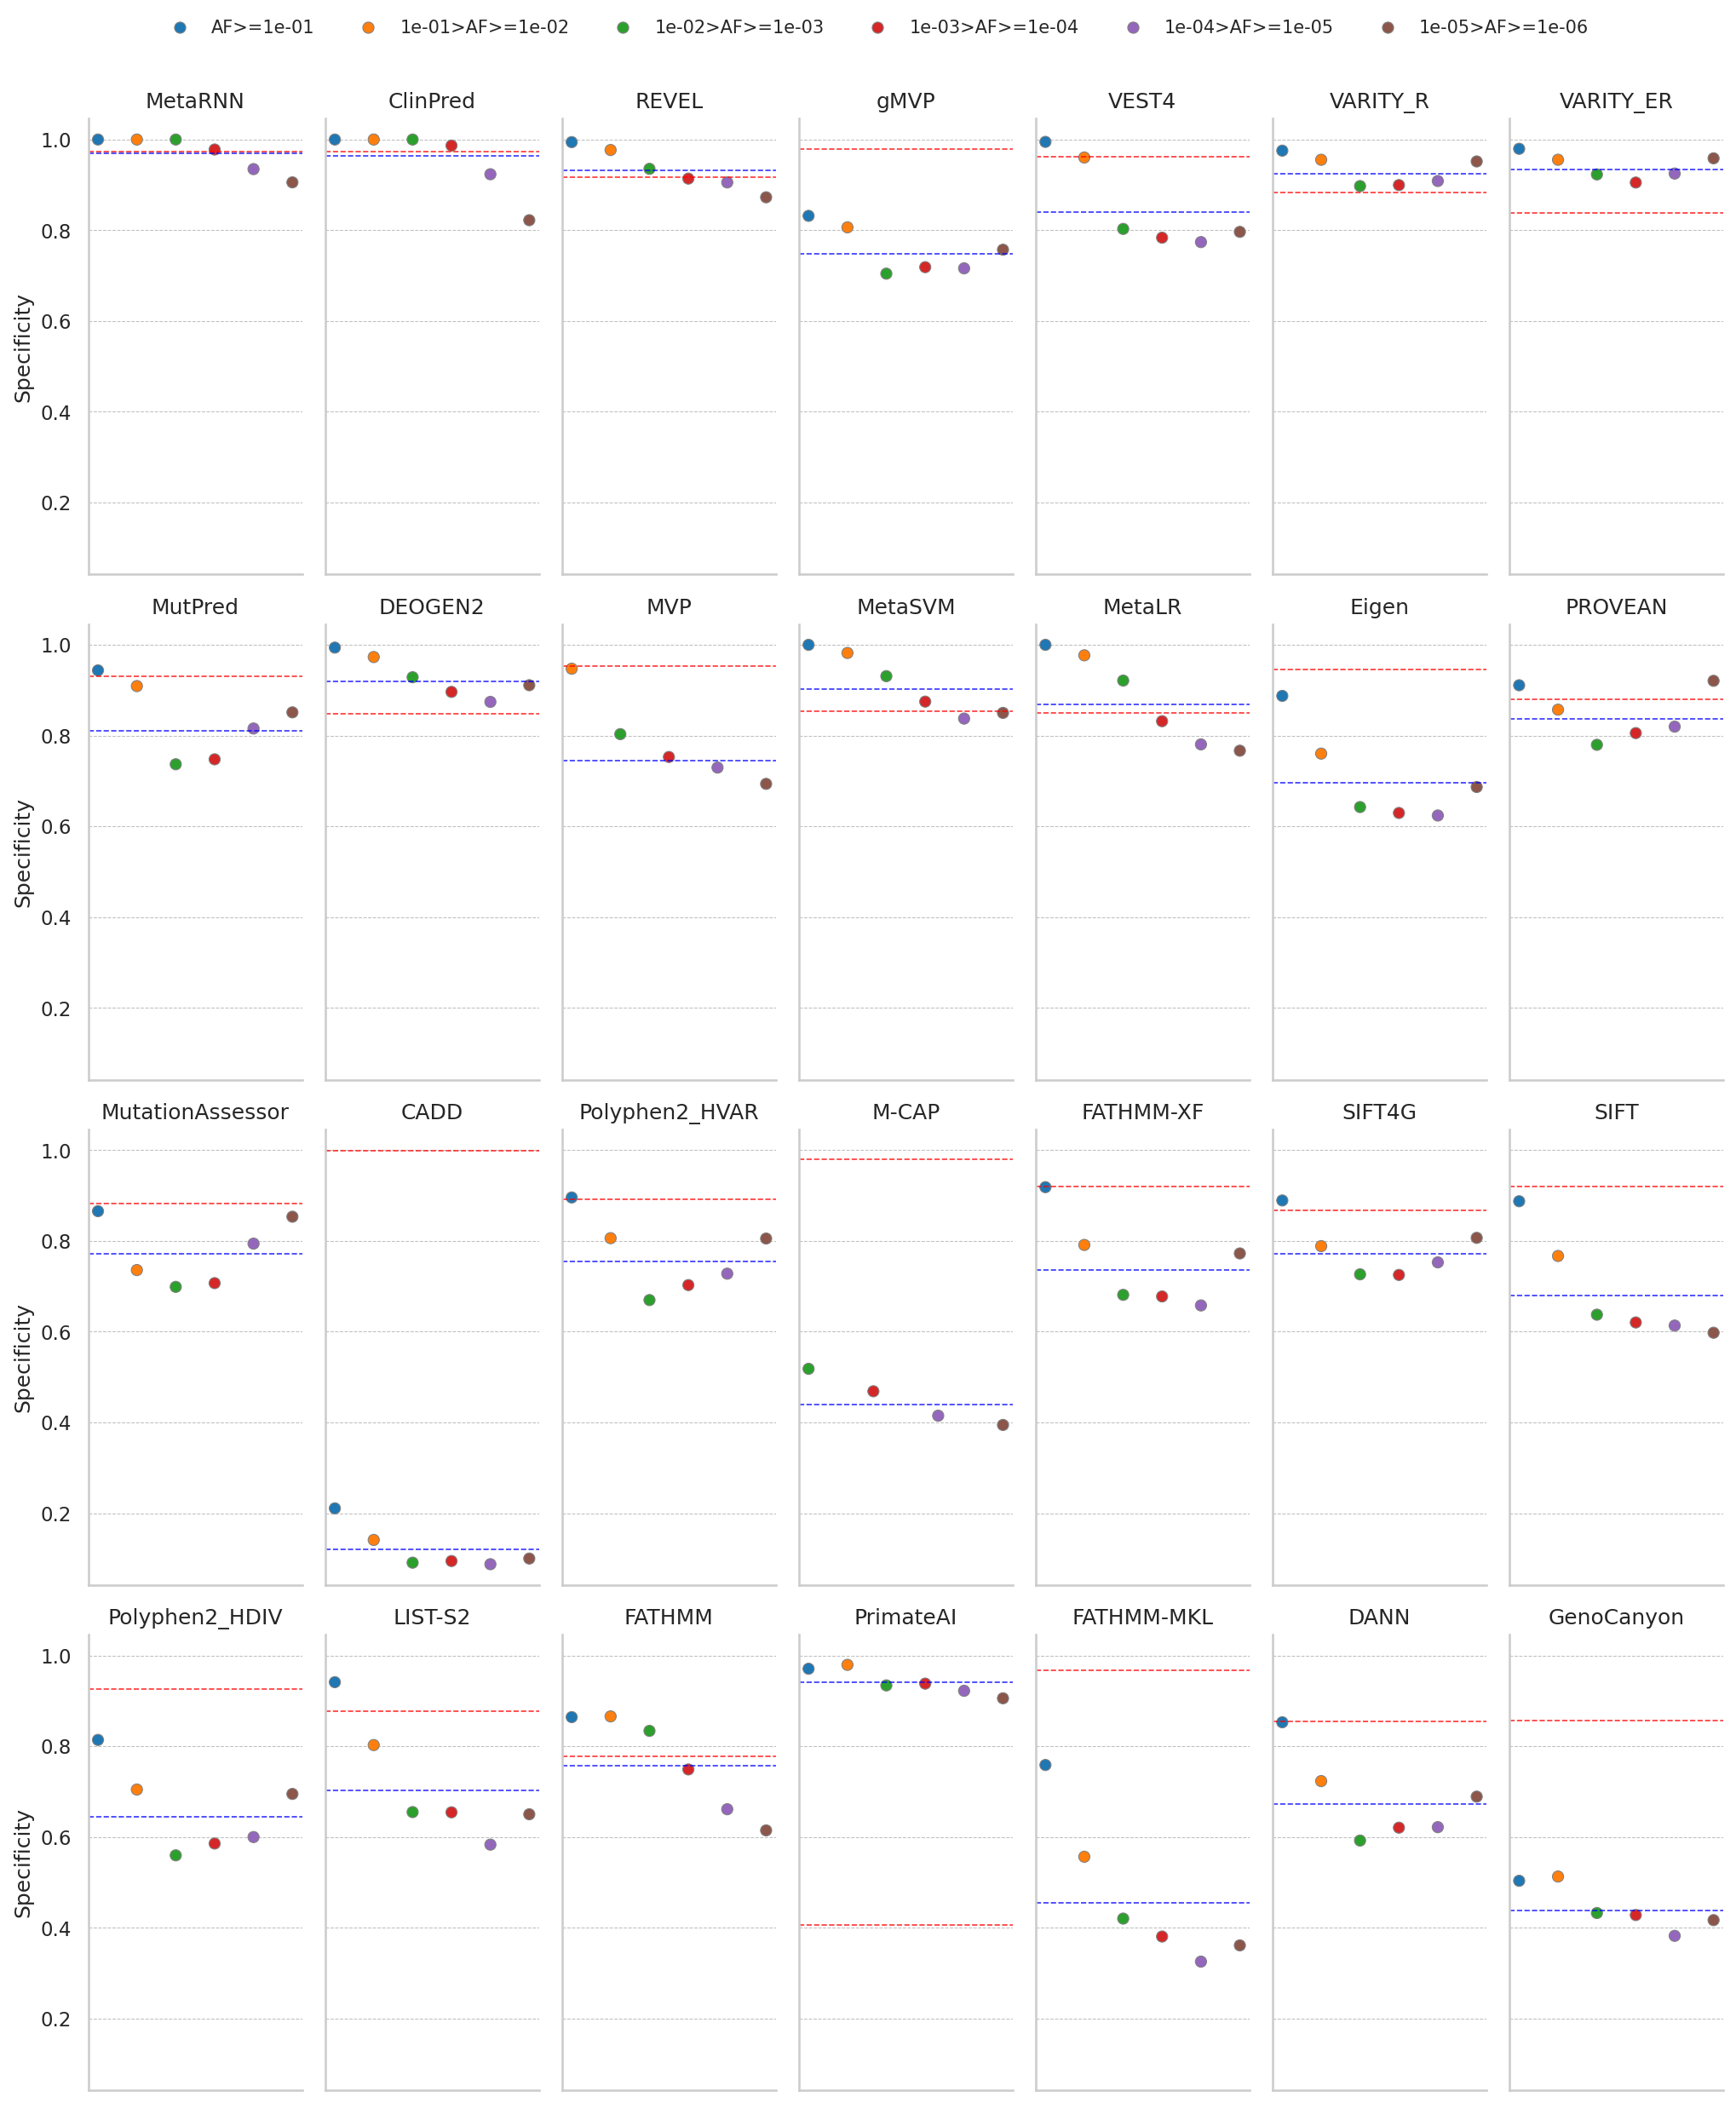

[Def] plot_scatter_grid(_df, _para)
!!! df:	N = (363, 34)
!!! Set:	catCol = criteria
!!! Set:	gridCol = Name
!!! Set:	measureCol = Recall
!!! Set:	filterRows = {'-': {'criteria': ['AF>=1e-01', '1e-01>AF>=1e-02', '1e-02>AF>=1e-03', '1e-06>AF>=0e+00', '0'], 'Name': ['LINSIGHT', 'AlphaMissense', 'MutFormer', 'MutScore', 'PHACTboost', 'VARITY_R_LOO', 'VARITY_ER_LOO', 'MPC', 'ESM1b', 'Eigen-PC', 'BayesDel_noAF', 'BayesDel_addAF', 'EVE']}}
!!! No Set:	renameRows = {} (default)
!!! Set:	customizeOrder = {'criteria': ['1e-03>AF>=1e-04', '1e-04>AF>=1e-05', '1e-05>AF>=1e-06']}
!!! Set:	addLine = True
!!! df(filterRows):	N = (112, 34)
!!! df(filterRows):	N = (84, 34)
!!! df(customize_order):	N = (84, 34)


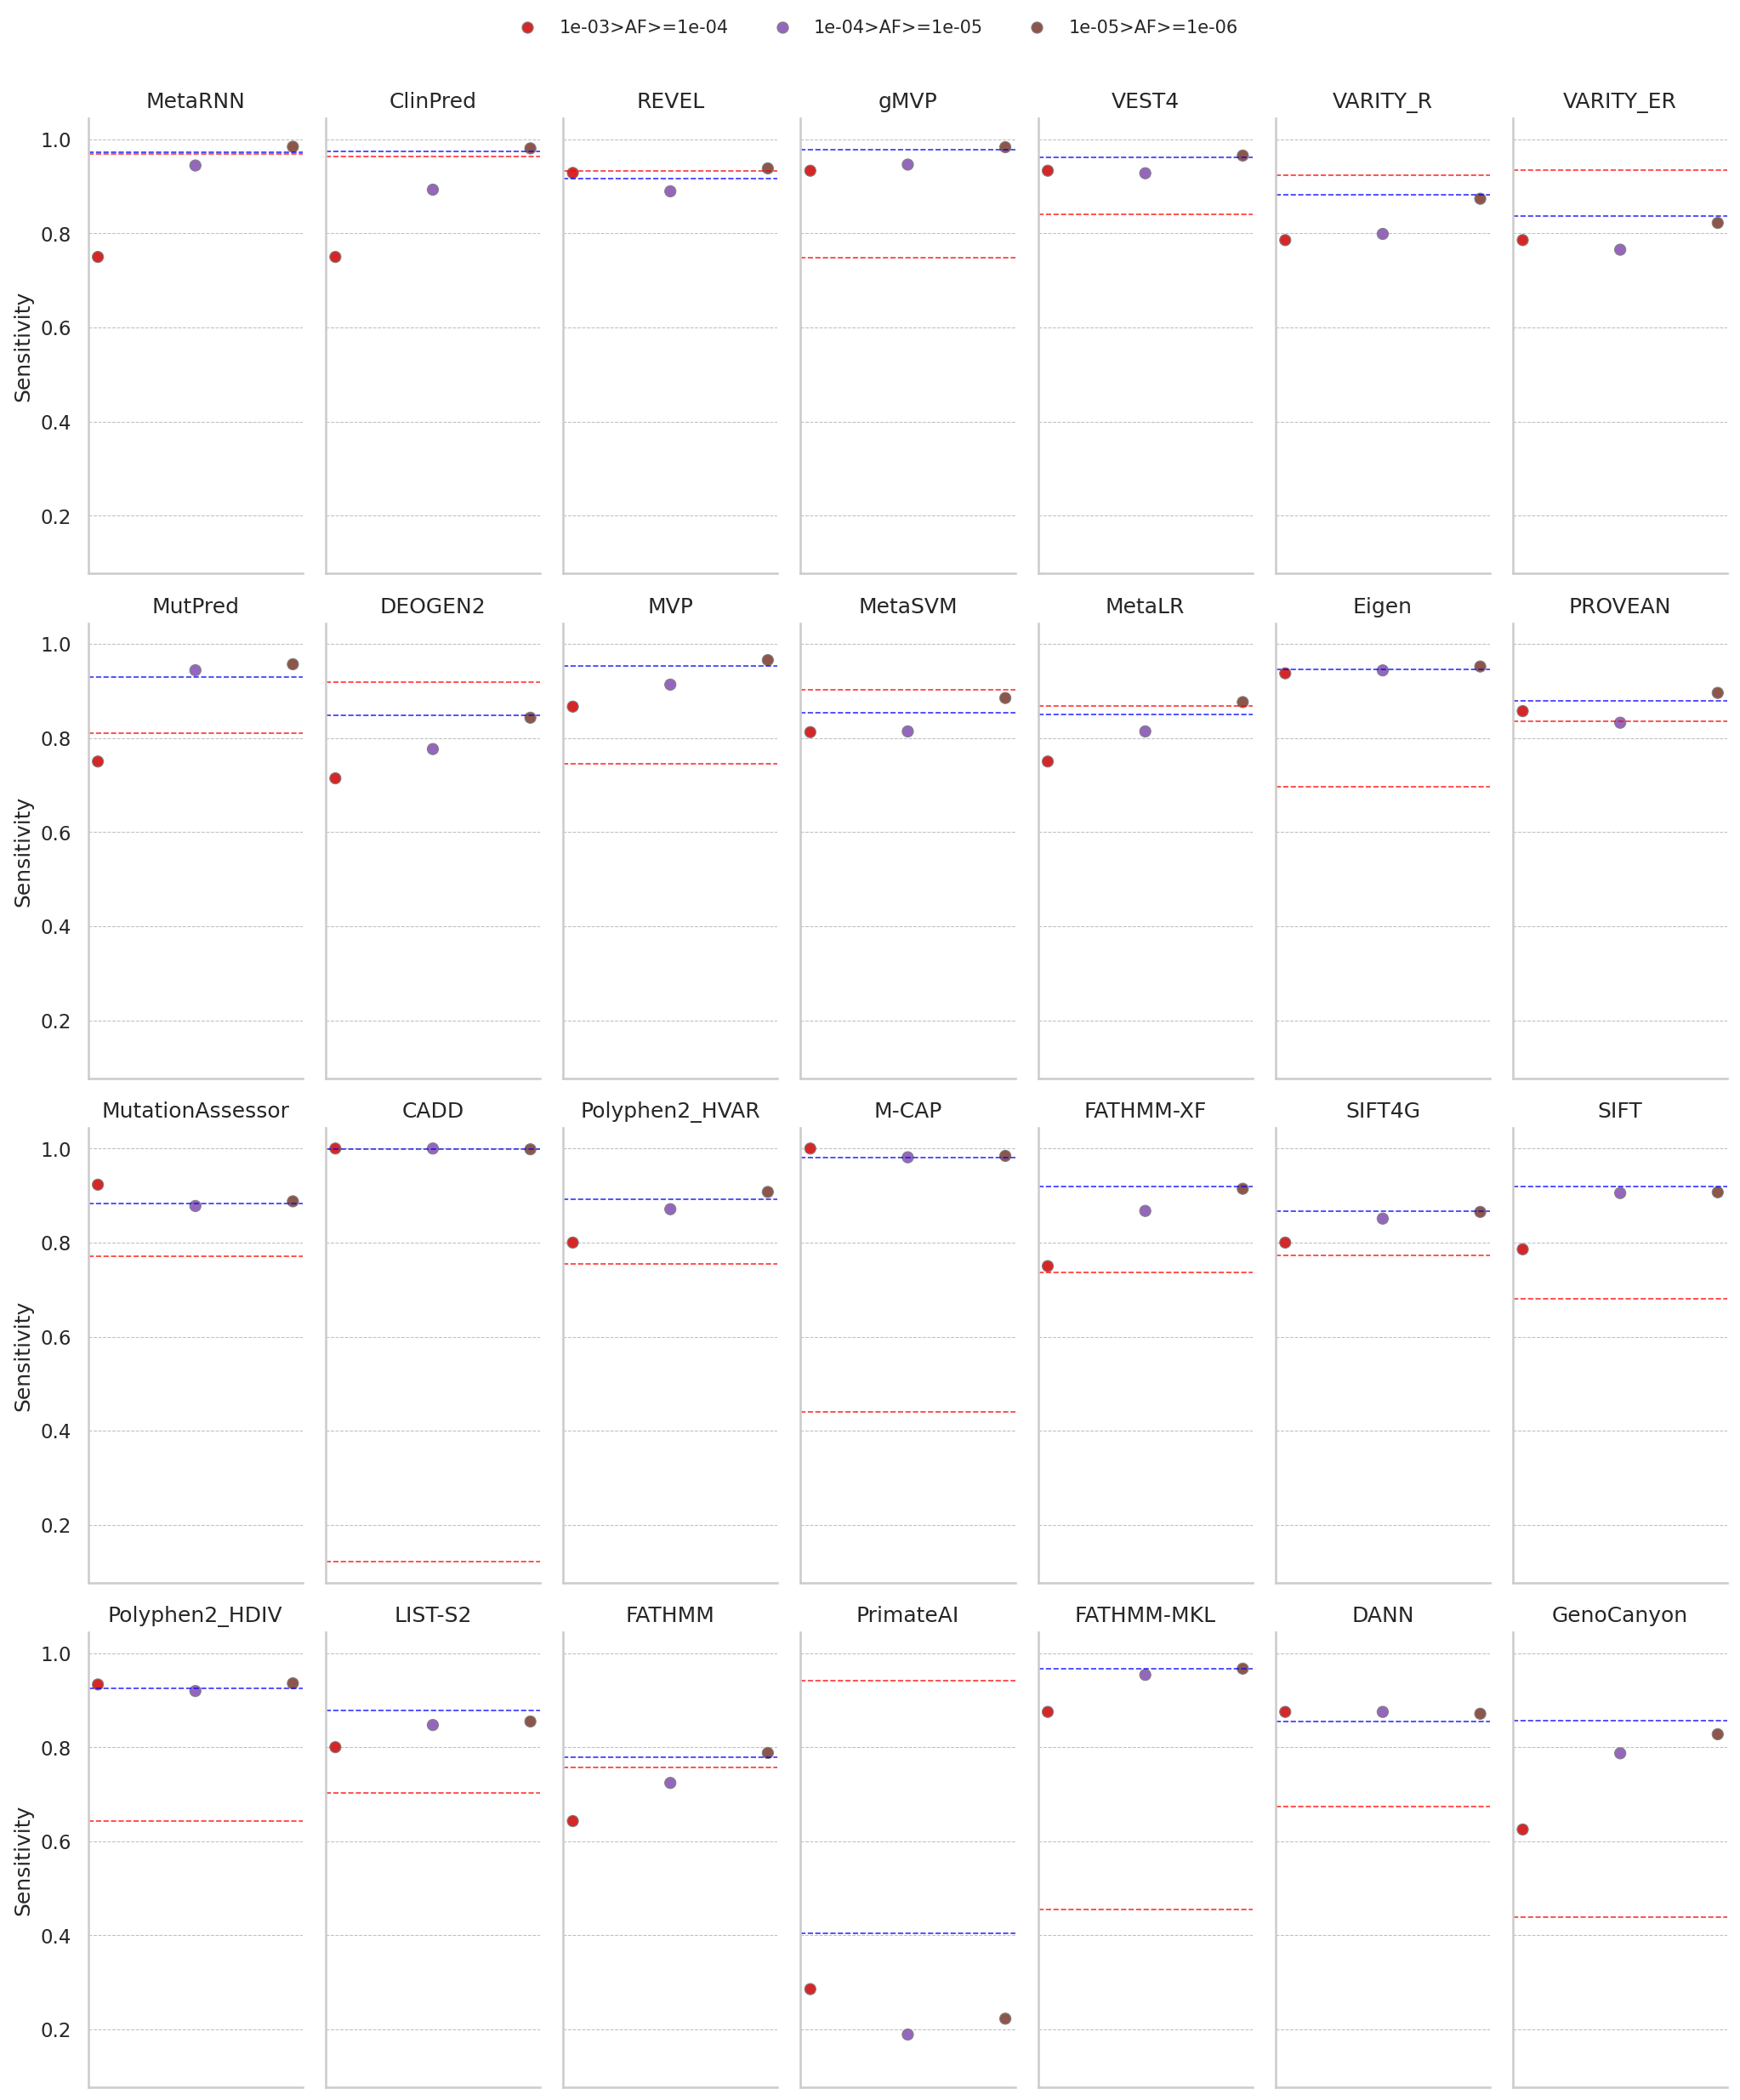

#==================================================